<a href="https://colab.research.google.com/github/MatiasVelazcoGonzalez/Hitos_Analisis_de_datos-/blob/main/Hito_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Aplicación de técnicas de aprendizaje supervisado en propiedades geometalúrgicas

Fecha de entrega: 7 septiembre

Integrantes:
- Scarlett Duran  
- Matias Velazco  
- Andreina Isabel Manrique Espin  
- Paz Montaño  
- Sebastián Galleguillos Neyth  

## Objetivo de esta etapa

Datos:  Compositos.csv y  MB.csv

La empresa oferente del proyecto minero posee una caracterización geológica y geoestadística del yacimiento en estudio a través de un modelo de bloques (MB.csv). A usted y su consultora se les solicita generar modelos de regresión para estimar el consumo especifico de energía (CCE) en este modelo de bloques y modelos de clasificación para determinar a nivel de modelo de bloques los sectores donde existirá un alto requerimiento de consumo energético considerando el umbral indicado en el Hito 1.  En específico se le solicita a su equipo lo siguiente:

1. Realizar un análisis exploratorio del modelo de bloques. Considere que este modelo
de bloques fue generado e interpretado por el equipo de geología del proyecto, por lo
que corresponde a interpretaciones que consideran el contexto regional del área en
estudio. No existen errores en esta base de datos, solo algunos datos sin
información.  

2. Definir las variables claves para construir los modelos solicitados. Considere para
esto que su objetivo final es completar el modelo de bloques con la variable CCE.  

3. Ajustar modelos de regresión para el consumo de energía específico (CCE) usando
la base de datos limpia del Hito 1. Los modelos por utilizar deben incluir por lo
menos una regresión lineal múltiple, random forest, decision tree y gradient
boosting. Comparar las métricas de desempeño en términos del error absoluto
medio (MAE), error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE)
y tiempo de cómputo para el conjunto de prueba (testing set correspondiente al 10%
de los datos disponibles).

4. Evaluar la significancia de las variables utilizadas en su modelo predictivo construido
mediante regresión lineal múltiple. Si corresponde, vuelva a ejecutar la regresión
lineal múltiple sólo considerando la/s variable/s significativa/s.

5. Para la técnica con mejor desempeño grafique un scatter plot para comparar los
valores reales vs los valores estimados de CCE considerando los datos del conjunto
de prueba en su escala original.

6. Finalmente, genere un modelo predictivo del CCE en el modelo de bloques (archivo
MB.csv) usando el mejor modelo generado en este Hito. Refiérase a la capacidad de
generalización que posee su modelo para predecir la propiedad geometalúrgica y
presente estadísticas descriptivas de las predicciones de CCE.

# 1 Análisis de Datos




## 1.1 Iniciar sesión en google **colab**

In [ ]:
# Iniciamos sesion en nuestro entorno de GDrive
from google.colab import drive
# content/drive es el PATH por defecto donde se encuentra <Mi unidad>
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.2 Importando librerias


In [ ]:
# ------------------------------
# Librerías para análisis de datos
# ------------------------------
import numpy as np                # Cálculo numérico, manejo de arreglos y operaciones matemáticas rápidas
import pandas as pd               # Manipulación y análisis de datos en estructuras tipo DataFrame
import math                       # Funciones matemáticas básicas

# ------------------------------
# Visualización
# ------------------------------
import matplotlib.pyplot as plt   # Gráficos básicos y personalizables en 2D
import seaborn as sns             # Visualización estadística más atractiva y de alto nivel
from matplotlib.patches import Patch        # Crear leyendas y formas personalizadas en gráficos de Matplotlib
from matplotlib.colors import Normalize     # Normalización de valores para mapas de color
from matplotlib.cm import ScalarMappable    # Mapeo de valores a colores
from mpl_toolkits.mplot3d import Axes3D     # Gráficos 3D en Matplotlib
import plotly.express as px                 # Gráficos interactivos simples
import plotly.graph_objects as go           # Gráficos interactivos más complejos y personalizables

# ------------------------------
# Estadística y análisis exploratorio
# ------------------------------
from scipy import stats                     # Estadística y funciones científicas (pruebas, distribuciones, etc.)
from scipy.stats import gaussian_kde        # Kernel Density Estimation (KDE) para curvas de densidad
import statsmodels.api as sm                # Modelos estadísticos y econométricos
import statsmodels.formula.api as smf       # Modelos con fórmulas tipo R

# ------------------------------
# Machine Learning / Preprocesamiento
# ------------------------------
from sklearn.impute import KNNImputer       # Imputación de valores faltantes con KNN
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos en un rango (ej. [0,1])


Se utilizaron las librerías anteriores dado que son las más comunes en el manejo de datos y fueron enseñadas en el módulo auxiliar.

## 1.3 Lectura y guardado de archivos

A continuación se muestra una tabla que contiene los `readers` y `writers` disponibles.


|   Tipo de Formato   | Descripción de la Data |  Reader  |  Writer |
| -------             | :-----                 |  :-----: | :-----: |
| text   |  CSV |  read_csv | to_csv |
| text |  Fixed-Width Text File| read_fwf |  |
| text   |  JSON | read_json | to_json |
| text   |  HTML |  read_html | to_html |
| text    |  Local clipboard|  read_clipboard | to_clipboard |
|    |  MS Excel |  read_excel | to_excel |
| binary   |  OpenDocument |  read_excel |  |
| binary |  HDF5 Format| read_hdf | to_hdf |
| binary   |  Feather Format | read_feather | to_feather |
| binary   |  Parquet Format |  read_parquet | to_parquet |
| binary    |  ORC Format|  read_orc | |
| binary   |  Msgpack |  read_msgpack | to_msgpack |
| binary |  Stata| read_stata | to_stata |
| binary   |  SAS | read_sas |  |
| binary   |  SPSS |  read_spss |  |
| binary    | Python Pickle Format|  read_pickle | to_pickle |
| SQL   |  SQL |  read_sql | to_sql |
| SQL    | Google BigQuery|  read_gbq | to_gbq |

El detalle de cada una de las funciones se encuentra en el siguiente <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">link</a>.

### 1.3.1 Busqueda de la ruta del archivo asociada a los compósitos

In [ ]:
# Buscar el archivo para obtener la ruta exacta
import glob

# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*Compositos*.xlsx", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos.xlsx


### 1.3.2 Lectura del archivo con ruta encontrada

In [ ]:
# Leer el archivo Excel
df = pd.read_excel("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos.xlsx")

# Mostrar las primeras filas
df.head()

REF    EAST   NORTH   ELEV.  LITO   RX  SGI  AXB     BWI  CCE
0    1  1015.6  -95.15   958.2  10.0  5.0  NaN  NaN  22.100  NaN
1    2  1024.8  -95.35  1032.7   0.0  5.0  NaN  NaN  20.736  NaN
2    3   979.6 -274.55   906.4  10.0  2.0  NaN  NaN  21.161  NaN
3    4   995.2 -112.05   931.0  10.0  2.0  NaN  NaN  20.015  NaN
4    5   984.7 -125.35   924.3  10.0  2.0  NaN  NaN  20.028  NaN

## 1.4 Chequeos y limpieza básica de df

#### 1.4.1 Tipo de variables


In [ ]:
# 1) Estructura general: columnas, tipos, n° de no-nulos, uso de memoria
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REF     2755 non-null   int64  
 1   EAST    2755 non-null   float64
 2   NORTH   2755 non-null   float64
 3   ELEV.   2755 non-null   float64
 4   LITO    2416 non-null   float64
 5   RX      2409 non-null   float64
 6   SGI     501 non-null    float64
 7   AXB     177 non-null    float64
 8   BWI     228 non-null    float64
 9   CCE     320 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 215.4 KB


Se busca estudiar y modelar una
variable clave, el consumo específico de energía (CCE). Se cuenta con información de
pruebas metalúrgicas realizadas en testigos de sondajes de exploración (Compositos.csv) y
se requiere hacer un análisis exploratorio de datos (EDA) para mejorar el entendimiento del
proyecto.


El modelo presenta las siguientes variables:
- REF: identificador único de cada muestra. Su distribución no aporta información geológica, pero permite mantener la trazabilidad de los datos.

- EAST, NORTH y ELEV.: corresponden a las coordenadas espaciales y de elevación de las muestras. Estas variables permiten ubicar cada registro en el dominio tridimensional del yacimiento, esenciales para cualquier análisis geoestadístico. Presentan valores consistentes y un rango amplio (e.g., NORTH entre –1057.95 y 1500.95), lo que evidencia la extensión espacial de la campaña de muestreo.

- LITO: variable categórica que representa la litología. Su valor numérico codificado permite distinguir entre diferentes tipos de roca. Es clave para identificar dominios geológicos que condicionan el comportamiento del mineral.

- RX: variable categórica que clasifica el tipo de roca (e.g., estéril, sulfuros). Su análisis conjunto con LITO ayuda a delimitar unidades geometalúrgicas coherentes.

- SGI (SAG Grindability Index): índice que mide la dureza del mineral en molienda SAG. A mayor valor, mayor resistencia a la conminución, lo que se traduce en un mayor consumo energético.

- AXB: parámetro obtenido del test de Drop Weight, que describe la resistencia del mineral al impacto. Valores altos de AXB implican un mineral más frágil, y por tanto, menor consumo de energía en la conminución.

- BWI (Bond Work Index): índice de trabajo en molino de bolas, expresado en kWh/t, que mide la energía necesaria para reducir el tamaño de partícula bajo molienda convencional.

- CCE (Consumo Específico de Energía): variable derivada que estima directamente la energía requerida para la molienda (kWh/t).


Variables como CCE, BWi y A×b son fundamentales para la caracterización geometalúrgica, ya que permiten estimar el consumo energético según litologías y dominios. Diversos estudios demuestran que la modelación conjunta de estas variables mejora la representación de la variabilidad e incertidumbre en el yacimiento (Khorram, 2025).


Fuente: Khorram, F. (2024). Assessing joint simulation and estimation approaches in geometallurgical modeling [Preprint]. Research Square. https://doi.org/10.21203/rs.3.rs-5555141/v1

#### 1.4.2 Resumen Estadístico

In [ ]:
# 2) Resumen estadístico de variables numéricas
#    Incluye percentiles 5%, 50% (mediana) y 95% para ver colas y centro
df.describe(percentiles=[0.05, 0.5, 0.95])


REF         EAST        NORTH        ELEV.         LITO  \
count  2755.000000  2755.000000  2755.000000  2755.000000  2416.000000   
mean   1369.419964   682.981924   548.009201   990.713503    25.032285   
std     786.559371   243.120603   651.372360   117.450303    19.595617   
min       1.000000  -135.200000 -1057.950000   455.000000     0.000000   
5%      136.700000   325.270000  -513.500000   770.110000    10.000000   
50%    1376.000000   680.000000   700.050000   995.700000    20.000000   
95%    2585.300000  1036.830000  1455.780000  1169.430000    60.000000   
max    2723.000000  1267.700000  1500.950000  1231.200000   100.000000   

                RX         SGI          AXB         BWI          CCE  
count  2409.000000  501.000000   177.000000  228.000000   320.000000  
mean      6.101702  128.143713    56.765249   20.646776    24.948878  
std       9.326312   29.981916   284.691155    3.036765   116.389831  
min       2.000000   45.000000    23.000000   14.000000    12.124000  
5%        2.000000   82.000000    26.694000   15.800000    14.458750  
50%       5.000000  125.000000    35.231000   20.476000    18.345000  
95%      45.000000  181.000000    45.650000   25.816900    22.721150  
max      45.000000  226.000000  3822.000000   29.760000  2100.053000

La base de datos analizada contiene 2755 registros con variables espaciales, categóricas y geometalúrgicas,
La estadística descriptiva evidencia patrones relevantes:

- Las variables espaciales (EAST, NORTH, ELEV.) presentan rangos amplios, lo que refleja la gran extensión muestreada del yacimiento.

- Los índices energéticos (SGI, AXB, BWI, CCE) muestran alta dispersión y valores extremos, evidenciando la heterogeneidad del mineral y la existencia de diferentes poblaciones de datos.

- En particular, CCE presenta una desviación estándar de 116.38 con un promedio de 24.94, lo que indica la existencia de registros muy altos en comparación al valor central.





Se observa una presencia de errores, nos encontramos con valores de Litología de 50 y 51 que no debiesen existir, por otro lado se encuentran valores asociados a un número máximo de 100. Se debe corregir data. Esto igual para RX, presencia de anomalías en la codificación - fuera de rango. Además de dos valores aberrante correspondiente al AXB correspondiente a 3822 y a un valor de CCE de 2100, posibles errores de digitalización dado que difieren de la muestra por dos ordenes de magnitud, se realiza la siguiente modificación.

#### 1.4.3 Datos Aberrantes

In [ ]:
# ==============================
# 1) Detectar valor máximo en AXB
# ==============================
col = "AXB"

# Aseguramos tipo numérico
df[col] = pd.to_numeric(df[col], errors="coerce")
max_val = df[col].max(skipna=True)
print(f"Valor máximo observado en {col}: {max_val}")

# ==============================
# 2) Filtrar filas que tienen ese máximo
# ==============================
outlier_rows = df[df[col] == max_val].copy()
print("\n=== Registros con valor máximo en AXB ===")
print(outlier_rows.to_string(index=False))

# ==============================
# 3) Revisar registros con mismas condiciones
#    (coordenadas + litología + RX + SGI + BWI + CCE)
# ==============================
# Variables clave a comparar
keys = ["EAST", "NORTH", "ELEV.",
        "LITO",  "RX",
        "SGI", "BWI", "CCE"]

# Tomamos los valores de la(s) fila(s) outlier
condiciones = {}
for k in keys:
    # solo si no es NaN en el outlier
    val = outlier_rows.iloc[0][k]
    if pd.notna(val):
        condiciones[k] = val

# Filtrar filas que coincidan en todas esas columnas
mask = pd.Series(True, index=df.index)
for k, v in condiciones.items():
    mask &= df[k] == v

coincidentes = df[mask]

print("\n=== Registros que comparten misma coordenada/lito/RX/SGI/BWI/CCE ===")
print(coincidentes.to_string(index=False))

# ==============================
# 4) Observación
# ==============================
if len(coincidentes) > 1:
    print(f"\n>>> Se detectan {len(coincidentes)} registros con condiciones idénticas.")
    print(f"    Esto sugiere que el valor máximo AXB={max_val} podría estar mal digitado.")
else:
    print("\n>>> El valor máximo no comparte todas las condiciones con otros registros.")


Valor máximo observado en AXB: 3822.0

=== Registros con valor máximo en AXB ===
 REF   EAST  NORTH  ELEV.  LITO  RX  SGI    AXB    BWI  CCE
2153 1105.7  60.15 1120.1   0.0 5.0 89.0 3822.0 22.485  NaN

=== Registros que comparten misma coordenada/lito/RX/SGI/BWI/CCE ===
 REF   EAST  NORTH  ELEV.  LITO  RX  SGI     AXB    BWI  CCE
2152 1105.7  60.15 1120.1   0.0 5.0 89.0   38.22 22.485  NaN
2153 1105.7  60.15 1120.1   0.0 5.0 89.0 3822.00 22.485  NaN

>>> Se detectan 2 registros con condiciones idénticas.
    Esto sugiere que el valor máximo AXB=3822.0 podría estar mal digitado.


In [ ]:
# Aseguramos tipo numérico en AXB
df["AXB"] = pd.to_numeric(df["AXB"], errors="coerce")

# Valor incorrecto detectado
valor_erroneo = 3822
valor_corregido = 38.22

# Contar cuántas veces aparece
n_erroneos = (df["AXB"] == valor_erroneo).sum()
print(f"Se encontraron {n_erroneos} registros con AXB = {valor_erroneo}")

# Reemplazar por el valor corregido
df.loc[df["AXB"] == valor_erroneo, "AXB"] = valor_corregido

# Verificación
print("\nVerificación después de la corrección:")
print(df[df["AXB"] == valor_corregido])

Se encontraron 1 registros con AXB = 3822

Verificación después de la corrección:
       REF    EAST  NORTH   ELEV.  LITO   RX   SGI    AXB     BWI  CCE
2162  2152  1105.7  60.15  1120.1   0.0  5.0  89.0  38.22  22.485  NaN
2163  2153  1105.7  60.15  1120.1   0.0  5.0  89.0  38.22  22.485  NaN


In [ ]:
# 1) Detectar valor máximo en CCE
# ==============================
col = "CCE"

# Asegurar tipo numérico
df[col] = pd.to_numeric(df[col], errors="coerce")

# Calcular máximo
max_val = df[col].max(skipna=True)
print(f"Valor máximo observado en {col}: {max_val}")

# ==============================
# 2) Mostrar filas con el máximo
# ==============================
outlier_rows = df[df[col] == max_val].copy()
print("\n=== Registros con valor máximo en CCE ===")
print(outlier_rows.to_string(index=False))



Valor máximo observado en CCE: 2100.053

=== Registros con valor máximo en CCE ===
 REF  EAST  NORTH  ELEV.  LITO  RX   SGI  AXB  BWI      CCE
2310 866.1 -84.45  912.5  10.0 2.0 152.0  NaN  NaN 2100.053


In [ ]:
# Valor incorrecto detectado
valor_erroneo = max_val
valor_corregido = max_val/100

# Contar cuántas veces aparece
n_erroneos = (df["CCE"] == valor_erroneo).sum()
print(f"Se encontraron {n_erroneos} registros con CEE = {valor_erroneo}")

# Reemplazar por el valor corregido
df.loc[df["CCE"] == valor_erroneo, "CCE"] = valor_corregido

# Verificación
print("\nVerificación después de la corrección:")
print(df[df["CCE"] == valor_corregido])

Se encontraron 1 registros con CEE = 2100.053

Verificación después de la corrección:
       REF   EAST  NORTH  ELEV.  LITO   RX    SGI  AXB  BWI       CCE
2341  2310  866.1 -84.45  912.5  10.0  2.0  152.0  NaN  NaN  21.00053


#### 1.4.4 Valores faltantes por atributo/variable (columna)

In [ ]:
# Valores faltantes por columna (conteo y porcentaje)
print("\n--- Valores faltantes por columna ---")
for col in df.columns:
    n_missing = df[col].isnull().sum()           # cantidad de NaN
    pct_missing = df[col].isnull().mean() * 100  # porcentaje de NaN
    print(f"La columna \'{col:<5}' tiene {n_missing} datos faltantes ({pct_missing:.2f}%)")



--- Valores faltantes por columna ---
La columna 'REF  ' tiene 0 datos faltantes (0.00%)
La columna 'EAST ' tiene 0 datos faltantes (0.00%)
La columna 'NORTH' tiene 0 datos faltantes (0.00%)
La columna 'ELEV.' tiene 0 datos faltantes (0.00%)
La columna 'LITO ' tiene 339 datos faltantes (12.30%)
La columna 'RX   ' tiene 346 datos faltantes (12.56%)
La columna 'SGI  ' tiene 2254 datos faltantes (81.81%)
La columna 'AXB  ' tiene 2578 datos faltantes (93.58%)
La columna 'BWI  ' tiene 2527 datos faltantes (91.72%)
La columna 'CCE  ' tiene 2435 datos faltantes (88.38%)


Se aprecia que las variables SGI, AXB, BWI, CCE presentan un gran porcentaje de valores nulos, indicando una desproporcionalidad entre las variables restantes. Posiblemente deban ser dedicidas del modelo entregado por enunciado, pero esto es únicamente para la variable

En esta sección se completaron los valores faltantes de **CCE** (Consumo Específico de Energía)

Se utiliza la relación entregada en el enunciado, que vincula el **SGI** (equivalente a SPI) con el consumo específico de energía en la etapa de molienda SAG. La ecuación aplicada es:

$$
\mathrm{CCE} \; [\mathrm{kWh/t}] \;=\; 5.49 \cdot \left( \frac{\mathrm{SGI}}{\sqrt{195}} \right)^{0.56}
$$

El procedimiento consistió en imputar únicamente aquellos registros en los que **CCE** no tenía información, pero **SGI** presentaba un valor válido. De esta forma, se preservaron los valores medidos originalmente y solo se calcularon los faltantes cuando fue posible estimarlos a partir de **SGI**.




In [ ]:
# Aseguramos tipos numéricos para evitar problemas
df["SGI"] = pd.to_numeric(df["SGI"], errors="coerce")
df["CCE"] = pd.to_numeric(df["CCE"], errors="coerce")

# Constantes de la ecuación
K = 5.49
DEN = np.sqrt(195)
EXP = 0.56

# Contar faltantes antes
faltantes_antes = df["CCE"].isna().sum()

# Rellenar solo si:
#  - CCE está vacío (NaN)
#  - SGI tiene dato válido
mask_fill = df["CCE"].isna() & df["SGI"].notna()
df.loc[mask_fill, "CCE"] = K * np.power(df.loc[mask_fill, "SGI"] / DEN, EXP)

# Contar faltantes después
faltantes_despues = df["CCE"].isna().sum()

print(f"CCE faltantes antes:  {faltantes_antes}")
print(f"CCE faltantes después de calcular con SGI: {faltantes_despues}")

CCE faltantes antes:  2435
CCE faltantes después de calcular con SGI: 2254


In [ ]:
# 3) Valores faltantes por columna (conteo y porcentaje)
print("\n--- Valores faltantes por columna ---")
for col in df.columns:
    n_missing = df[col].isnull().sum()           # cantidad de NaN
    pct_missing = df[col].isnull().mean() * 100  # porcentaje de NaN
    print(f"La columna \'{col:<5}' tiene {n_missing} datos faltantes ({pct_missing:.2f}%)")



--- Valores faltantes por columna ---
La columna 'REF  ' tiene 0 datos faltantes (0.00%)
La columna 'EAST ' tiene 0 datos faltantes (0.00%)
La columna 'NORTH' tiene 0 datos faltantes (0.00%)
La columna 'ELEV.' tiene 0 datos faltantes (0.00%)
La columna 'LITO ' tiene 339 datos faltantes (12.30%)
La columna 'RX   ' tiene 346 datos faltantes (12.56%)
La columna 'SGI  ' tiene 2254 datos faltantes (81.81%)
La columna 'AXB  ' tiene 2578 datos faltantes (93.58%)
La columna 'BWI  ' tiene 2527 datos faltantes (91.72%)
La columna 'CCE  ' tiene 2254 datos faltantes (81.81%)


En el caso de las **otras variables con alta densidad de datos faltantes** (SGI/SPI, AxB, BWI y CCE), **no es posible realizar una estimación determinística** a partir de la información disponible, con la **única excepción** de CCE cuando existe **SGI** (≡ SPI). Por ello, solo imputamos **CCE** en registros sin dato usando su relación con **SPI**, y mantenemos sin cambios los valores medidos donde existen.



* **Relación CCE–SPI (única fórmula aplicable con los datos actuales)**
  $\text{SPI} \equiv \text{SGI}$

  $$
  \mathrm{CCE}\;[\mathrm{kWh/t}] \;=\; 5.49 \cdot \left(\frac{\mathrm{SPI}}{\sqrt{195}}\right)^{0.56}
  $$

  Esta expresión permite **estimar CCE** solo cuando **CCE está vacío y SGI/SPI existe**.

* **AxB (Drop Weight)**
  AxB proviene del **ensayo de impacto**. Su marco típico (JK) relaciona el % de finos $t_{10}$ con la energía específica de impacto $E_{cs}$:

  $$
  t_{10} \;=\; A\!\left(1-e^{-\,b\,E_{cs}}\right), \qquad \text{y}\qquad \mathrm{AxB}=A\cdot b
  $$

  Sin pares $(E_{cs},\,t_{10})$ u otros parámetros del ensayo, **no puede derivarse AxB** desde el resto de variables del dataset.

* **BWI (Bond Work Index)**
  Se obtiene del **ensayo Bond** y se usa en la ecuación de Bond para la energía de molienda en molino de bolas:

  $$
  W \;=\; 10\,W_i\!\left(\frac{1}{\sqrt{P_{80}}}-\frac{1}{\sqrt{F_{80}}}\right),
  $$

  de donde

  $$
  W_i \;=\; \frac{W}{\,10\left(\frac{1}{\sqrt{P_{80}}}-\frac{1}{\sqrt{F_{80}}}\right)}.
  $$

  Como en la base **no contamos con** $W$, $F_{80}$ ni $P_{80}$, **no es posible calcular BWI**.




### 1.4.5 Detección y eliminación de duplicados

In [ ]:
# 4) Detección de filas duplicadas (ignorando la columna REF)
cols_sin_ref = [c for c in df.columns if c != "REF"]

dup_rows = df[df.duplicated(subset=cols_sin_ref)]   # revisa duplicados sin REF
n_dups = dup_rows.shape[0]  # número de filas duplicadas encontradas. .shape[0] obtiene solo la cantidad de filas del DataFrame dup_rows.

print(f"\n--- Duplicados detectados (ignorando REF): {n_dups} filas ---")

# Opcional: mostrar algunas filas duplicadas
if n_dups > 0:
     print(dup_rows.to_string(index=False))





--- Duplicados detectados (ignorando REF): 17 filas ---
 REF   EAST   NORTH  ELEV.  LITO  RX  SGI   AXB    BWI       CCE
  79    1.1  -54.55  691.0  40.0 2.0  NaN   NaN    NaN       NaN
 174  655.7 1038.85 1102.7  10.0 2.0  NaN   NaN    NaN       NaN
 393  685.3  643.85  965.6  10.0 2.0  NaN   NaN    NaN       NaN
 814  927.7  649.95 1111.6  30.0 5.0  NaN   NaN    NaN       NaN
1086  749.7  698.75  930.8  10.0 2.0  NaN   NaN    NaN       NaN
1087  750.0  698.75  930.5  10.0 2.0  NaN   NaN    NaN       NaN
1088  750.6  698.65  930.0  10.0 2.0  NaN   NaN    NaN       NaN
1089  751.1  698.65  929.6  10.0 2.0  NaN   NaN    NaN       NaN
1090  751.5  698.65  929.2  10.0 2.0  NaN   NaN    NaN       NaN
1091  751.8  698.65  928.9  10.0 2.0  NaN   NaN    NaN       NaN
1491  494.6 1078.35 1153.4   NaN NaN  NaN   NaN    NaN       NaN
1510  433.7 1076.15 1135.9   NaN NaN  NaN   NaN    NaN       NaN
1707  188.4  947.75  974.7  40.0 5.0  NaN   NaN    NaN       NaN
1732  489.3 1490.85  966.1  40.0 

Se encontró un total de 17 filas duplicadas compartiendo los mismos valores, los cuales se proceden a identificar

In [ ]:
# (opcional) Ver los índices de las filas duplicadas
dup_idx = dup_rows.index.tolist()
print("Índices de duplicados (primeros 20):", dup_idx[:20])


Índices de duplicados (primeros 20): [80, 175, 394, 815, 1087, 1088, 1089, 1090, 1091, 1092, 1492, 1511, 1708, 1733, 1827, 2163, 2261]


In [ ]:
# 5) Eliminación de duplicados (opcional)
df.drop(index=dup_idx, inplace=True)

#6) Verificación posterior (solo si eliminaste duplicados)
dup_rows_post = df[df.duplicated()]
print(f"Duplicados después de eliminar: {dup_rows_post.shape[0]}")

Duplicados después de eliminar: 0


### 1.4.6 Dominio del yacimiento

In [ ]:


# Columnas de coordenadas tal como están en tu DataFrame
coords = ["EAST", "NORTH", "ELEV."]

# Crear un diccionario para guardar resultados
dominios = {}

for col in coords:
    if col in df.columns:
        minimo = df[col].min()
        maximo = df[col].max()
        rango = maximo - minimo
        mitad = rango / 2

        dominios[col] = {
            "Mínimo": minimo,
            "Máximo": maximo,
            "Dominio": rango,
            "Mitad dominio": mitad
        }

# Mostrar resultados en forma de DataFrame
dominios_df = pd.DataFrame(dominios).T
print(dominios_df)

        Mínimo   Máximo  Dominio  Mitad dominio
EAST   -135.20  1267.70   1402.9         701.45
NORTH -1057.95  1500.95   2558.9        1279.45
ELEV.   455.00  1231.20    776.2         388.10


# 2 EDA

En el análisis inicial de la base de datos se observa que las variables Litología (LITO) y Tipo de roca (RX) presentan valores aislados que no corresponden a las categorías definidas en el catálogo evidenciando la necesidad de estandarizar y limpiar ambas variables.

Esto confirma que, antes de realizar análisis más profundos, es necesario aplicar el preprocesamiento para corregir códigos erróneos y unificar las categorías válidas.

## 2.1 Análisis de Lito y RX

### 2.1.1 Análisis enfocado en valores fuera de rango:

Para analizar estos casos, generaremos un histograma y una nube de dispersión resaltando en celeste los valores fuera de rango y en morado los que se encuentran dentro de las categorías válidas.

Esto permitirá cuantificar y visualizar de forma clara la magnitud de este problema antes de aplicar el preprocesamiento y limpieza de datos.

### 2.1.2 Conteo y análisis inicial de códigos de LITO y RX
En esta etapa se realizará un conteo de la cantidad de registros presentes en cada uno de los códigos actuales de LITO (Litología) y RX (Tipo de roca).
El objetivo es identificar cuántos datos se encuentran en cada valor y detectar la presencia de códigos fuera del catálogo oficial.



In [ ]:
# --- Normalizar nombre y tipo para LITO
df.columns = df.columns.astype(str)
if "LITO" not in df.columns:
    cand = [c for c in df.columns if c.strip().upper() == "LITO"]
    if cand:
        df.rename(columns={cand[0]: "LITO"}, inplace=True)
    else:
        raise KeyError("No se encontró la columna LITO.")

# Copia original para auditoría y conversión segura a numérico
df["LITO_ORIG"] = df["LITO"]
df["LITO"] = pd.to_numeric(df["LITO"], errors="coerce")  # preserva NaN

# --- 2.2 Conteo inicial
conteo_inicial = (
    df["LITO"].value_counts(dropna=False)
      .rename_axis("LITO_CODE")
      .reset_index(name="N")
      .sort_values("LITO_CODE")
)
print(">>> Conteo inicial de LITO (incluye NaN):")
print(conteo_inicial.to_string(index=False))


>>> Conteo inicial de LITO (incluye NaN):
 LITO_CODE   N
       0.0 118
      10.0 937
      20.0 288
      30.0 506
      40.0 244
      50.0   2
      51.0   2
      52.0   8
      60.0 252
     100.0  44
       NaN 337


In [ ]:
# --- Normalizar nombre y tipo para RX
df.columns = df.columns.astype(str)
if "RX" not in df.columns:
    cand = [c for c in df.columns if c.strip().upper() == "RX"]
    if cand:
        df.rename(columns={cand[0]: "RX"}, inplace=True)
    else:
        raise KeyError("No se encontró la columna RX.")

# Copia original para auditoría y conversión segura a numérico
df["RX_ORIG"] = df["RX"]
df["RX"] = pd.to_numeric(df["RX"], errors="coerce")  # preserva NaN

# --- 2) Conteo inicial ---
conteo_inicial_rx = (
    df["RX"].value_counts(dropna=False)
      .rename_axis("RX_CODE")
      .reset_index(name="N")
      .sort_values("RX_CODE")
)
print(">>> Conteo inicial de RX (incluye NaN):")
print(conteo_inicial_rx.to_string(index=False))

>>> Conteo inicial de RX (incluye NaN):
 RX_CODE    N
     2.0 1020
     3.0   25
     5.0 1097
     9.0    1
    10.0   61
    11.0   19
    12.0    4
    13.0   26
    14.0    4
    20.0   15
    45.0  122
     NaN  344



### 2.1.3 Generación del gráfico de dispersión LITO vs RX y definición de imputaciones
Se generará un gráfico de dispersión entre LITO (Litología) y RX (Tipo de roca), diferenciando en azul los registros que están dentro de los rangos válidos y en rosa aquellos que se encuentran fuera de rango..


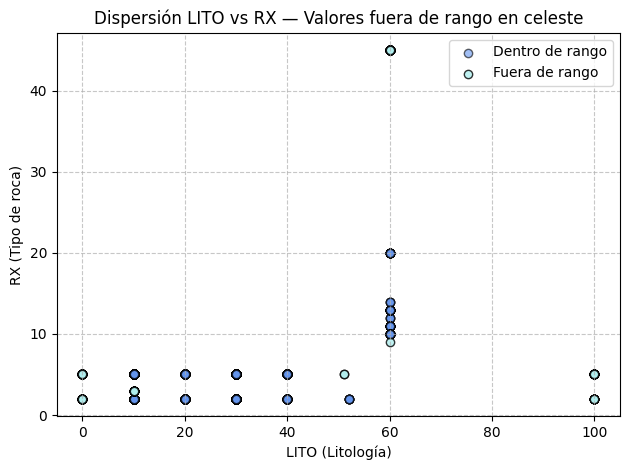

In [ ]:
# --- Nube de dispersión LITO vs RX ---


# --- Definir catálogos válidos ---
catalogo_lito = {10, 20, 30, 40, 52, 60}
catalogo_rx = set([2, 5] + list(range(10, 21)))

# --- Crear máscaras ---
mask_fuera_lito = ~df["LITO"].isin(catalogo_lito) & df["LITO"].notna()
mask_fuera_rx = ~df["RX"].isin(catalogo_rx) & df["RX"].notna()
mask_fuera_ambos = mask_fuera_lito | mask_fuera_rx

plt.figure()
plt.scatter(
    df.loc[~mask_fuera_ambos, "LITO"], df.loc[~mask_fuera_ambos, "RX"],
    alpha=0.6, color="cornflowerblue", edgecolors="black", label="Dentro de rango"
)
plt.scatter(
    df.loc[mask_fuera_ambos, "LITO"], df.loc[mask_fuera_ambos, "RX"],
    alpha=0.8, color="paleturquoise", edgecolors="black", label="Fuera de rango"
)
plt.xlabel("LITO (Litología)")
plt.ylabel("RX (Tipo de roca)")
plt.title("Dispersión LITO vs RX — Valores fuera de rango en celeste")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### 2.1.4 Modificación LITO y RX

Este análisis visual permite identificar relaciones entre litología y tipo de roca, y con ello decidir las imputaciones o correcciones a realizar:

En LITO:

*   Códigos 0 y 100 → se dejarán como NaN (sin información) al no poder asociarlos con categorías válidas.
*   Códigos 50 y 51 → se imputarán como 52 (Dique riodacítico) por su cercanía y consistencia con el catálogo.
*   NaN originales → se mantienen como sin información.


En RX:
*   Código 3 → se imputará como 2 (Sulfuro in situ).
*   Código 9 → se imputará como 10 (Otros).
*   Código 45 → se imputará como 20 (Otros).
*   Código 0 y cualquier otro valor fuera de rango → se dejará como NaN (sin información)




Con esta visualización y reglas, aseguramos que las transformaciones estén justificadas por la relación observada entre las dos variables.





#### 2.1.4.1 Modificación LITO

In [ ]:
# ============================================
# --- PREPROCESO DE LITO (política acordada)
#    - 0      -> NaN   (sin información)
#    - 100    -> NaN   (sin información)
#    - NaN    -> NaN   (se mantiene)
#    - 50/51  -> 52    (Dique riodacítico)
#    - Resto válido se conserva; otros fuera de catálogo -> NaN
# ============================================

# --- Catálogo y política
VALIDOS = {
    10: "Riodacita",
    20: "Andesita",
    30: "Toba",
    40: "Sedimentario",
    52: "Dique riodacítico",
    60: "Otros",
}
valid_set = set(VALIDOS.keys())

POLITICA = {
    50:  {"to": 52,       "reason": "corrección: 50→52 (Dique riodacítico)"},
    51:  {"to": 52,       "reason": "corrección: 51→52 (Dique riodacítico)"},
    0:   {"to": np.nan,   "reason": "sin información (0) → NaN"},
    100: {"to": np.nan,   "reason": "sin información (100) → NaN"},
}

In [ ]:
def limpiar_lito(v):
    if pd.isna(v):
        return np.nan, None                           # NaN se mantiene
    if v in POLITICA:
        return POLITICA[v]["to"], POLITICA[v]["reason"]
    if v in valid_set:
        return v, None                                # válido, sin cambio
    return np.nan, "código fuera de catálogo → NaN"   # resto: sin información

# --- 2.4 Aplicar limpieza + bitácora
df["LITO_COD"], razones = zip(*[limpiar_lito(v) for v in df["LITO"]])
bitacora_lito = (
    pd.DataFrame({
        "index_fila": df.index,
        "LITO_ORIG": df["LITO_ORIG"],
        "LITO_COD": df["LITO_COD"],
        "reason": razones
    })
    .query("LITO_ORIG != LITO_COD or reason.notnull()", engine="python")
    .reset_index(drop=True)
)

# --- 2.5 Etiquetas, conteo final y chequeos
df["LITO_DESC"] = df["LITO_COD"].map(VALIDOS)

conteo_final = (
    df["LITO_COD"].value_counts(dropna=False)
      .rename_axis("LITO_CODE")
      .reset_index(name="N")
      .sort_values("LITO_CODE")
)
conteo_final["LITO_DESC"] = conteo_final["LITO_CODE"].map(VALIDOS)
print("\n>>> Conteo final de LITO (post-limpieza):")
print(conteo_final.to_string(index=False))

restantes_fuera = set(df["LITO_COD"].dropna().unique()) - valid_set
if restantes_fuera:
    print("\nADVERTENCIA: quedaron códigos fuera de catálogo:", restantes_fuera)
else:
    print("\nOK: sólo hay códigos del catálogo o NaN.")


>>> Conteo final de LITO (post-limpieza):
 LITO_CODE   N         LITO_DESC
      10.0 937         Riodacita
      20.0 288          Andesita
      30.0 506              Toba
      40.0 244      Sedimentario
      52.0  12 Dique riodacítico
      60.0 252             Otros
       NaN 499               NaN

OK: sólo hay códigos del catálogo o NaN.


#### 2.1.4.2 Modificación RX


In [ ]:
# ============================================
# PREPROCESO DE RX (política acordada)
#  - Válidos: {2, 5} ∪ {10..20}
#  - Remapeos: 3→2 ; 9→10 ; 45→20
#  - 0 y NaN: se dejan como NaN (sin información)
#  - Cualquier otro fuera de catálogo: NaN
# ============================================

# --- Catálogo y etiquetas ---
RX_VALIDOS = set([2, 5] + list(range(10, 21)))

def rx_etiqueta(c):
    if pd.isna(c): return None
    if c == 2:     return "Sulfuro in situ"
    if c == 5:     return "Estéril"
    if 10 <= c <= 20: return "Otros"
    return None

# --- Política de limpieza ---
RX_POLITICA = {
    3:   {"to": 2,  "reason": "remapeo: 3→2 (Sulfuro in situ)"},
    9:   {"to": 10, "reason": "remapeo: 9→10 (Otros)"},
    45:  {"to": 20, "reason": "remapeo: 45→20 (Otros)"},
    0:   {"to": np.nan, "reason": "sin información (0) → NaN"},
}


In [ ]:
def limpiar_rx(v):
    if pd.isna(v):
        return np.nan, None                    # NaN se mantiene
    if v in RX_POLITICA:
        return RX_POLITICA[v]["to"], RX_POLITICA[v]["reason"]
    if v in RX_VALIDOS:
        return v, None                         # válido
    return np.nan, "código fuera de catálogo → NaN"  # resto

# --- Aplicar limpieza + bitácora ---
# (Asume que ya garantizaste nombre y tipo: df["RX"]=to_numeric, y guardaste df["RX_ORIG"])
df["RX_COD"], razones_rx = zip(*[limpiar_rx(v) for v in df["RX"]])
bitacora_rx = (
    pd.DataFrame({
        "index_fila": df.index,
        "RX_ORIG": df["RX_ORIG"],
        "RX_COD": df["RX_COD"],
        "reason": razones_rx
    })
    .query("RX_ORIG != RX_COD or reason.notnull()", engine="python")
    .reset_index(drop=True)
)

# --- Etiquetas, conteos y chequeos ---
df["RX_DESC"] = df["RX_COD"].apply(rx_etiqueta)

conteo_rx_final = (
    df["RX_COD"].value_counts(dropna=False)
      .rename_axis("RX_CODE")
      .reset_index(name="N")
      .sort_values("RX_CODE")
)
conteo_rx_final["RX_DESC"] = conteo_rx_final["RX_CODE"].apply(rx_etiqueta)

print("\n>>> Conteo final de RX (post-limpieza):")
print(conteo_rx_final.to_string(index=False))

restantes_rx_fuera = set(df["RX_COD"].dropna().unique()) - RX_VALIDOS
if restantes_rx_fuera:
    print("\nADVERTENCIA: quedaron códigos fuera de catálogo en RX:", restantes_rx_fuera)
else:
    print("\nOK: RX sólo tiene códigos válidos (2, 5, 10–20) o NaN.")



>>> Conteo final de RX (post-limpieza):
 RX_CODE    N         RX_DESC
     2.0 1045 Sulfuro in situ
     5.0 1097         Estéril
    10.0   62           Otros
    11.0   19           Otros
    12.0    4           Otros
    13.0   26           Otros
    14.0    4           Otros
    20.0  137           Otros
     NaN  344            None

OK: RX sólo tiene códigos válidos (2, 5, 10–20) o NaN.


#### **Nota importante sobre RX – categoría “Otros”**
En la variable RX (Tipo de roca), después de aplicar la limpieza y mapeo, los valores del 10 al 20 corresponden a la categoría general “Otros”. Actualmente existen múltiples códigos en este rango, lo que genera una alta fragmentación de la categoría.

Una alternativa para simplificar sería agrupar todos estos códigos en un solo código representativo o bien definir un subconjunto reducido (por ejemplo, 10, 11, 12, 13, 14) que represente las litologías más frecuentes dentro de “Otros”.
Otra opción sería calcular un valor promedio ponderado (entero) de estos códigos para asignarlo como representante de “Otros”.

Esta decisión debe consultarse para asegurar que la simplificación preserve el significado geológico y no distorsione los análisis posteriores.

<font color="red"> Utilizando criterios de estimación de recursos, se decide agrupar todos los codigos NO definidos en el catalogo dentro de la categoría "otros" para darle sustento a su uso y no dejarlos fuera del problema, ya que, de igual forma, representan datos que pueden ser cruciales a la hora de la toma de desiciones en el envio de mineral a chancado. </font>

In [ ]:
# --- Filtrar RX válidos de la categoría "Otros" (10–20) ---
otros_mask = df["RX"].isin(range(9, 21))

# --- Reemplazar por un único valor fijo (20) ---
col_base = "RX_COD" if "RX_COD" in df.columns else "RX"  # Usa RX_COD si ya limpiaste
df["RX_UNIFI"] = df[col_base].copy()
df.loc[otros_mask, "RX_UNIFI"] = 20

# --- Verificación ---
print("\nConteo después de agrupar 'Otros' como 20 (ordenado por código):")
print(df["RX_UNIFI"].value_counts(dropna=False).sort_index())




Conteo después de agrupar 'Otros' como 20 (ordenado por código):
RX_UNIFI
2.0     1045
5.0     1097
20.0     252
NaN      344
Name: count, dtype: int64


### 2.1.5 Base con lito y rx configurado y unificado


In [ ]:
df.head()



REF    EAST   NORTH   ELEV.  LITO   RX  SGI  AXB     BWI  CCE  LITO_ORIG  \
0    1  1015.6  -95.15   958.2  10.0  5.0  NaN  NaN  22.100  NaN       10.0   
1    2  1024.8  -95.35  1032.7   0.0  5.0  NaN  NaN  20.736  NaN        0.0   
2    3   979.6 -274.55   906.4  10.0  2.0  NaN  NaN  21.161  NaN       10.0   
3    4   995.2 -112.05   931.0  10.0  2.0  NaN  NaN  20.015  NaN       10.0   
4    5   984.7 -125.35   924.3  10.0  2.0  NaN  NaN  20.028  NaN       10.0   

   RX_ORIG  LITO_COD  LITO_DESC  RX_COD          RX_DESC  RX_UNIFI  
0      5.0      10.0  Riodacita     5.0          Estéril       5.0  
1      5.0       NaN        NaN     5.0          Estéril       5.0  
2      2.0      10.0  Riodacita     2.0  Sulfuro in situ       2.0  
3      2.0      10.0  Riodacita     2.0  Sulfuro in situ       2.0  
4      2.0      10.0  Riodacita     2.0  Sulfuro in situ       2.0

In [ ]:
# Crear df_2 como copia de df sin esas columnas
df_2 = df.drop(columns=["LITO", "RX", "LITO_ORIG", "RX_ORIG"])

# Verificación
print(df_2.head())

   REF    EAST   NORTH   ELEV.  SGI  AXB     BWI  CCE  LITO_COD  LITO_DESC  \
0    1  1015.6  -95.15   958.2  NaN  NaN  22.100  NaN      10.0  Riodacita   
1    2  1024.8  -95.35  1032.7  NaN  NaN  20.736  NaN       NaN        NaN   
2    3   979.6 -274.55   906.4  NaN  NaN  21.161  NaN      10.0  Riodacita   
3    4   995.2 -112.05   931.0  NaN  NaN  20.015  NaN      10.0  Riodacita   
4    5   984.7 -125.35   924.3  NaN  NaN  20.028  NaN      10.0  Riodacita   

   RX_COD          RX_DESC  RX_UNIFI  
0     5.0          Estéril       5.0  
1     5.0          Estéril       5.0  
2     2.0  Sulfuro in situ       2.0  
3     2.0  Sulfuro in situ       2.0  
4     2.0  Sulfuro in situ       2.0  


In [ ]:
# Crear df_3 excluyendo columnas LITO_DESC, RX_DESC y RX_COD, es la que asume que se tiene un únificado de OTROS EN RX
df_3 = df_2.drop(columns=["RX_COD"])

# Comentario:
# df_3 representa la base final en caso de que se utilice RX_UNIFICADO
# como variable definitiva para el tipo de roca, reemplazando RX_COD/RX_DESC.
# En este escenario, RX_UNIFICADO ya contendría el código unificado para "Otros"
# y sería el campo de análisis y modelamiento.

# Verificación
print(df_3.head())

   REF    EAST   NORTH   ELEV.  SGI  AXB     BWI  CCE  LITO_COD  LITO_DESC  \
0    1  1015.6  -95.15   958.2  NaN  NaN  22.100  NaN      10.0  Riodacita   
1    2  1024.8  -95.35  1032.7  NaN  NaN  20.736  NaN       NaN        NaN   
2    3   979.6 -274.55   906.4  NaN  NaN  21.161  NaN      10.0  Riodacita   
3    4   995.2 -112.05   931.0  NaN  NaN  20.015  NaN      10.0  Riodacita   
4    5   984.7 -125.35   924.3  NaN  NaN  20.028  NaN      10.0  Riodacita   

           RX_DESC  RX_UNIFI  
0          Estéril       5.0  
1          Estéril       5.0  
2  Sulfuro in situ       2.0  
3  Sulfuro in situ       2.0  
4  Sulfuro in situ       2.0  


# 3 EDA post datos nulos, duplicados, litología y RC codificados correctamente

## 3.1 Estadística descriptiva

Se debe aplicar a la base final los siguientes códigos, cambiando el nombre de la base final - actualmente df_3-.

In [ ]:
df_3.describe()

REF         EAST        NORTH        ELEV.         SGI  \
count  2738.000000  2738.000000  2738.000000  2738.000000  500.000000   
mean   1370.384222   683.036633   547.340029   990.740029  128.222000   
std     787.451255   242.900122   652.499798   117.491926   29.960641   
min       1.000000  -135.200000 -1057.950000   455.000000   45.000000   
25%     686.250000   520.600000   -82.325000   925.550000  109.000000   
50%    1377.500000   679.350000   700.050000   996.200000  125.000000   
75%    2063.750000   872.000000  1077.225000  1078.775000  149.000000   
max    2723.000000  1267.700000  1500.950000  1231.200000  226.000000   

              AXB         BWI         CCE     LITO_COD     RX_UNIFI  
count  176.000000  227.000000  500.000000  2239.000000  2394.000000  
mean    35.371869   20.638678   18.949459    24.928093     5.269424  
std      6.364902    3.041008    2.514250    16.414692     5.248971  
min     23.000000   14.000000   10.572110    10.000000     2.000000  
25%     30.582500   18.666000   17.439842    10.000000     2.000000  
50%     35.215500   20.452000   18.860000    20.000000     5.000000  
75%     38.812500   22.586000   20.747881    30.000000     5.000000  
max     64.130000   29.760000   26.318000    60.000000    20.000000

## 3.2 Histogramas de las variables - Formas de distribución

Se realiza histograma para las variables cuantitativas

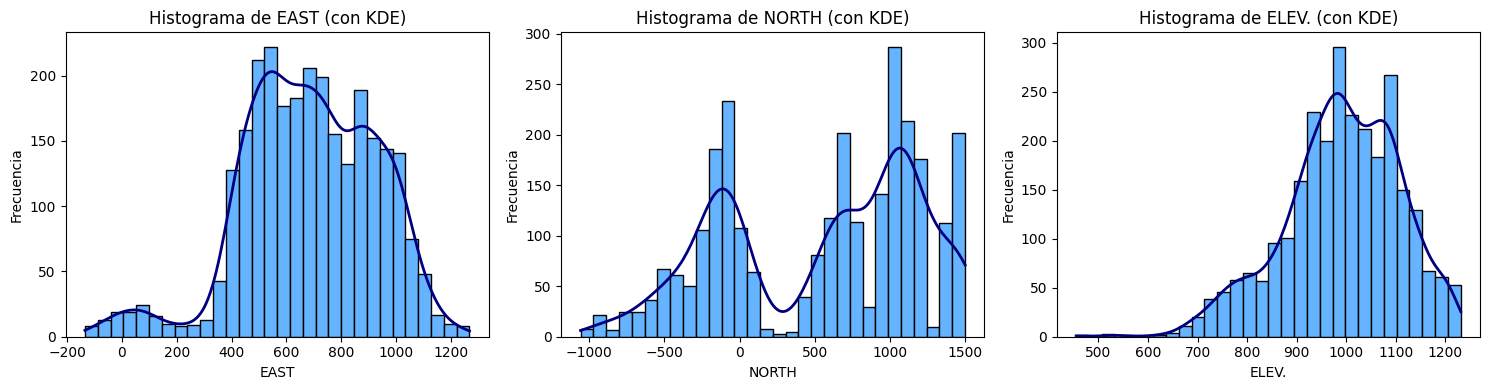

In [ ]:
# Columnas a graficar - solo coordenadas
incluir = {"EAST", "NORTH", "ELEV."}  #  también coords
cols = [c for c in df_3.columns if c  in incluir]

# Configuración de grilla
n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    if pd.api.types.is_numeric_dtype(df_3[col]):
        data = pd.to_numeric(df_3[col], errors="coerce").dropna()

        # Histograma en frecuencia absoluta
        counts, bins, patches = ax.hist(data, bins=30, edgecolor="black", color="#66b3ff")

        # Línea KDE escalada a la frecuencia
        kde = gaussian_kde(data)
        x_vals = np.linspace(min(data), max(data), 200)
        kde_vals = kde(x_vals) * len(data) * (bins[1] - bins[0])  # escalar al histograma

        ax.plot(x_vals, kde_vals, color="navy", linewidth=2)

        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Histograma de {col} (con KDE)")
    else:
        # Barras para categóricas
        df_3[col].value_counts(dropna=False).plot(
            kind="bar", edgecolor="black", color="#66b3ff", ax=ax
        )
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Conteo de {col}")

# Apagar ejes sobrantes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



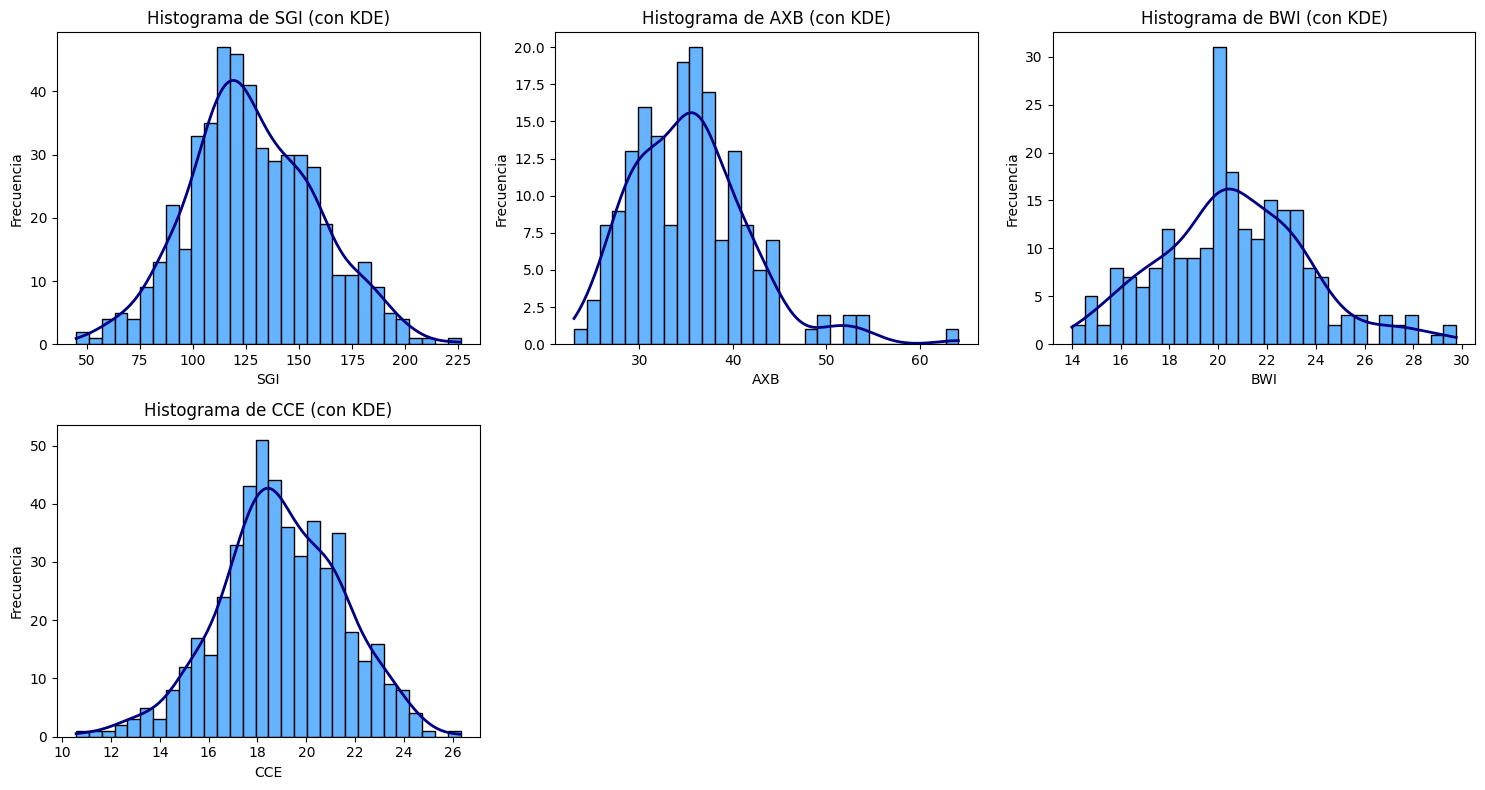

In [ ]:


# Columnas a graficar (excepto REF, LITO_DESC, RX_DESC, LITO_COD, RX_UNIFI) # Quitamos variables categóricas
excluir = {"REF", "LITO_DESC", "RX_DESC", "EAST", "NORTH", "ELEV.","LITO_COD", "RX_UNIFI"}  # quitamos también coords
cols = [c for c in df_3.columns if c not in excluir]

# Configuración de grilla
n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    if pd.api.types.is_numeric_dtype(df_3[col]):
        data = pd.to_numeric(df_3[col], errors="coerce").dropna()

        # Histograma en frecuencia absoluta
        counts, bins, patches = ax.hist(data, bins=30, edgecolor="black", color="#66b3ff")

        # Línea KDE escalada a la frecuencia
        kde = gaussian_kde(data)
        x_vals = np.linspace(min(data), max(data), 200)
        kde_vals = kde(x_vals) * len(data) * (bins[1] - bins[0])  # escalar al histograma

        ax.plot(x_vals, kde_vals, color="navy", linewidth=2)

        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Histograma de {col} (con KDE)")
    else:
        # Barras para categóricas
        df_3[col].value_counts(dropna=False).plot(
            kind="bar", edgecolor="black", color="#66b3ff", ax=ax
        )
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        ax.set_title(f"Conteo de {col}")

# Apagar ejes sobrantes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


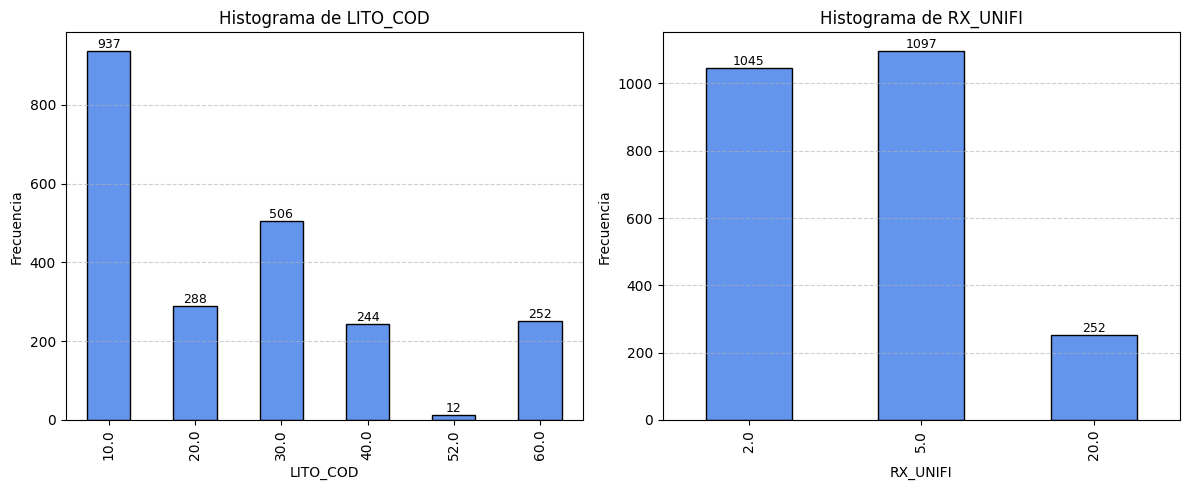

In [ ]:


# Variables categóricas a graficar
cat_cols = ["LITO_COD", "RX_UNIFI"]

# Configuración de grilla
n = len(cat_cols)
fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

# Si solo hay una variable, convertir axes en lista
if n == 1:
    axes = [axes]

for ax, col in zip(axes, cat_cols):
    # Conteo de frecuencias SIN NaN y ordenado por código
    counts = (
        df_3[col]
        .dropna()  # quitar NaN
        .value_counts()
        .sort_index()  # orden de menor a mayor
    )

    # Histograma de barras
    counts.plot(kind="bar", ax=ax, color="cornflowerblue", edgecolor="black")
    ax.set_title(f"Histograma de {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    # Etiquetas de valor sobre cada barra
    for x, y in enumerate(counts.values):
        ax.text(x, y, str(int(y)), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()



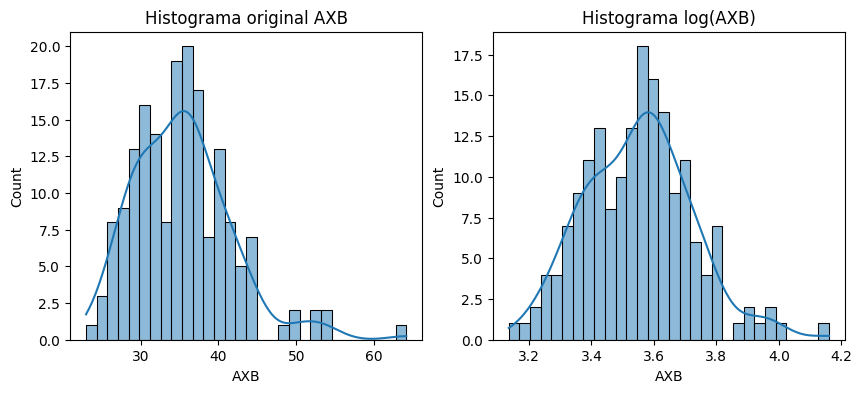

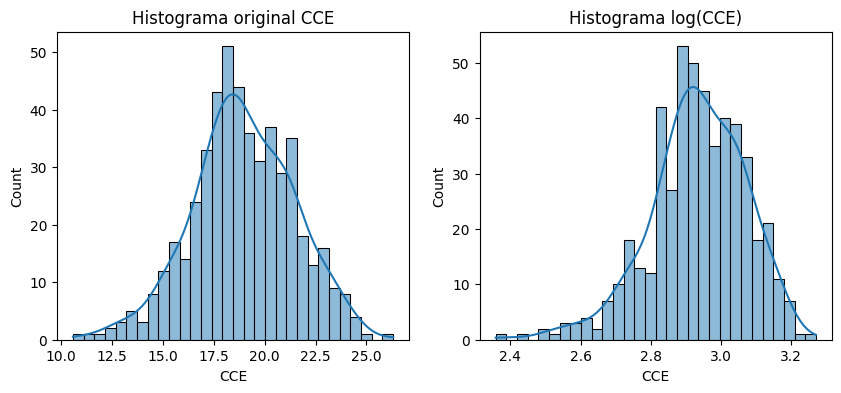

In [ ]:
for col in ["AXB", "CCE"]:
    datos = pd.to_numeric(df[col], errors="coerce").dropna()
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(datos, bins=30, kde=True)
    plt.title(f"Histograma original {col}")

    plt.subplot(1,2,2)
    sns.histplot(np.log(datos), bins=30, kde=True)
    plt.title(f"Histograma log({col})")
    plt.show()

### Análisis de la forma de distribución de las variables

En la Figura se presentan los histogramas de las variables **SGI, AXB, BWI y CCE**, junto con sus curvas de densidad ajustadas (KDE). A partir de estas representaciones, se pueden extraer las siguientes observaciones:

- **SGI**:  
  La distribución muestra un comportamiento aproximadamente simétrico con ligera cola hacia la derecha. La curva KDE se asemeja a una campana, lo que sugiere una aproximación razonable a una distribución normal, aunque la presencia de valores extremos en la cola superior indica cierta desviación.

- **AXB**:  
  La variable presenta un sesgo positivo marcado. La mayor parte de los valores se concentran en el rango 30–40, pero existe una cola larga hacia valores superiores a 60. La forma observada es característica de distribuciones log-normales, lo cual fue corroborado al aplicar la transformación logarítmica, que normaliza su comportamiento.

- **BWI**:  
  El histograma refleja una distribución con indicios de multimodalidad. Se observa un pico principal en torno a 20–21 y frecuencias adicionales menores en valores superiores. Esto, junto con la asimetría de la curva KDE, sugiere que la variable puede estar compuesta por más de una población o estar influenciada por distintas condiciones litológicas.

- **CCE**:  
  La forma de la distribución es cercana a la normalidad, mostrando un comportamiento simétrico con ligera cola hacia la derecha. La inclusión de la curva KDE confirma esta aproximación. Al aplicar la transformación logarítmica, la distribución se ajusta aún mejor a una forma normal, lo que refuerza la hipótesis de un comportamiento log-normal subyacente.

- **LITO**:
Se aprecia una distribución claramente desbalanceada entre litologías. La clase más representada corresponde a la litología 10 (Riodacita), con 937 observaciones, mientras que la clase menos representada, 52 (Dique riodacítico), cuenta únicamente con 12 registros. Este desbalance implica que los modelos predictivos podrían sesgar sus resultados hacia las litologías mayoritarias, reduciendo la capacidad de predicción en clases minoritarias. Además, la presencia de clases con muy baja representación dificulta la estimación de parámetros estadísticos robustos y puede generar inestabilidad en la imputación de datos y en técnicas de machine learning supervisado.

- **RX**: En este caso no se aprecia un desbalance problemático. La variable se encuentra estructurada en dos categorías principales, 5 (Estéril) y 2 (Sulfuro in situ), que concentran la gran mayoría de registros con proporciones similares (1.097 y 1.045 datos respectivamente). La clase 20 (Otros) funciona como categoría residual para casos no claramente definidos. Su menor frecuencia (252 registros) no constituye un sesgo, sino que responde a su carácter de agrupación de datos heterogéneos.


**En conclusión**, Se observa que las variables **SGI y CCE** presentan una distribución cercana a la normal, aunque con ligeras colas; **AXB** se ajusta mejor a un patrón log-normal lo que permite resaltar la distribucuón y minimizar el efecto outliers, mientras que **BWI** evidencia multimodalidad y heterogeneidad, posiblemente asociada a la presencia de distintas poblaciones de datos.

## 3.3 Gráficos de violin

### Grafico de violin contenido con cajas vertical

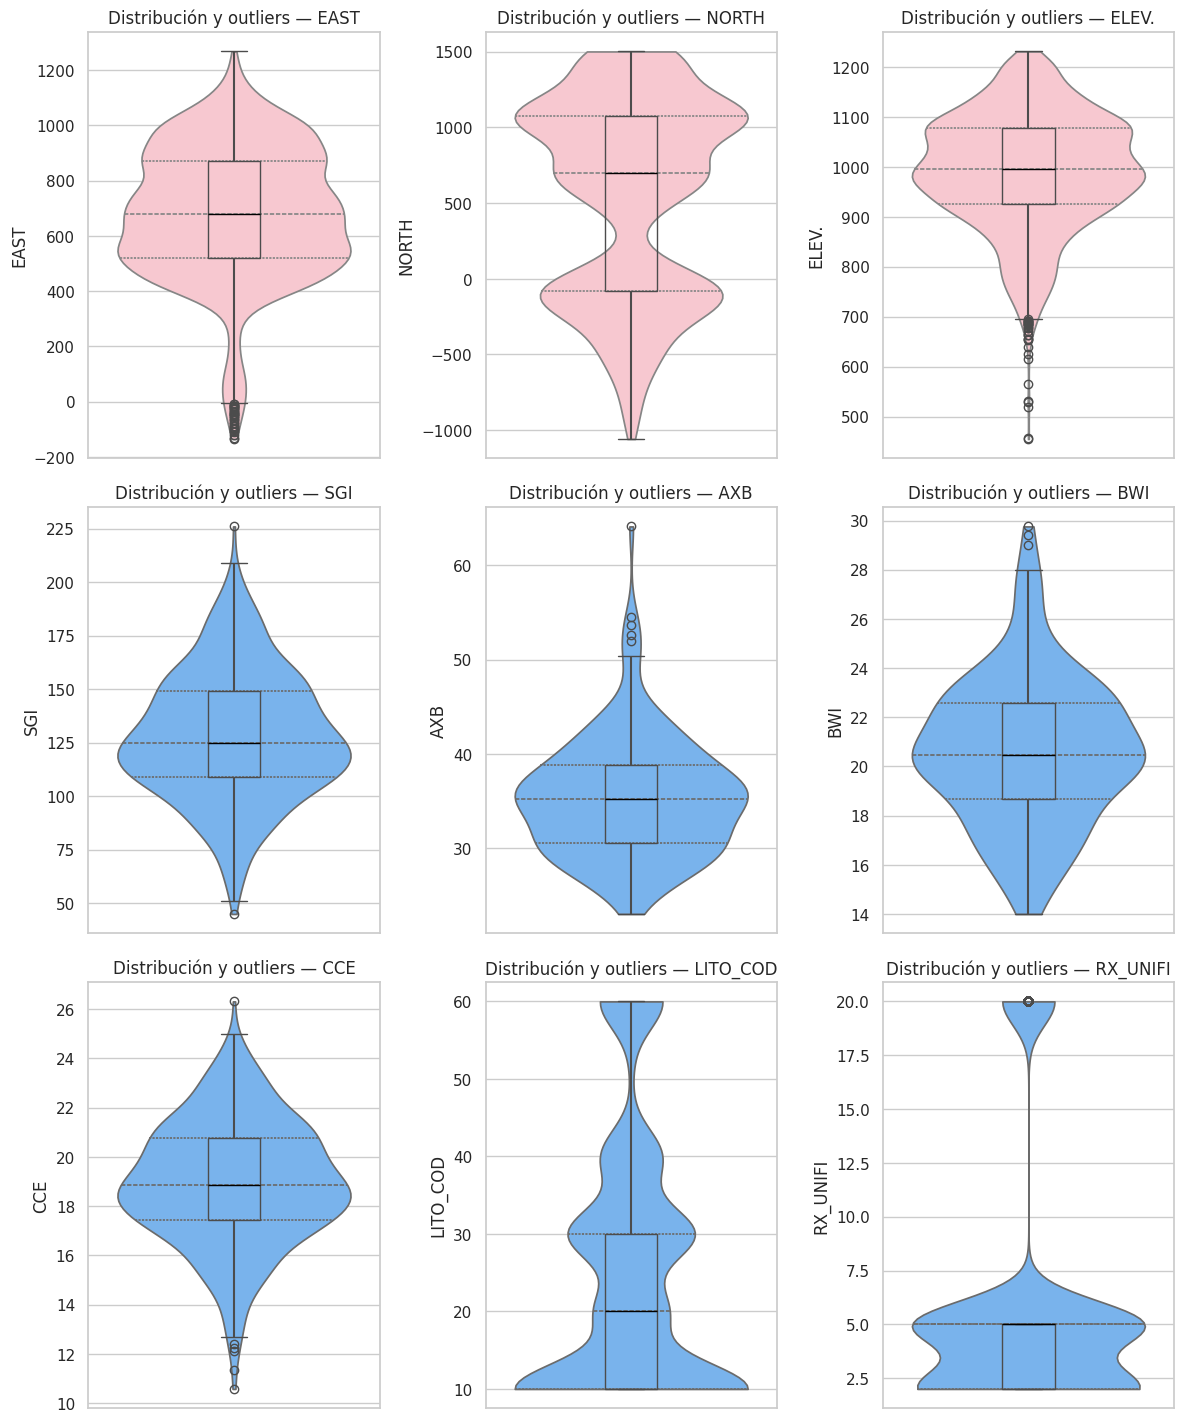

In [ ]:

sns.set_theme(style="whitegrid")
blue = "#66b3ff"
coords = {"EAST", "NORTH", "ELEV."}

# Variables numéricas sin REF


# Columnas a graficar (excepto REF, LITO_DESC y RX_DESC)
excluir = {"REF", "LITO_DESC", "RX_DESC"}
cols = [c for c in df_3.columns if c not in excluir]
num_cols = [c for c in df_3.select_dtypes(include="number").columns if c != "REF"]
if not num_cols:
    raise ValueError("No hay variables numéricas (distintas de REF) en df_3.")

# Tamaño de la grilla (ajusta ncols si quieres 3, 4, etc.)
n = len(num_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4.8*nrows), sharex=False)
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_cols):
    ax = axes[i]
    color = "pink" if col in coords else blue

    # Violín vertical con cuartiles (varianza/mediana)
    sns.violinplot(y=df_3[col], inner="quartile", cut=0, color=color, ax=ax)

    # Boxplot angosto encima (marca outliers por 1.5×IQR)
    sns.boxplot(y=df_3[col], width=0.18, showcaps=True,
                boxprops={"facecolor": "none"},
                showfliers=True,
                whiskerprops={"linewidth": 1.5},
                medianprops={"color": "black"},
                ax=ax)

    ax.set_title(f"Distribución y outliers — {col}")
    ax.set_xlabel("")           # sin etiqueta X
    ax.set_ylabel(col)

# Si sobran ejes vacíos, apágalos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se identifican valores outliers al superar los valores máximos y encontrarse por debajo del mínimo de los valores sin datos atipicos.

Se considerarán como **valores atípicos (outliers)** aquellos que se encuentran fuera de los límites definidos por el método del **Rango Intercuartílico (IQR)**.

El IQR corresponde a la diferencia entre el tercer cuartil (Q3, percentil 75) y el primer cuartil (Q1, percentil 25) de la distribución de los datos.

Un valor se clasifica como outlier si:

$$
\text{Valor} < Q1 - 1.5 \times IQR
$$

o

$$
\text{Valor} > Q3 + 1.5 \times IQR
$$

Estos límites, denominados **límite inferior** y **límite superior**, se utilizan como referencia para el proceso de **capping o winsorización**, donde los valores por debajo del límite inferior se reemplazan por dicho límite y los valores por encima del límite superior se sustituyen por éste.

Otra opción podría ser la aplicación de un test de grubs, pero considera otros supuestos y es más dificil de aplicar.


In [ ]:

# -------- Configuración --------
coords = {"EAST", "NORTH", "ELEV."}
excluir = {"REF", "LITO_COD","RX_UNIFI"}
num_cols = [c for c in df_3.select_dtypes(include="number").columns
            if c not in coords | excluir]

# -------- Función de capping por IQR --------
def capear_columna_IQR(df, col):
    s = pd.to_numeric(df[col], errors="coerce")
    # Si hay menos de 5 datos no nulos, no se calcula IQR de forma estable
    if s.notna().sum() < 5:
        return {
            "col": col, "Q1": np.nan, "Q3": np.nan, "IQR": np.nan,
            "lower": np.nan, "upper": np.nan,
            "n_bajo": 0, "n_alto": 0, "n_total": int(s.notna().sum()),
            "aplicado": False
        }

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask_bajo = s < lower
    mask_alto = s > upper

    # Nueva columna cappeada (winsorizada) sin pisar la original
    col_cap = f"{col}_CAP"
    df[col_cap] = s.clip(lower=lower, upper=upper)

    return {
        "col": col, "Q1": Q1, "Q3": Q3, "IQR": IQR,
        "lower": lower, "upper": upper,
        "n_bajo": int(mask_bajo.sum()),
        "n_alto": int(mask_alto.sum()),
        "n_total": int(s.notna().sum()),
        "aplicado": True
    }

# -------- Ejecutar para todas las variables seleccionadas --------
auditoria = []
for col in num_cols:
    info = capear_columna_IQR(df_3, col)
    auditoria.append(info)

auditoria_df = pd.DataFrame(auditoria).sort_values("col")
print("Resumen de capping (IQR):")
print(auditoria_df.to_string(index=False))

# Ejemplo: cuántos valores fueron cappeados en total
total_bajo = auditoria_df["n_bajo"].sum()
total_alto = auditoria_df["n_alto"].sum()
print(f"\nTotal cappeados por debajo del límite: {total_bajo}")
print(f"Total cappeados por encima del límite: {total_alto}")

# Nota: las columnas resultantes están en df_3 con sufijo *_CAP
# (p.ej., SGI_CAP, AXB_CAP, BWI_CAP, CCE_CAP, etc.)

Resumen de capping (IQR):
col         Q1         Q3       IQR     lower     upper  n_bajo  n_alto  n_total  aplicado
AXB  30.582500  38.812500  8.230000 18.237500  51.15750       0       5      176      True
BWI  18.666000  22.586000  3.920000 12.786000  28.46600       0       3      227      True
CCE  17.439842  20.747881  3.308039 12.477784  25.70994       5       1      500      True
SGI 109.000000 149.000000 40.000000 49.000000 209.00000       1       1      500      True

Total cappeados por debajo del límite: 6
Total cappeados por encima del límite: 10


In [ ]:
df_3.head()   # me muestra la base de datos, se aprecian las últimas 4 columans que fueron cappeadas, se decide duplicar la base y realizar un drop.

REF    EAST   NORTH   ELEV.  SGI  AXB     BWI  CCE  LITO_COD  LITO_DESC  \
0    1  1015.6  -95.15   958.2  NaN  NaN  22.100  NaN      10.0  Riodacita   
1    2  1024.8  -95.35  1032.7  NaN  NaN  20.736  NaN       NaN        NaN   
2    3   979.6 -274.55   906.4  NaN  NaN  21.161  NaN      10.0  Riodacita   
3    4   995.2 -112.05   931.0  NaN  NaN  20.015  NaN      10.0  Riodacita   
4    5   984.7 -125.35   924.3  NaN  NaN  20.028  NaN      10.0  Riodacita   

           RX_DESC  RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP  
0          Estéril       5.0      NaN      NaN   22.100      NaN  
1          Estéril       5.0      NaN      NaN   20.736      NaN  
2  Sulfuro in situ       2.0      NaN      NaN   21.161      NaN  
3  Sulfuro in situ       2.0      NaN      NaN   20.015      NaN  
4  Sulfuro in situ       2.0      NaN      NaN   20.028      NaN

In [ ]:
# Crear df_4 excluyendo columnas SGI, AXB, BWI, CCE que es la que no tienen el capping, conservando valores extremos
df_4 = df_3.drop(columns=["SGI", "AXB", "BWI", "CCE"])
df_4.head()


REF    EAST   NORTH   ELEV.  LITO_COD  LITO_DESC          RX_DESC  \
0    1  1015.6  -95.15   958.2      10.0  Riodacita          Estéril   
1    2  1024.8  -95.35  1032.7       NaN        NaN          Estéril   
2    3   979.6 -274.55   906.4      10.0  Riodacita  Sulfuro in situ   
3    4   995.2 -112.05   931.0      10.0  Riodacita  Sulfuro in situ   
4    5   984.7 -125.35   924.3      10.0  Riodacita  Sulfuro in situ   

   RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP  
0       5.0      NaN      NaN   22.100      NaN  
1       5.0      NaN      NaN   20.736      NaN  
2       2.0      NaN      NaN   21.161      NaN  
3       2.0      NaN      NaN   20.015      NaN  
4       2.0      NaN      NaN   20.028      NaN

In [ ]:
# Verifica que sea DataFrame y mira tipos (debug rápido)
print(type(df_4))
print(df_4.dtypes)


# (equivalente explícito)
std_num_alt = df_4.select_dtypes(include="number").std(ddof=1)

# Resumen útil
print("\nResumen describe() de numéricas:")
print(df_4.select_dtypes(include="number").describe())

<class 'pandas.core.frame.DataFrame'>
REF            int64
EAST         float64
NORTH        float64
ELEV.        float64
LITO_COD     float64
LITO_DESC     object
RX_DESC       object
RX_UNIFI     float64
SGI_CAP      float64
AXB_CAP      float64
BWI_CAP      float64
CCE_CAP      float64
dtype: object

Resumen describe() de numéricas:
               REF         EAST        NORTH        ELEV.     LITO_COD  \
count  2738.000000  2738.000000  2738.000000  2738.000000  2239.000000   
mean   1370.384222   683.036633   547.340029   990.740029    24.928093   
std     787.451255   242.900122   652.499798   117.491926    16.414692   
min       1.000000  -135.200000 -1057.950000   455.000000    10.000000   
25%     686.250000   520.600000   -82.325000   925.550000    10.000000   
50%    1377.500000   679.350000   700.050000   996.200000    20.000000   
75%    2063.750000   872.000000  1077.225000  1078.775000    30.000000   
max    2723.000000  1267.700000  1500.950000  1231.200000    60.000000

## Nuevos graficos de Violin para datos sin outliers, duplicados y errores de litología y rx



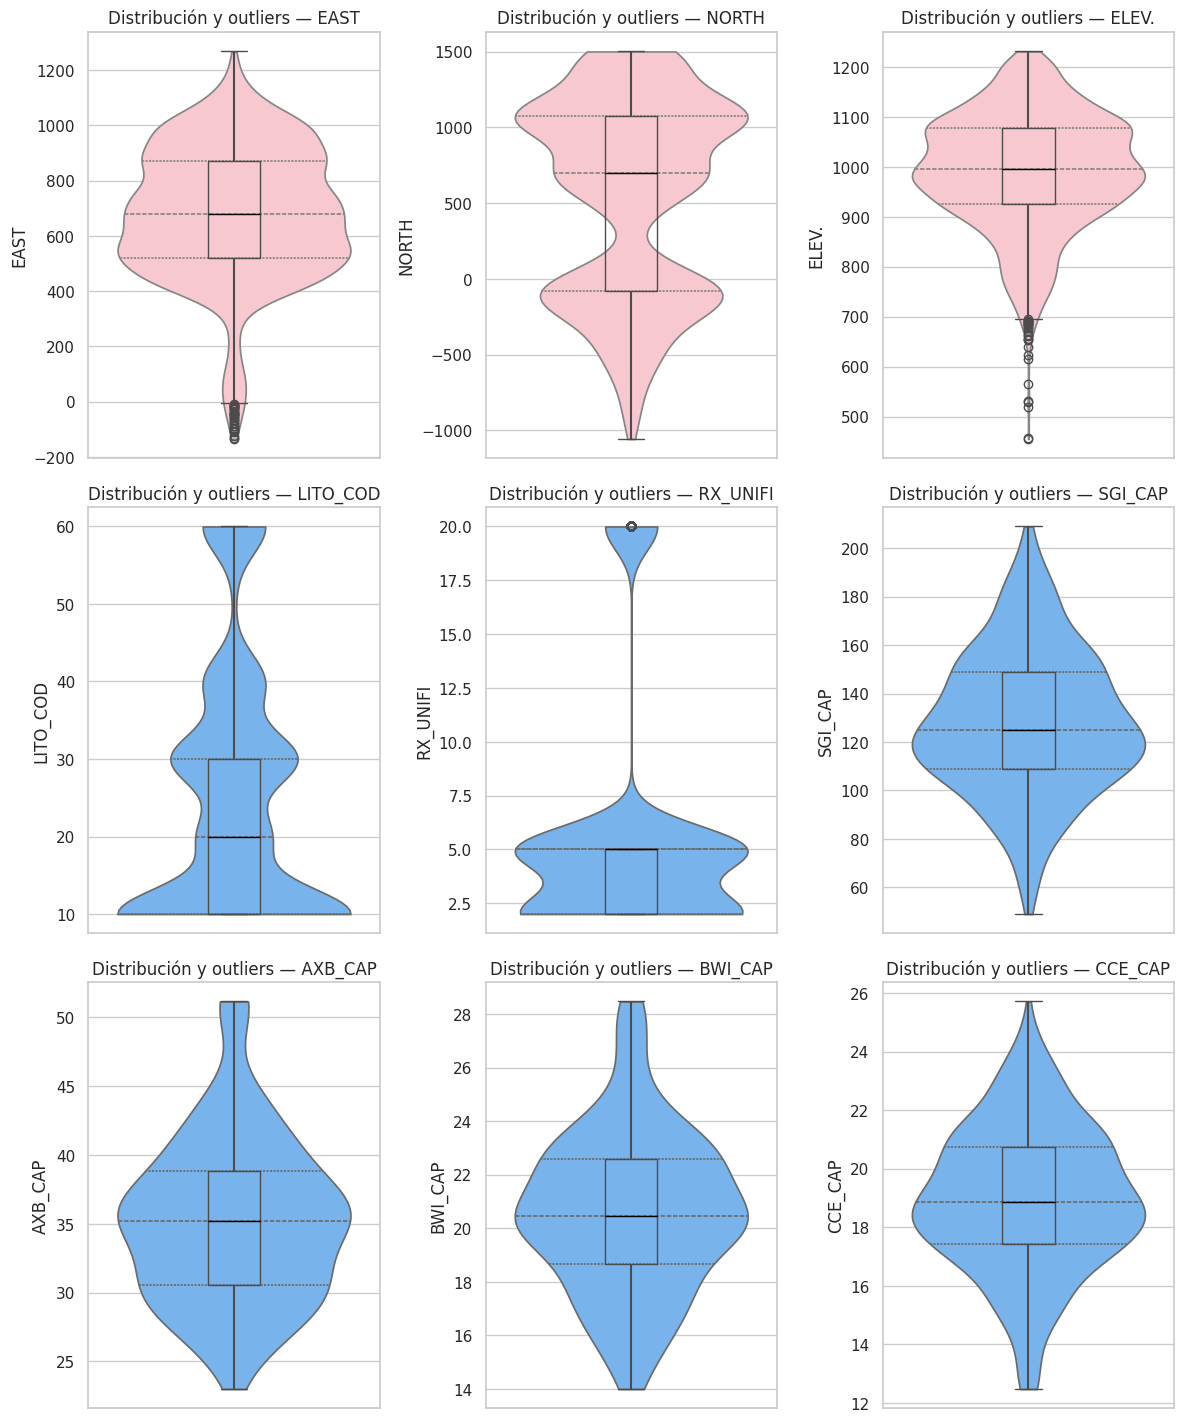

In [ ]:

sns.set_theme(style="whitegrid")
blue = "#66b3ff"
coords = {"EAST", "NORTH", "ELEV."}

# Variables numéricas sin REF
num_cols = [c for c in df_4.select_dtypes(include="number").columns if c != "REF"]
if not num_cols:
    raise ValueError("No hay variables numéricas (distintas de REF) en df_4.")

# Tamaño de la grilla (ajusta ncols si quieres 3, 4, etc.)
n = len(num_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4.8*nrows), sharex=False)
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_cols):
    ax = axes[i]
    color = "pink" if col in coords else blue

    # Violín vertical con cuartiles (varianza/mediana)
    sns.violinplot(y=df_4[col], inner="quartile", cut=0, color=color, ax=ax)

    # Boxplot angosto encima (marca outliers por 1.5×IQR)
    sns.boxplot(y=df_4[col], width=0.18, showcaps=True,
                boxprops={"facecolor": "none"},
                showfliers=True,
                whiskerprops={"linewidth": 1.5},
                medianprops={"color": "black"},
                ax=ax)

    ax.set_title(f"Distribución y outliers — {col}")
    ax.set_xlabel("")           # sin etiqueta X
    ax.set_ylabel(col)

# Si sobran ejes vacíos, apágalos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3.5 Nubes de dispersión totales - Pair Plot

Se generará un pairplot que mostrará las nubes de dispersión y distribuciones univariadas de  las variables del conjunto de datos. Esto permitirá visualizar de forma simultánea las relaciones, tendencias y posibles patrones entre cada par de variables, así como identificar outliers o agrupamientos.  

Siguiendo el enfoque de análisis exploratorio de Chilès y Delfiner (2012), utilizamos nubes de dispersión para identificar relación, outliers y heterocedasticidad entre variables; con ese diagnóstico seleccionamos predictores y estandarización y aplicamos imputación por K-vecinos más cercanos (KNN) para CCE.”

Fuente: Chilès, J.-P., & Delfiner, P. (2012). Geostatistics: Modeling Spatial Uncertainty (2nd ed.). Wiley. (Marco teórico y práctica; EDA para decidir transformaciones/modelos).

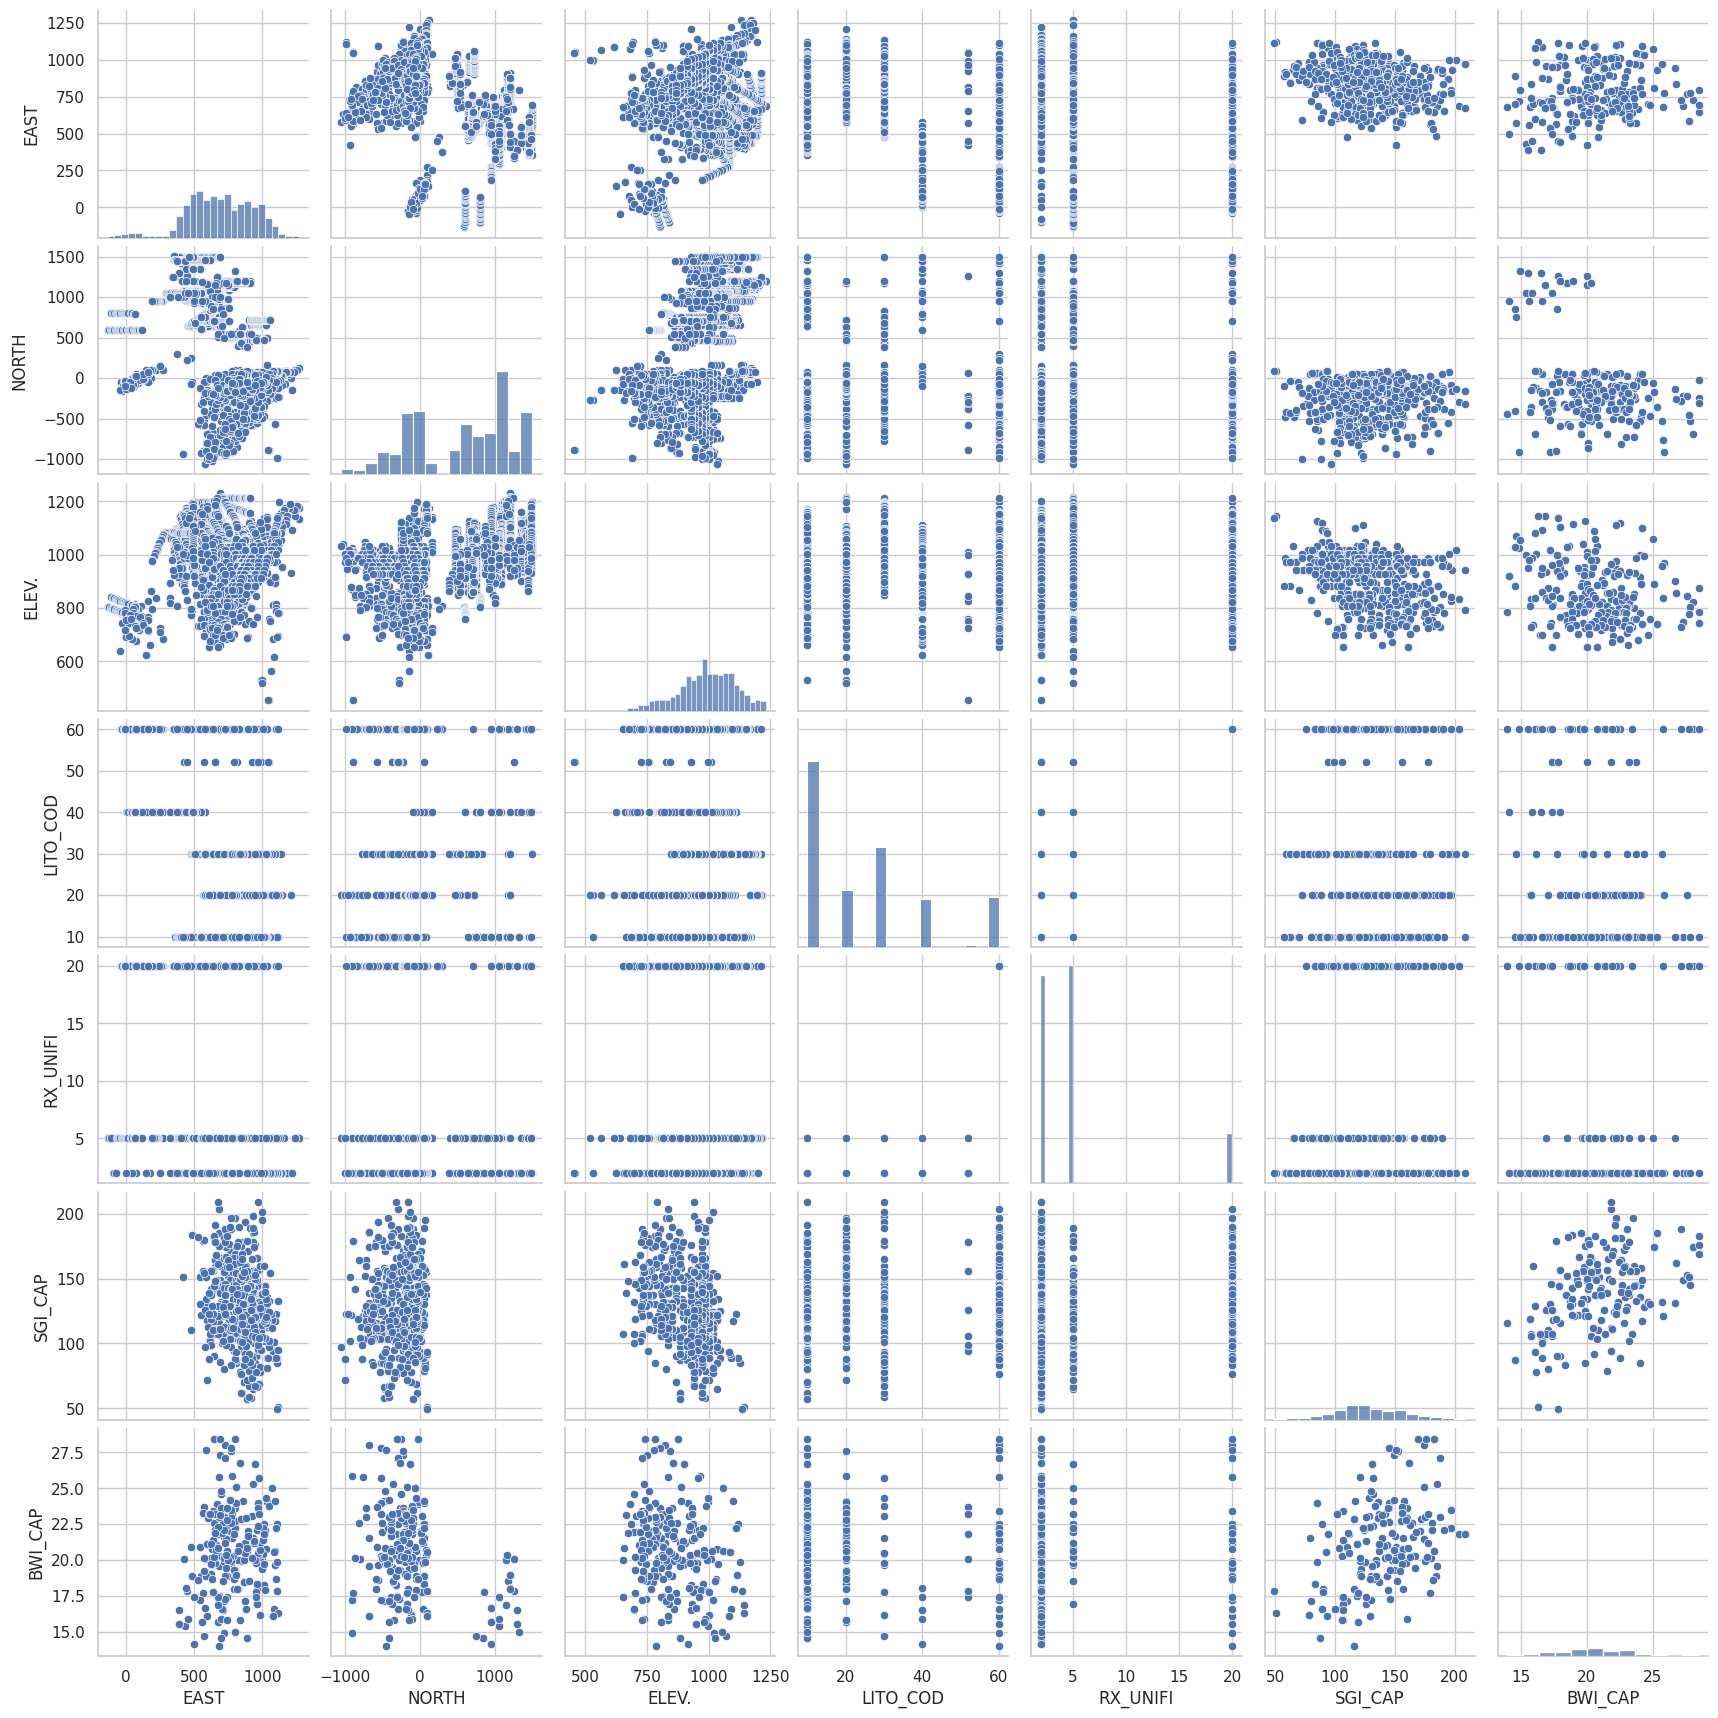

In [ ]:
# Seleccionar todas las columnas menos REF, CCE, AXB
cols = [c for c in df_4.columns if c not in ["REF", "CCE_CAP","AXB_CAP"]]

# Pairplot sin REF ni CCE ni AXB
sns.pairplot(data=df_4[cols])

## 3.6 Estudio de Correlación entre variables

### ¿Cómo se calcula la Matriz de Correlación?

Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre diferentes variables. Cada celda en la matriz representa la correlación entre dos variables específicas (Soporte de Minitab, 2025).

El coeficiente de correlación más común es el **coeficiente de correlación de Pearson (r)**, que mide la fuerza y dirección de la relación lineal entre dos variables numéricas. Su valor varía entre -1 y +1:

*   **+1:** Indica una correlación lineal positiva perfecta (cuando una variable aumenta, la otra también aumenta).
*   **-1:** Indica una correlación lineal negativa perfecta (cuando una variable aumenta, la otra disminuye).
*   **0:** Indica que no hay correlación lineal entre las dos variables.

La fórmula para calcular el coeficiente de correlación de Pearson entre dos variables, $X$ e $Y$, es:

$$
r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

Donde:
*   $n$ es el número de observaciones.
*   $x_i$ y $y_i$ son los valores individuales de las variables $X$ e $Y$.
*   $\bar{x}$ y $\bar{y}$ son las medias de las variables $X$ e $Y$.

Para construir la matriz de correlación completa, este cálculo se realiza para cada par de variables en tu conjunto de datos. La matriz resultante es simétrica, ya que la correlación entre $X$ e $Y$ es la misma que entre $Y$ y $X$. La diagonal principal de la matriz siempre contendrá valores de 1, ya que una variable siempre está perfectamente correlacionada consigo misma.

En el código que ejecutamos, la función `.corr(numeric_only=True)` de pandas realiza automáticamente estos cálculos para todas las columnas numéricas del DataFrame. No se realiza analisis de correlaciÓn en la variable #REF ni especiales (EAST, NORTH, ELEV.)


Fuente: Soporte de Minitab. (2025). Interpretar todos los estadísticos y gráficas para correlación. Minitab. https://support.minitab.com/es-mx/minitab/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/

Matriz de Correlación:


LITO_COD  RX_UNIFI   SGI_CAP   AXB_CAP   BWI_CAP   CCE_CAP
LITO_COD  1.000000  0.758455 -0.004281 -0.114196 -0.119369  0.003939
RX_UNIFI  0.758455  1.000000  0.056979 -0.095352 -0.053571  0.066344
SGI_CAP  -0.004281  0.056979  1.000000 -0.397037  0.396815  0.997363
AXB_CAP  -0.114196 -0.095352 -0.397037  1.000000 -0.259252 -0.406237
BWI_CAP  -0.119369 -0.053571  0.396815 -0.259252  1.000000  0.400132
CCE_CAP   0.003939  0.066344  0.997363 -0.406237  0.400132  1.000000

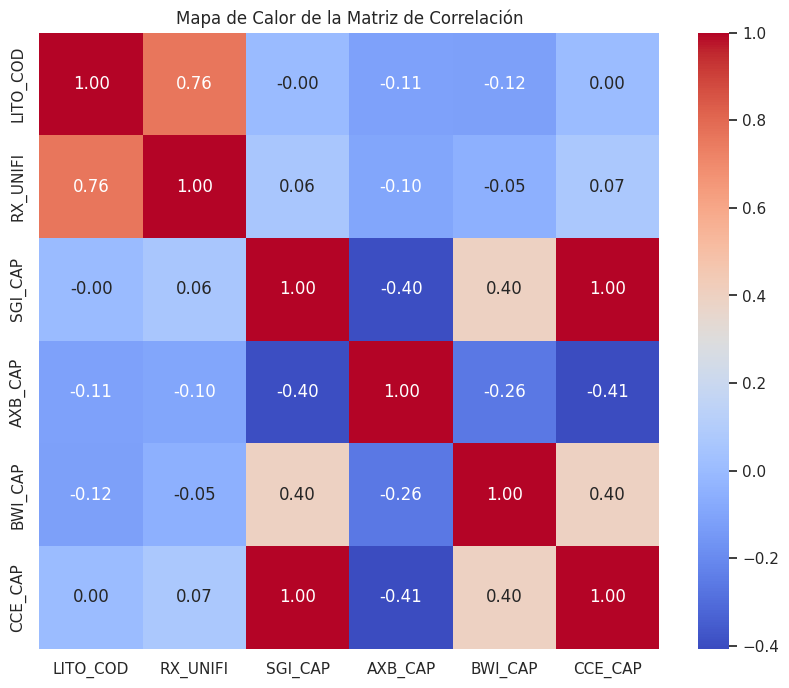

In [ ]:
# Calcular la matriz de correlación
# Eliminar las columnas de referencia espacial y 'REF' antes de calcular la correlación
columns_to_drop = ['REF', 'EAST', 'NORTH', 'ELEV.']
correlation_matrix = df_4.drop(columns=columns_to_drop).corr(numeric_only=True) #elimina las categoricas como las DESC

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
display(correlation_matrix)

# Opcional: Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

In [ ]:
# Identify pairs with correlation > 0.5 or < -0.5
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

        if abs(corr_value) > 0.5:
            high_corr_pairs.append((col1, col2, corr_value))

# Print the identified pairs
print("Variables con correlación > 0.5 o < -0.5:")
if high_corr_pairs:
    for col1, col2, corr_value in high_corr_pairs:
        print(f"- {col1} y {col2}: {corr_value:.2f}")
else:
    print("No se encontraron pares con correlación absoluta mayor a 0.5.")

Variables con correlación > 0.5 o < -0.5:
- LITO_COD y RX_UNIFI: 0.76
- SGI_CAP y CCE_CAP: 1.00


Basado en la matriz de correlación calculada:

*   **Correlación entre LITO_COD y RX_UNIFI**: El coeficiente de correlación es **0.76**. Esto indica una **correlación positiva fuerte** entre la Litología y el Tipo de Roca unificado. Tiene sentido que estas dos variables estén fuertemente relacionadas, ya que el tipo de roca a menudo depende de la litología. Un valor cercano a 1 sugiere que, en general, ciertos códigos de litología tienden a estar asociados con ciertos códigos de tipo de roca. texto en negrita

*   **Correlación entre SGI_CAP y CCE_CAP**: El coeficiente de correlación es **1**. Esto indica una **correlación positiva casi perfecta** entre el SGI (SPI) y el CCE (Consumo Específico de Energía), después de aplicar el capping. Este resultado es esperable y valida la relación teórica y la fórmula utilizada previamente para imputar valores de CCE a partir de SGI. Un valor tan cercano a 1 sugiere que estas dos variables varían de manera casi idéntica, lo cual es consistente con la dependencia de CCE en SGI según la ecuación proporcionada.


## 3.7 Vistas XY, YZ, XZ, XYZ de las variables.

Se revisarán los datos en gráficos con diversas vistas, lo que permitirá ver cómo se organizan las diferentes propiedades de la roca según su ubicación en el espacio. Esto permite identificar dominios, estructuras y contactos geológicos, definiendo zonas de interés para una futura buena toma de decisiones.

[Escalas de colores](https://plotly-com.translate.goog/python/builtin-colorscales/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc)

### 3.7.1 Vistas 2D

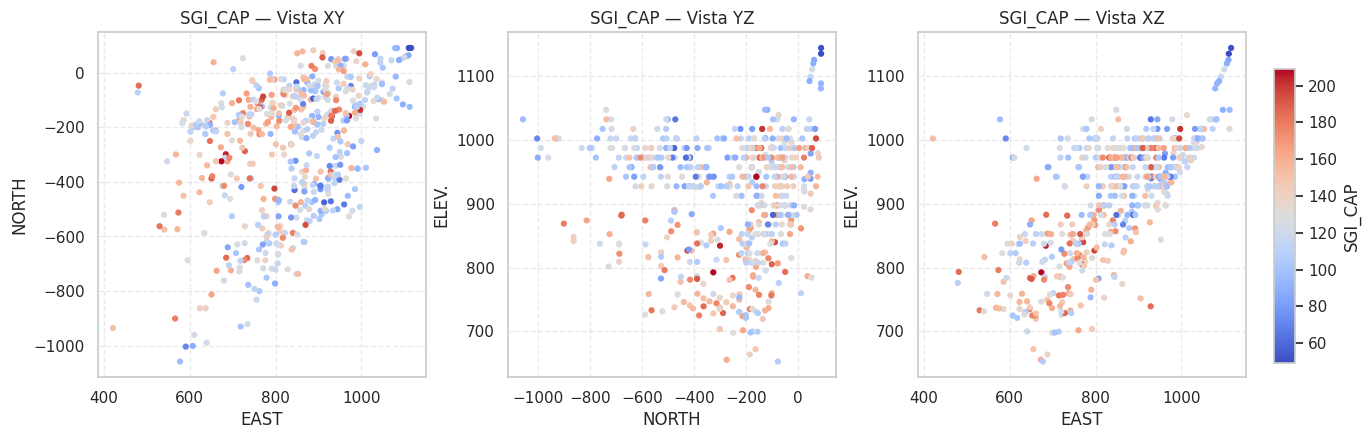

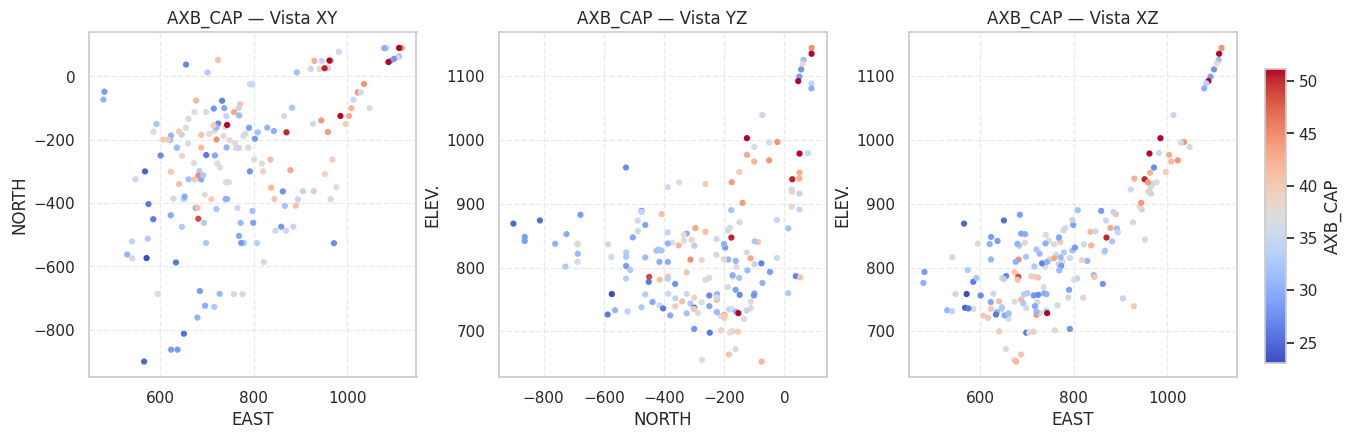

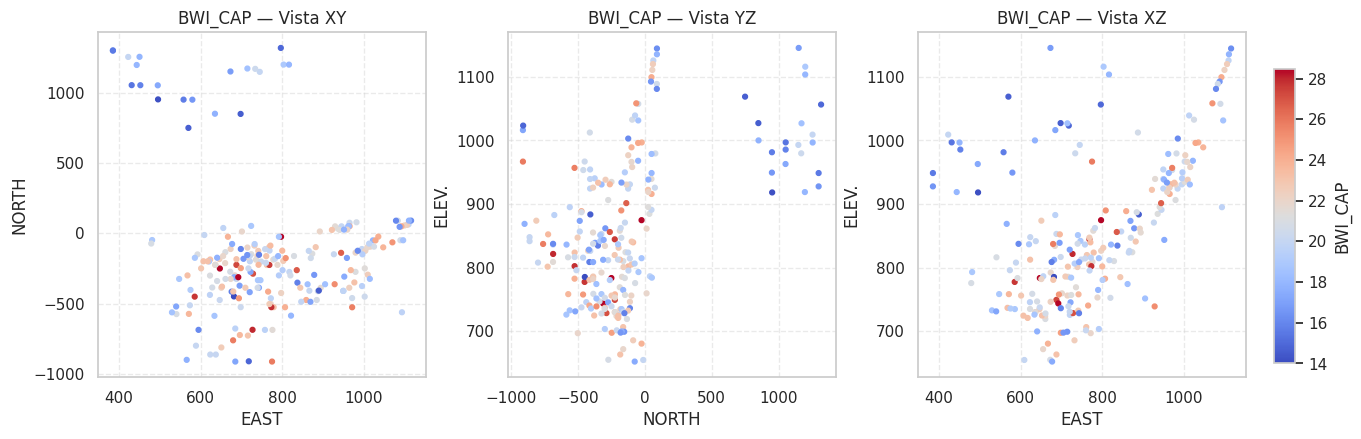

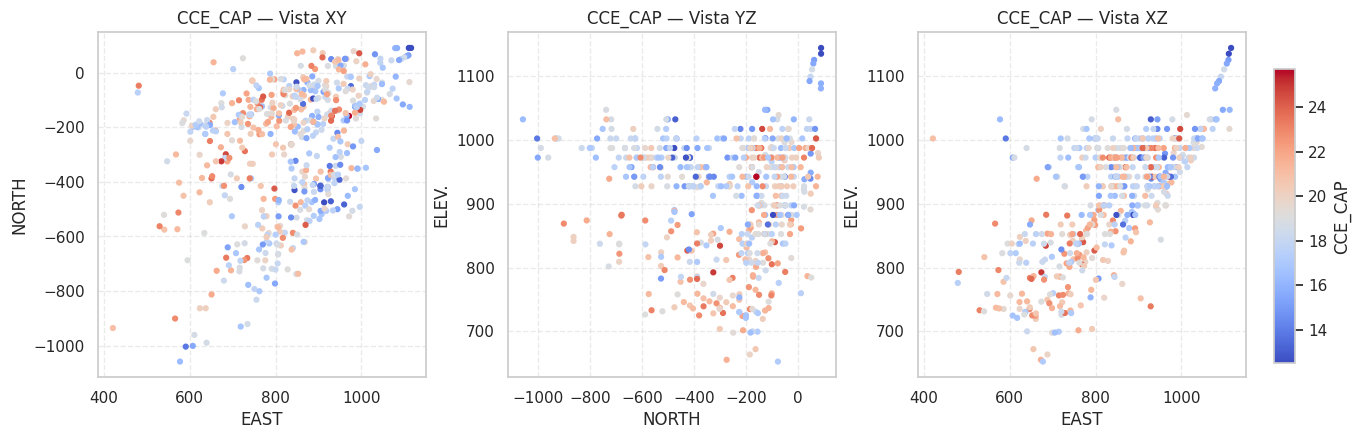

In [ ]:

coords = ["EAST", "NORTH", "ELEV."]      # como en df_4
vars_num = [c for c in df_4.select_dtypes(include="number").columns
            if c not in ["REF", "LITO_COD","RX_UNIFI", *coords]]
cmap = "coolwarm"

def plot_2d_proyecciones_color(df, var, cmap="coolwarm"):
    d_xy = df.dropna(subset=["EAST", "NORTH", var])
    d_yz = df.dropna(subset=["NORTH", "ELEV.", var])
    d_xz = df.dropna(subset=["EAST", "ELEV.", var])

    vmin = np.nanmin(df[var].values)
    vmax = np.nanmax(df[var].values)
    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])

    # --- figura sin constrained_layout (lo controlamos manualmente) ---
    fig, axes = plt.subplots(1, 3, figsize=(14, 4.6))
    ax1, ax2, ax3 = axes

    # XY
    ax1.scatter(d_xy["EAST"], d_xy["NORTH"], c=d_xy[var], s=12, cmap=cmap, norm=norm)
    ax1.set_xlabel("EAST"); ax1.set_ylabel("NORTH"); ax1.set_title(f"{var} — Vista XY"); ax1.grid(True, ls="--", alpha=0.4)

    # YZ
    ax2.scatter(d_yz["NORTH"], d_yz["ELEV."], c=d_yz[var], s=12, cmap=cmap, norm=norm)
    ax2.set_xlabel("NORTH"); ax2.set_ylabel("ELEV."); ax2.set_title(f"{var} — Vista YZ"); ax2.grid(True, ls="--", alpha=0.4)

    # XZ
    ax3.scatter(d_xz["EAST"], d_xz["ELEV."], c=d_xz[var], s=12, cmap=cmap, norm=norm)
    ax3.set_xlabel("EAST"); ax3.set_ylabel("ELEV."); ax3.set_title(f"{var} — Vista XZ"); ax3.grid(True, ls="--", alpha=0.4)

    # --- espacio para la barra de color a la derecha ---
    # Ajusta márgenes para dejar hueco (right=0.88 deja 12% a la derecha)
    fig.subplots_adjust(left=0.06, right=0.88, wspace=0.25, top=0.9, bottom=0.15)

    # Eje dedicado al colorbar: [left, bottom, width, height] en coords de figura
    cax = fig.add_axes([0.90, 0.18, 0.015, 0.64])  # vertical a la derecha
    cb = fig.colorbar(sm, cax=cax)
    cb.set_label(var)

    plt.show()

# Ejemplo: correr para todas las variables numéricas (excepto coords y REF)
for v in vars_num:
    plot_2d_proyecciones_color(df_4, v)

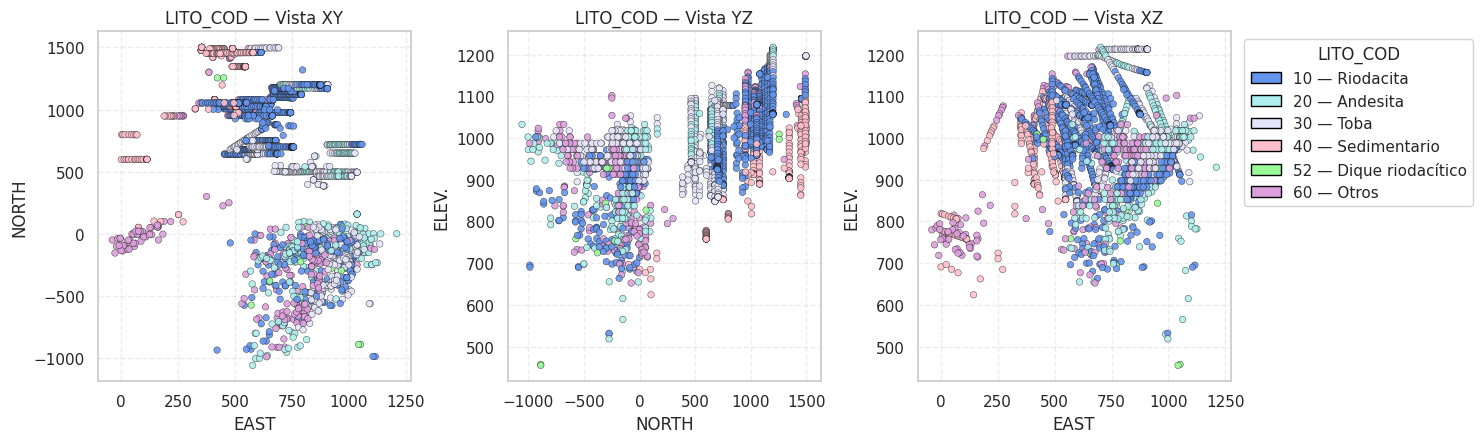

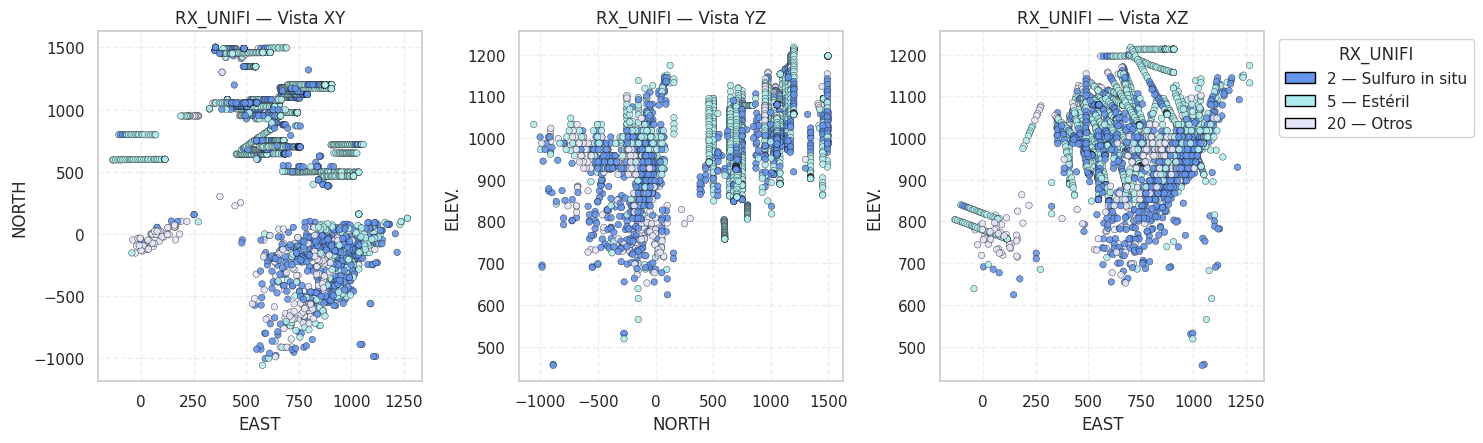

In [ ]:
# --------------------------
# Configuración
# --------------------------
coords = ["EAST", "NORTH", "ELEV."]                     # ejes espaciales
cat_cols = [c for c in ["LITO_COD", "RX_UNIFI"] if c in df_4.columns]

# Paleta discreta (se cicla si hay más categorías)
palette_disc = ["cornflowerblue", "paleturquoise", "lavender", "pink", "palegreen",
                "plum", "lightsalmon", "khaki", "lightcoral", "lightseagreen"]

# --------------------------
# Helper para etiqueta de categoría
# --------------------------
def cat_label(df, var, code):
    if var == "LITO_COD" and "LITO_DESC" in df.columns:
        desc = df.loc[df[var] == code, "LITO_DESC"].dropna().unique()
        return f"{int(code)} — {desc[0]}" if len(desc) else f"{int(code)}"
    if var == "RX_UNIFI" and "RX_DESC" in df.columns:
        desc = df.loc[df[var] == code, "RX_DESC"].dropna().unique()
        return f"{int(code)} — {desc[0]}" if len(desc) else f"{int(code)}"
    return f"{int(code)}" if float(code).is_integer() else str(code)

# --------------------------
# Plot 2D por variable categórica
# --------------------------
for var in cat_cols:
    d = df_4.dropna(subset=coords + [var]).copy()
    if d.empty:
        print(f"[AVISO] {var}: no hay datos completos (coords + variable).")
        continue

    # categorías ordenadas por código
    codigos = pd.to_numeric(d[var], errors="coerce")
    cats = np.sort(codigos.dropna().unique())
    color_map = {c: palette_disc[i % len(palette_disc)] for i, c in enumerate(cats)}
    point_colors = codigos.map(color_map)

    # Figura con 3 proyecciones 2D
    fig, axes = plt.subplots(1, 3, figsize=(15, 4.6))
    (ax_xy, ax_yz, ax_xz) = axes

    # --- XY ---
    ax_xy.scatter(d["EAST"], d["NORTH"], c=point_colors, s=22, alpha=0.9, edgecolor="k", linewidth=0.3)
    ax_xy.set_xlabel("EAST"); ax_xy.set_ylabel("NORTH"); ax_xy.set_title(f"{var} — Vista XY")
    ax_xy.grid(True, ls="--", alpha=0.35)

    # --- YZ ---
    ax_yz.scatter(d["NORTH"], d["ELEV."], c=point_colors, s=22, alpha=0.9, edgecolor="k", linewidth=0.3)
    ax_yz.set_xlabel("NORTH"); ax_yz.set_ylabel("ELEV."); ax_yz.set_title(f"{var} — Vista YZ")
    ax_yz.grid(True, ls="--", alpha=0.35)

    # --- XZ ---
    sc = ax_xz.scatter(d["EAST"], d["ELEV."], c=point_colors, s=22, alpha=0.9, edgecolor="k", linewidth=0.3)
    ax_xz.set_xlabel("EAST"); ax_xz.set_ylabel("ELEV."); ax_xz.set_title(f"{var} — Vista XZ")
    ax_xz.grid(True, ls="--", alpha=0.35)

    # Leyenda (misma para las tres vistas, colocada a la derecha)
    handles = [Patch(facecolor=color_map[c], edgecolor="black", label=cat_label(d, var, c)) for c in cats]
    axes[2].legend(handles=handles, title=var, bbox_to_anchor=(1.02, 1), loc="upper left",
                   frameon=True, facecolor="white", framealpha=0.85)

    plt.tight_layout()
    plt.show()



* Se puede apreciar que para los primeros gráficos **Litología y Tipo de roca**, se muestra una estructura con dominios litológicos definidos.

* Los valores altos para los gráficos de litología se encuentran en las zonas más profundas (gráfico XY).

* En cuanto a los gráficos de **Tipo de Roca**, se observan zonas con características similares, lo que sugiere unidades geológicas con características distintivas.

* Para los gráficos de propiedades mecánicas **SAG Power Index y los Parámetros de Impacto**, se presentan zonas diferenciadas con propiedades muy distintas, que permite identificar zonas críticas según su comportamiento geomecánico.

* Respecto a los gráficos de propiedades energéticas, para los **Bond Work Index** se tienen valores en rangos de entre 18 y 24, lo que indica una distribución más homogénea con pocas anomalías fuertes.

* Finalmente, para los gráficos **Consumo Específico de Energía** se tiene una variación más marcada que está a la par de la litología y tipos de roca, l que se relaciona directamente a que el consumo de energía en molienda esta directamente corelacionado al tipo de roca que se envia a chancado, ya que distintas litologías presentan diferentes propiedades de indice de resistencia a la compresión uniaxial (IRS). Ejemplo: Un monzogranito tiene diferente dureza a una brecha, lo que implicarán distinto consumo energetico para su molienda.



### 3.7.2 Vistas 3D

Se realizarán gráficos con una visión tridimensional de los datos en el espacio. Esto permitirá apreciar de una mejor manera como se comportan los datos con respecto a la elevación y dirección en el espacio.

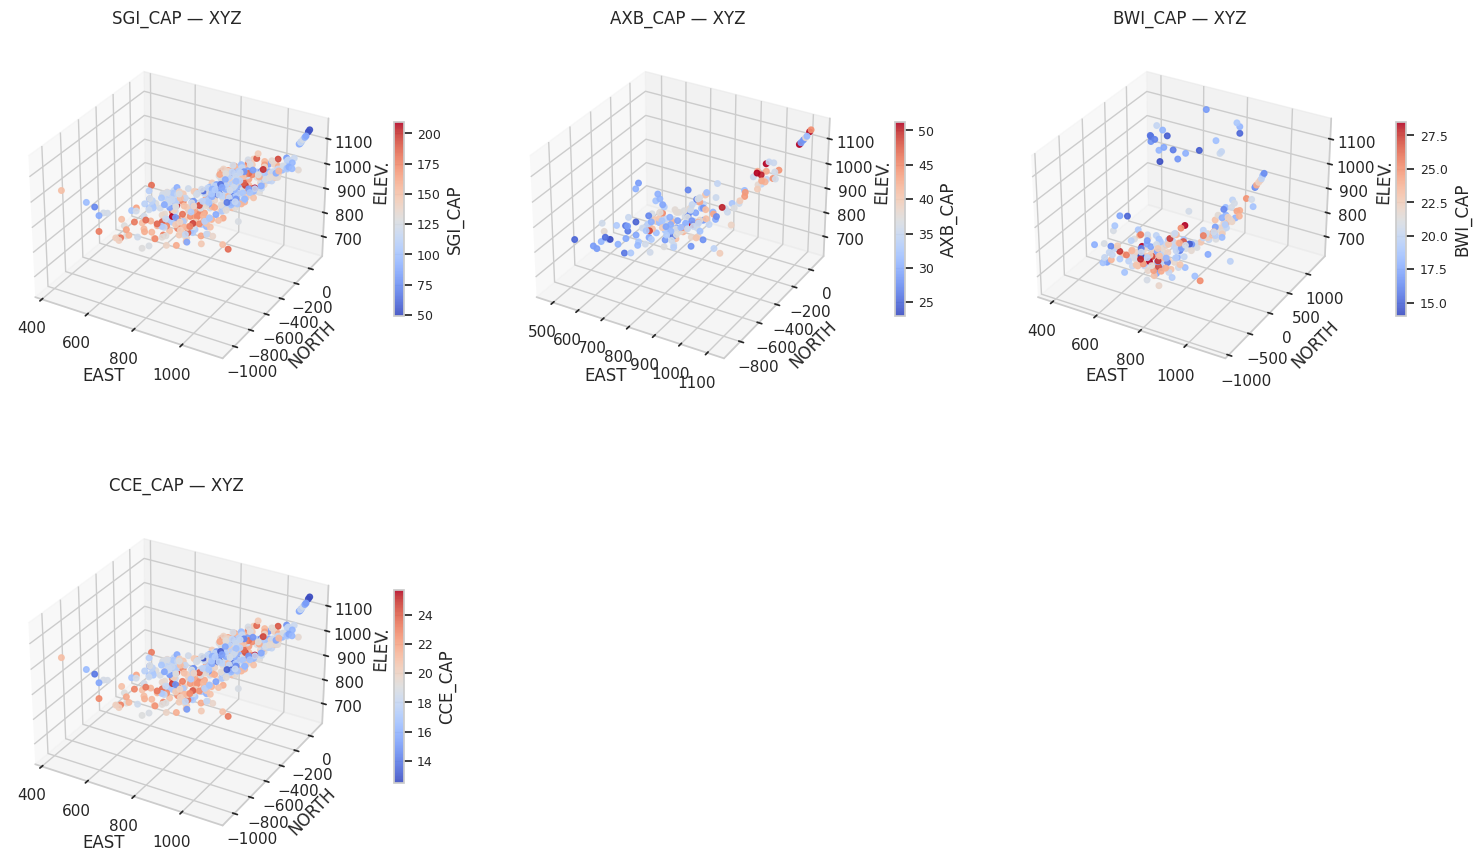

In [ ]:
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_vars_3d(df, vars_list=None, cmap="coolwarm", ncols=3):
    """
    Grafica scatter 3D en grilla para las variables numéricas de `df`,
    excluyendo REF/LITO_COD/RX_UNIFI y coords, o usando `vars_list` si se entrega.
    """
    coords = ["EAST", "NORTH", "ELEV."]

    # Si no entregas lista, la construye desde el df que llega (evita descalce df vs df_4)
    if vars_list is None:
        cand = df.select_dtypes(include="number").columns
        vars_list = [c for c in cand if c not in ["REF", "LITO_COD", "RX_UNIFI", *coords]]

    # Filtra a solo variables que existan realmente en df
    vars_list = [v for v in vars_list if v in df.columns]
    if not vars_list:
        print("No hay variables para graficar.")
        return

    n = len(vars_list)
    nrows = int(np.ceil(n / ncols))

    fig = plt.figure(figsize=(5.8 * ncols, 5.2 * nrows))
    plt.subplots_adjust(wspace=0.45, hspace=0.40)

    for i, var in enumerate(vars_list, 1):
        # Verifica que coords + var existan
        needed = [*coords, var]
        missing = [c for c in needed if c not in df.columns]
        if missing:
            # si falta alguna columna, se salta este var
            print(f"Saltando '{var}' (faltan columnas: {missing})")
            continue

        d = df.dropna(subset=needed)
        if d.empty:
            print(f"Saltando '{var}' (sin datos válidos).")
            continue

        vmin, vmax = np.nanmin(d[var]), np.nanmax(d[var])
        norm = Normalize(vmin=vmin, vmax=vmax)

        ax = fig.add_subplot(nrows, ncols, i, projection="3d")
        sc = ax.scatter(d["EAST"], d["NORTH"], d["ELEV."],
                        c=d[var], cmap=cmap, norm=norm, s=16, alpha=0.9)

        ax.set_title(f"{var} — XYZ", fontsize=12, pad=16)
        ax.set_xlabel("EAST"); ax.set_ylabel("NORTH"); ax.set_zlabel("ELEV.")
        ax.grid(True)

        cax = inset_axes(
            ax, width="3%", height="58%", loc="center right",
            bbox_to_anchor=(0.18, -0.02, 1, 1),
            bbox_transform=ax.transAxes, borderpad=0
        )
        cb = plt.colorbar(sc, cax=cax)
        cb.set_label(var)
        cb.ax.tick_params(labelsize=9)

    plt.show()

# --- Uso correcto (una sola llamada, SIN loop externo) ---
coords = ["EAST", "NORTH", "ELEV."]
vars_num = [c for c in df_4.select_dtypes(include="number").columns
            if c not in ["REF", "LITO_COD", "RX_UNIFI", *coords]]

plot_vars_3d(df_4, vars_list=vars_num, cmap="coolwarm", ncols=3)


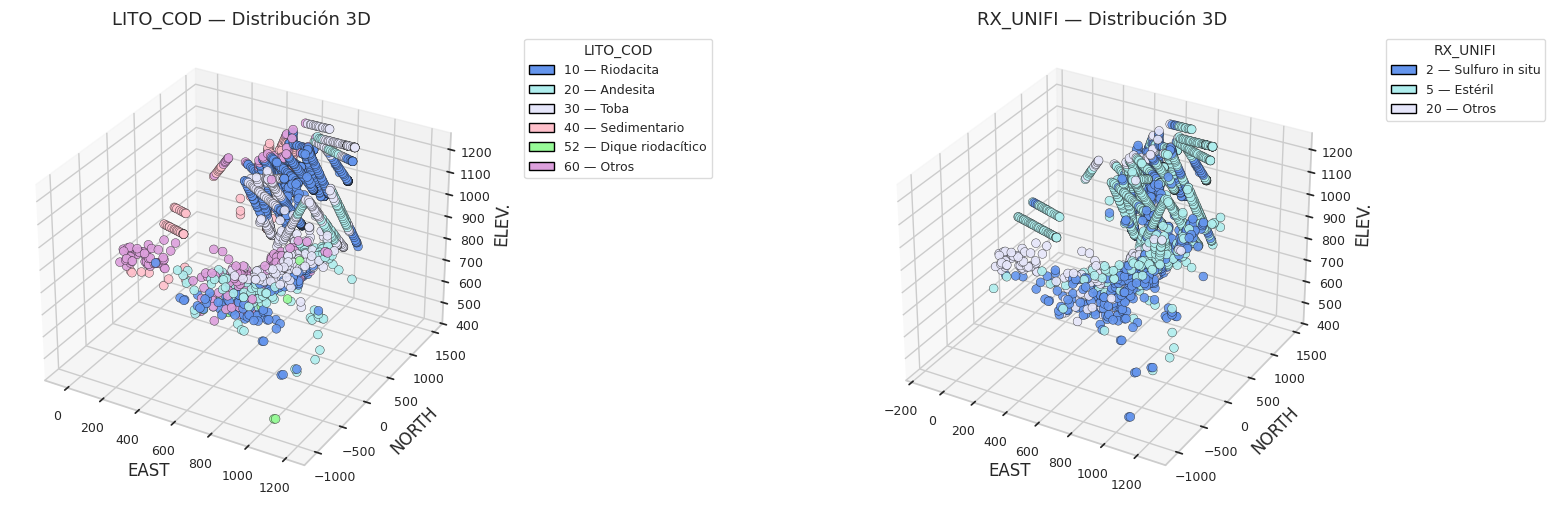

In [ ]:

# --------------------------
# Configuración
# --------------------------
coords = ["EAST", "NORTH", "ELEV."]
cat_cols = [c for c in ["LITO_COD", "RX_UNIFI"] if c in df_4.columns]

# Paleta discreta más contrastante
palette_disc = ["cornflowerblue", "paleturquoise", "lavender", "pink", "palegreen",
                "plum", "lightsalmon", "khaki", "lightcoral", "lightseagreen"]

# --------------------------
# Layout
# --------------------------
n = len(cat_cols)
fig = plt.figure(figsize=(20, 6))
plt.subplots_adjust(wspace=0.25, hspace=0.35)

for i, var in enumerate(cat_cols, start=1):
    d = df_4.dropna(subset=coords + [var]).copy()
    if d.empty:
        continue

    ax = fig.add_subplot(1, n, i, projection="3d")

    # Categorías
    codigos = pd.to_numeric(d[var], errors="coerce")
    cats = np.sort(codigos.dropna().unique())
    color_map = {c: palette_disc[idx % len(palette_disc)] for idx, c in enumerate(cats)}

    # Etiquetas de leyenda
    def cat_label(code):
        if var == "LITO_COD" and "LITO_DESC" in d.columns:
            desc = d.loc[codigos == code, "LITO_DESC"].dropna().unique()
            return f"{int(code)} — {desc[0]}" if len(desc) else f"{int(code)}"
        if var == "RX_UNIFI" and "RX_DESC" in d.columns:
            desc = d.loc[codigos == code, "RX_DESC"].dropna().unique()
            return f"{int(code)} — {desc[0]}" if len(desc) else f"{int(code)}"
        return str(code)

    # Colores y scatter
    point_colors = codigos.map(color_map)
    ax.scatter(d["EAST"], d["NORTH"], d["ELEV."],
               c=point_colors, s=40, alpha=0.9, edgecolor="k", linewidth=0.3)

    # Títulos y ejes
    ax.set_title(f"{var} — Distribución 3D", fontsize=13 )
    ax.set_xlabel("EAST")
    ax.set_ylabel("NORTH")
    ax.set_zlabel("ELEV.")
    ax.tick_params(labelsize=9)
    ax.grid(True, alpha=0.3)

    # Leyenda
    handles = [Patch(facecolor=color_map[c], edgecolor="black", label=cat_label(c)) for c in cats]
    ax.legend(handles=handles, title=var, loc="upper left",
              bbox_to_anchor=(1.1, 1), fontsize=9, title_fontsize=10,
              frameon=True, facecolor="white", framealpha=0.7)

plt.show()

## 3.8 Graficos de violín plots del consumo especifico de energía (CCE) y las variables categóricas: lito y RX.

Se realizarán gráficos de tipo violín para el consumo específico de energía y sus variables categóricas Lito y RX. Esto permitirá visualizar la distribución de datos, adicionalmente, como se graficarán dos categorías esto permitirá comparar la distribución entre ambas. Y finalmente, a partir de la densidad y forma, se puede detectar outliers y simetría.

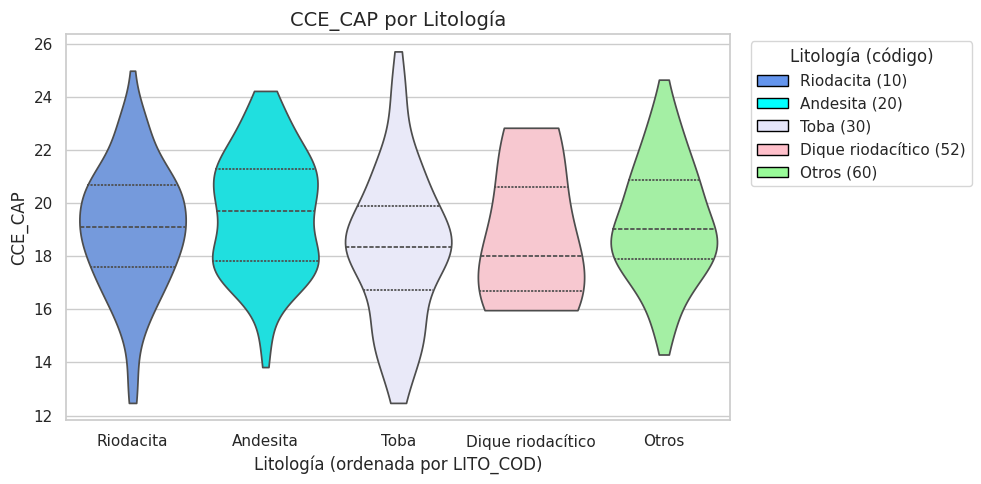

In [ ]:


sns.set_theme(style="whitegrid")

# Variables
cce_col   = "CCE_CAP" if "CCE_CAP" in df_4.columns else "CCE"
lito_cod  = "LITO_COD"
lito_desc = "LITO_DESC"

# =========================
# 1) CCE por LITOLOGÍA (ordenado por código)
# =========================
df_lito = df_4[[cce_col, lito_cod, lito_desc]].dropna().copy()

# Convertir código a numérico para ordenar
df_lito[lito_cod] = pd.to_numeric(df_lito[lito_cod], errors="coerce")

# Orden según el código
orden_codigos = sorted(df_lito[lito_cod].unique())
# Diccionario de código → descripción (en orden por código)
desc_por_codigo = dict(df_lito[[lito_cod, lito_desc]].drop_duplicates().values)
orden_desc = [desc_por_codigo[c] for c in orden_codigos]

# Colores en el orden de códigos
colores_base = ["cornflowerblue", "aqua", "lavender", "pink", "palegreen"]
colores = (colores_base * ((len(orden_desc) // len(colores_base)) + 1))[:len(orden_desc)]
palette_lito = dict(zip(orden_desc, colores))

# Gráfico
plt.figure(figsize=(10, 5))
ax = sns.violinplot(
    data=df_lito, x=lito_desc, y=cce_col,
    order=orden_desc, hue=lito_desc, palette=palette_lito,
    inner="quartile", cut=0, legend=False
)

ax.set_title(f"{cce_col} por Litología", fontsize=14)
ax.set_xlabel("Litología (ordenada por LITO_COD)")
ax.set_ylabel(cce_col)

# Leyenda personalizada (usando código y descripción)
handles = [Patch(facecolor=palette_lito[desc_por_codigo[c]], edgecolor="black",
                 label=f"{desc_por_codigo[c]} ({int(c)})")
           for c in orden_codigos]
ax.legend(handles=handles, title="Litología (código)", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:

# ===== Configuración de columnas =====
cce_col   = "CCE_CAP" if "CCE_CAP" in df_4.columns else "CCE"
lito_cod  = "LITO_COD"
lito_desc = "LITO_DESC"

# ===== Catálogo y orden por código =====
VALIDOS_LITO = {
    10: "Riodacita",
    20: "Andesita",
    30: "Toba",
    40: "Sedimentario",
    52: "Dique riodacítico",
    60: "Otros",
}
orden_codigos = list(VALIDOS_LITO.keys())

# Asegurar tipo numérico del código (preserva NaN)
df_4[lito_cod] = pd.to_numeric(df_4[lito_cod], errors="coerce")

# ===== Conteos por litología =====
# Total de filas por litología (incluye CCE nulo y no nulo)
conteo_total = (
    df_4.groupby(lito_cod).size()
       .reindex(orden_codigos)
       .fillna(0).astype(int)
)

# NaN en CCE por litología
conteo_nan = (
    df_4.groupby(lito_cod)[cce_col].apply(lambda s: s.isna().sum())
       .reindex(orden_codigos)
       .fillna(0).astype(int)
)

# No NaN en CCE (calculado como resta)
conteo_no_nan = (conteo_total - conteo_nan).astype(int)

# ===== Armar tabla final =====
tabla_lito = pd.DataFrame({
    "LITO_COD": orden_codigos,
    "LITO_DESC": [VALIDOS_LITO[c] for c in orden_codigos],
    "conteo_total": conteo_total.values,
    "conteo_NaN": conteo_nan.values,
    "conteo_no_NaN": conteo_no_nan.values,

})

print("\n=== CCE por Litología — conteos (orden catálogo) ===")
print(tabla_lito.to_string(index=False))

# ===== Agregar fila para litología NaN =====
fila_nan = {
    "LITO_COD": None,
    "LITO_DESC": "Sin litología (NaN)",
    "conteo_total": int(df_4[lito_cod].isna().sum()),
    "conteo_NaN": int(df_4.loc[df_4[lito_cod].isna(), cce_col].isna().sum()),
    "conteo_no_NaN": int(df_4.loc[df_4[lito_cod].isna(), cce_col].notna().sum()),

}
tabla_lito = pd.concat([tabla_lito, pd.DataFrame([fila_nan])], ignore_index=True)

print("\n=== Con fila adicional para LITO NaN ===")
print(tabla_lito.to_string(index=False))


=== CCE por Litología — conteos (orden catálogo) ===
 LITO_COD         LITO_DESC  conteo_total  conteo_NaN  conteo_no_NaN
       10         Riodacita           937         817            120
       20          Andesita           288         167            121
       30              Toba           506         408             98
       40      Sedimentario           244         244              0
       52 Dique riodacítico            12           6              6
       60             Otros           252         132            120

=== Con fila adicional para LITO NaN ===
LITO_COD           LITO_DESC  conteo_total  conteo_NaN  conteo_no_NaN
      10           Riodacita           937         817            120
      20            Andesita           288         167            121
      30                Toba           506         408             98
      40        Sedimentario           244         244              0
      52   Dique riodacítico            12           6              6
 

Se observa una desproporción en donde se tiene una litología con 12 datos totales considerando NaN presentes, a diferencias de las otras categorías con 3 unidades de magnitud. Por otro lado tambien se aprecia una gran cantidad de datos NaN en donde llegan a igualarse las litologias cercanas a los 120 datos y en el caso de la Toba a 98 datos, mientras que Dique sigue con 6 datos sugiriendo no considerarse dentro del análisis dicha categoría

/tmp/ipython-input-2342692628.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


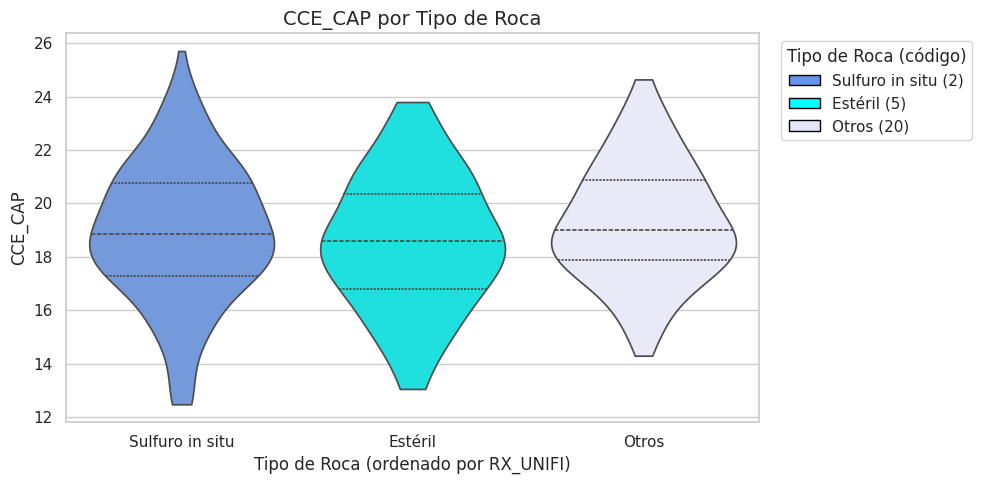

In [ ]:
sns.set_theme(style="whitegrid")


# --- Variables ---
cce_col  = "CCE_CAP" if "CCE_CAP" in df_4.columns else "CCE"
RX_cod   = "RX_UNIFI"
RX_desc  = "RX_DESC"

# --- Base para conteos y mapeo código->desc (sin filtrar aún) ---
base_rx = df_4[[cce_col, RX_cod, RX_desc]].copy()


# --- Datos para el gráfico: requiere CCE, código y desc válidos ---
df_RX = base_rx.dropna(subset=[cce_col, RX_cod, RX_desc]).copy()

# Asegurar código numérico (para ordenar)
df_RX[RX_cod] = pd.to_numeric(df_RX[RX_cod], errors="coerce")

# Orden por código
orden_codigos = sorted(df_RX[RX_cod].unique())

# Mapa código -> descripción (si hay duplicados de desc por código, toma el primero)
desc_por_codigo = (
    df_RX.dropna(subset=[RX_cod, RX_desc])
         .drop_duplicates(subset=[RX_cod])
         .set_index(RX_cod)[RX_desc]
         .to_dict()
)

# Orden de etiquetas (descripciones) alineado a los códigos ordenados
orden_desc = [desc_por_codigo[c] for c in orden_codigos if c in desc_por_codigo]

# --- Paleta por categoría (desc) ---
colores_base = ["cornflowerblue", "aqua", "lavender", "pink", "palegreen", "thistle"]
colores = (colores_base * ((len(orden_desc) // len(colores_base)) + 1))[:len(orden_desc)]
palette_RX = dict(zip(orden_desc, colores))

# --- Gráfico (SIN hue; palette mapea x=RX_DESC directamente) ---
plt.figure(figsize=(10, 5))
ax = sns.violinplot(
    data=df_RX, x=RX_desc, y=cce_col,
    order=orden_desc,
    palette=palette_RX,      # <- usar la paleta correcta
    inner="quartile", cut=0
)

ax.set_title(f"{cce_col} por Tipo de Roca", fontsize=14)
ax.set_xlabel("Tipo de Roca (ordenado por RX_UNIFI)")
ax.set_ylabel(cce_col)

# Leyenda personalizada código + descripción
handles = [Patch(facecolor=palette_RX[desc_por_codigo[c]], edgecolor="black",
                 label=f"{desc_por_codigo[c]} ({int(c)})")
           for c in orden_codigos if c in desc_por_codigo]
ax.legend(handles=handles, title="Tipo de Roca (código)",
          bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

plt.tight_layout()
plt.show()

In [ ]:

# ===== Configuración de columnas =====
cce_col   = "CCE_CAP" if "CCE_CAP" in df_4.columns else "CCE"
RX_cod  = "RX_UNIFI"
RX_desc = "RX_DESC"

# ===== Catálogo y orden por código =====
VALIDOS_RX = {
    2: "Sulfuro in situ",
    5: "Estéril",
    20:"Otros",
}
orden_codigos = list(VALIDOS_RX.keys())

# Asegurar tipo numérico del código (preserva NaN)
df_4[RX_cod] = pd.to_numeric(df_4[RX_cod], errors="coerce")

# ===== Conteos por Tipo de roca =====
# Total de filas por tipo de roca (incluye CCE nulo y no nulo)
conteo_total = (
    df_4.groupby(RX_cod).size()
       .reindex(orden_codigos)
       .fillna(0).astype(int)
)

# NaN en CCE por tipo de roca
conteo_nan = (
    df_4.groupby(RX_cod)[cce_col].apply(lambda s: s.isna().sum())
       .reindex(orden_codigos)
       .fillna(0).astype(int)
)

# No NaN en CCE (calculado como resta)
conteo_no_nan = (conteo_total - conteo_nan).astype(int)

# ===== Armar tabla final =====
tabla_RX = pd.DataFrame({
    "RX_UNIFI": orden_codigos,
    "RX_DESC": [VALIDOS_RX[c] for c in orden_codigos],
    "conteo_total": conteo_total.values,
    "conteo_NaN": conteo_nan.values,
    "conteo_no_NaN": conteo_no_nan.values,

})

print("\n=== CCE por Tipo de roca — conteos (orden catálogo) ===")
print(tabla_RX.to_string(index=False))

# ===== Agregar fila para litología NaN =====
fila_nan = {
    "RX_UNIFI": None,
    "RX_DESC": "Sin litología (NaN)",
    "conteo_total": int(df_4[RX_cod].isna().sum()),
    "conteo_NaN": int(df_4.loc[df_4[RX_cod].isna(), cce_col].isna().sum()),
    "conteo_no_NaN": int(df_4.loc[df_4[RX_cod].isna(), cce_col].notna().sum()),

}
tabla_RX = pd.concat([tabla_RX, pd.DataFrame([fila_nan])], ignore_index=True)

print("\n=== Con fila adicional para RX NaN ===")
print(tabla_RX.to_string(index=False))


=== CCE por Tipo de roca — conteos (orden catálogo) ===
 RX_UNIFI         RX_DESC  conteo_total  conteo_NaN  conteo_no_NaN
        2 Sulfuro in situ          1045         745            300
        5         Estéril          1097        1018             79
       20           Otros           252         132            120

=== Con fila adicional para RX NaN ===
RX_UNIFI             RX_DESC  conteo_total  conteo_NaN  conteo_no_NaN
       2     Sulfuro in situ          1045         745            300
       5             Estéril          1097        1018             79
      20               Otros           252         132            120
    None Sin litología (NaN)           344         343              1


Tanto sulfuro como Estéril posen la misma cantidad de datos totales, sin embargo se aprecia más valores Na para los estériles entregando una desproporción en los datos totales, lo que sugiere una posible imputación de la data para tener las categorías balanceadas en tamaño de la muestra


# 4 Análisis de consumo de energía


## 4.1 Estudiar los sectores donde es posible que el proceso de molienda requiera mayor consumo energetico. Para esto considere la siguiente sección:



Tomando en cuenta que:

*   **Alto consumo energético** si CCE > 18 KWh/t
*   **Bajo consumo energético** en el caso contrario



In [ ]:

# Define el umbral para el alto consumo energético en kWh/t
cce_threshold = 18

# Categoriza el consumo energético basado en la columna 'CCE_CAP'
# Si CCE_CAP es mayor que el umbral, se asigna 'High'
# Si CCE_CAP es menor o igual que el umbral, se asigna 'Low'
# Si CCE_CAP es NaN, se asigna NaN (sin información de consumo)
df_4['ENERGY_CONSUMPTION'] = df_4['CCE_CAP'].apply(lambda x: 'High' if x > cce_threshold else ('Low' if x <= cce_threshold else np.nan))

# Cuenta la cantidad de sectores en cada categoría de consumo energético (incluyendo NaN)
energy_consumption_counts = df_4['ENERGY_CONSUMPTION'].value_counts(dropna=False)

# Imprime el conteo de sectores por nivel de consumo energético
print("Cantidad de sectores por nivel de consumo energético:")
print(energy_consumption_counts)

Cantidad de sectores por nivel de consumo energético:
ENERGY_CONSUMPTION
NaN     2238
High     323
Low      177
Name: count, dtype: int64


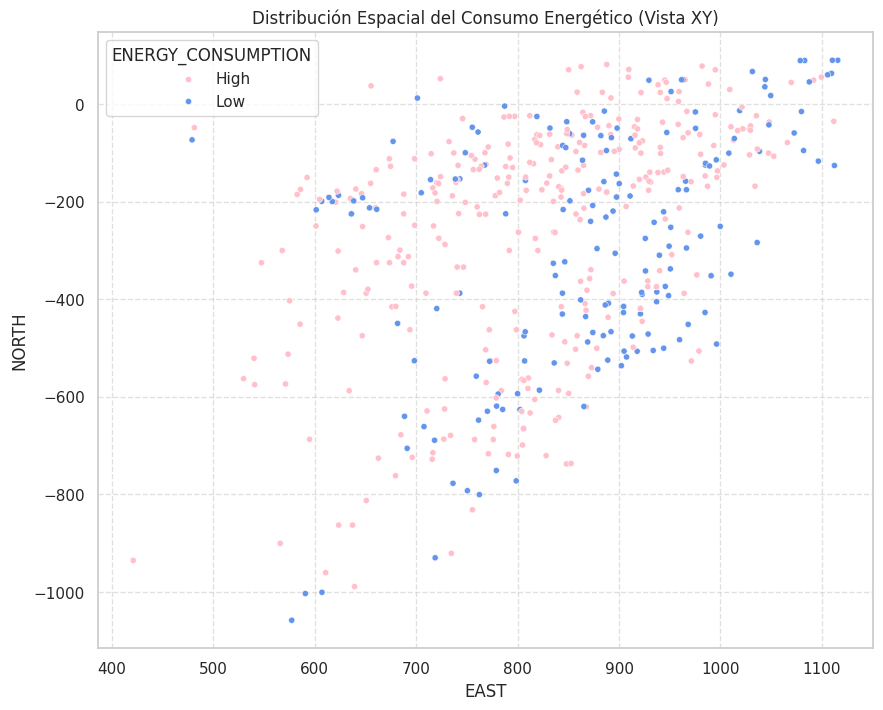

In [ ]:
# Visualiza la distribución espacial de los niveles de consumo energético en 2D (Vista XY)
plt.figure(figsize=(10, 8))
# Utiliza solo las filas donde hay datos de EAST, NORTH y ENERGY_CONSUMPTION
sns.scatterplot(data=df_4.dropna(subset=['EAST', 'NORTH', 'ENERGY_CONSUMPTION']),
                x='EAST', y='NORTH',
                hue='ENERGY_CONSUMPTION', # Colorea los puntos según el nivel de consumo
                palette={'High': 'pink', 'Low': 'cornflowerblue'}, # Define los colores para 'High' y 'Low'
                s=20) # Tamaño de los puntos
plt.title('Distribución Espacial del Consumo Energético (Vista XY)')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.grid(True, linestyle='--', alpha=0.6) # Añade una grilla para mejor referencia espacial
plt.show() # Muestra el gráfico

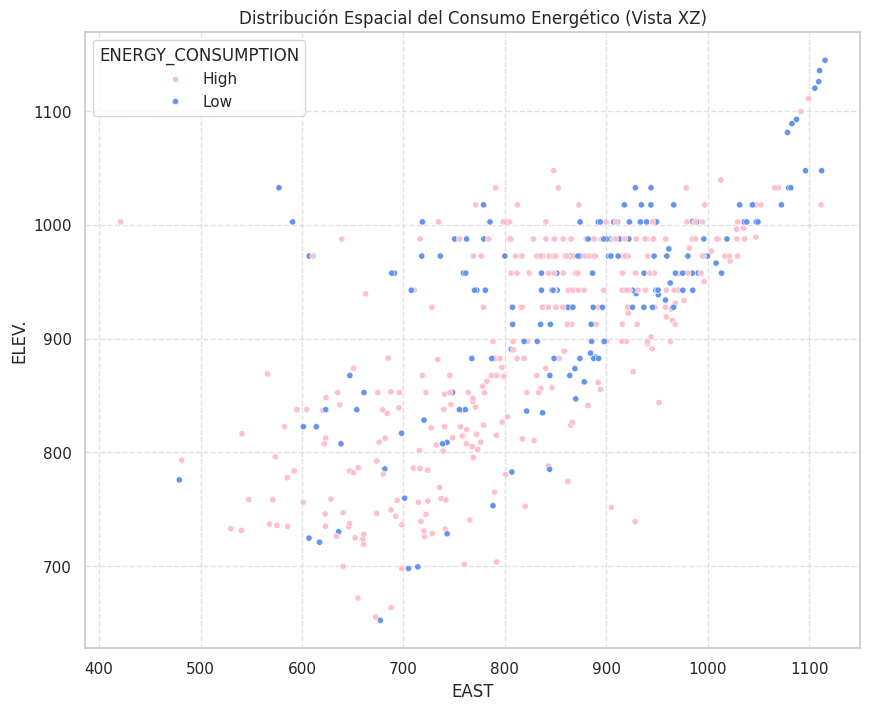

In [ ]:
# Visualiza la distribución espacial de los niveles de consumo energético en 2D (Vista XZ)
plt.figure(figsize=(10, 8))
# Utiliza solo las filas donde hay datos de EAST, ELEV. y ENERGY_CONSUMPTION
sns.scatterplot(data=df_4.dropna(subset=['EAST', 'ELEV.', 'ENERGY_CONSUMPTION']),
                x='EAST', y='ELEV.',
                hue='ENERGY_CONSUMPTION', # Colorea los puntos según el nivel de consumo
                palette={'High': 'pink', 'Low': 'cornflowerblue'}, # Define los colores para 'High' y 'Low'
                s=20) # Tamaño de los puntos
plt.title('Distribución Espacial del Consumo Energético (Vista XZ)')
plt.xlabel('EAST')
plt.ylabel('ELEV.')
plt.grid(True, linestyle='--', alpha=0.6) # Añade una grilla para mejor referencia espacial
plt.show() # Muestra el gráfico

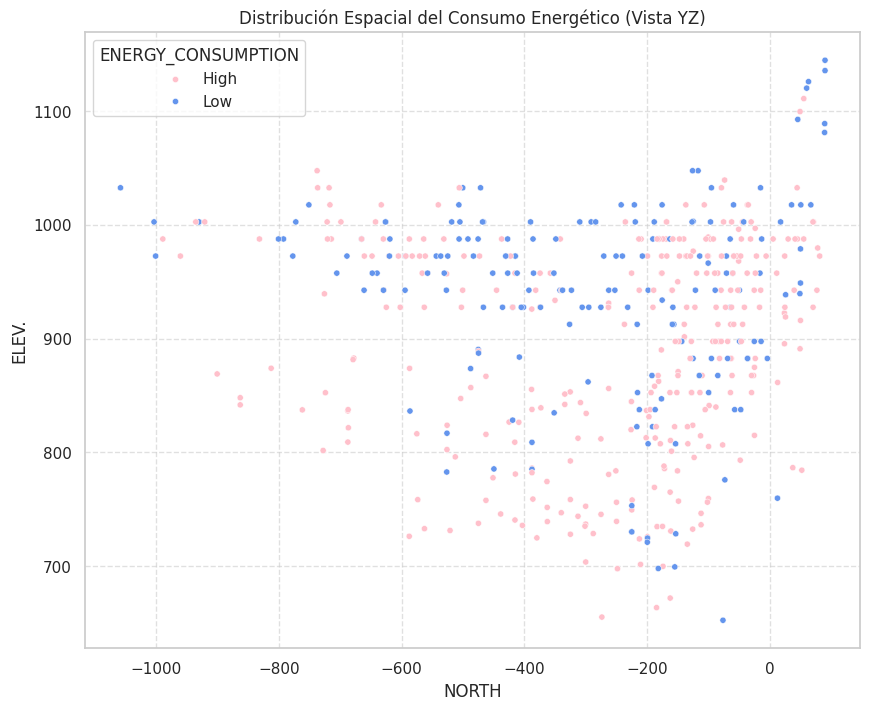

In [ ]:
# Visualiza la distribución espacial de los niveles de consumo energético en 2D (Vista YZ)
plt.figure(figsize=(10, 8))
# Utiliza solo las filas donde hay datos de NORTH, ELEV. y ENERGY_CONSUMPTION
sns.scatterplot(data=df_4.dropna(subset=['NORTH', 'ELEV.', 'ENERGY_CONSUMPTION']),
                x='NORTH', y='ELEV.',
                hue='ENERGY_CONSUMPTION', # Colorea los puntos según el nivel de consumo
                palette={'High': 'pink', 'Low': 'cornflowerblue'}, # Define los colores para 'High' y 'Low'
                s=20) # Tamaño de los puntos
plt.title('Distribución Espacial del Consumo Energético (Vista YZ)')
plt.xlabel('NORTH')
plt.ylabel('ELEV.')
plt.grid(True, linestyle='--', alpha=0.6) # Añade una grilla para mejor referencia espacial
plt.show() # Muestra el gráfico

## 4.2 Análisis

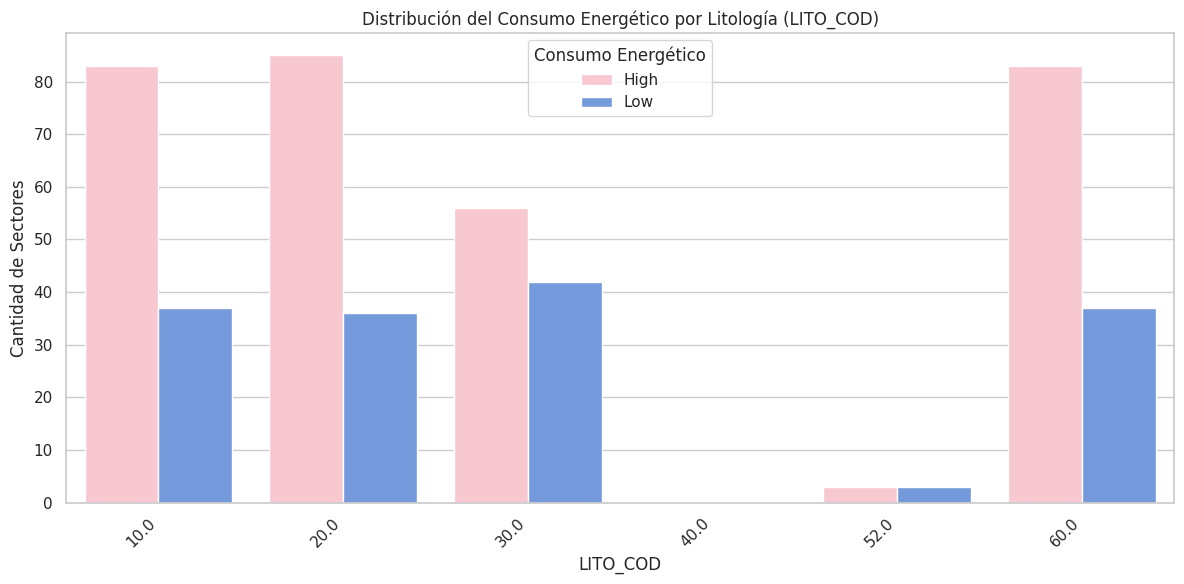

In [ ]:

# Análisis de la relación entre LITO_COD y ENERGY_CONSUMPTION
plt.figure(figsize=(12, 6))
sns.countplot(data=df_4, x='LITO_COD', hue='ENERGY_CONSUMPTION', palette={'High': 'pink', 'Low': 'cornflowerblue'}, dodge=True)
plt.title('Distribución del Consumo Energético por Litología (LITO_COD)')
plt.xlabel('LITO_COD')
plt.ylabel('Cantidad de Sectores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Consumo Energético')
plt.tight_layout()
plt.show()



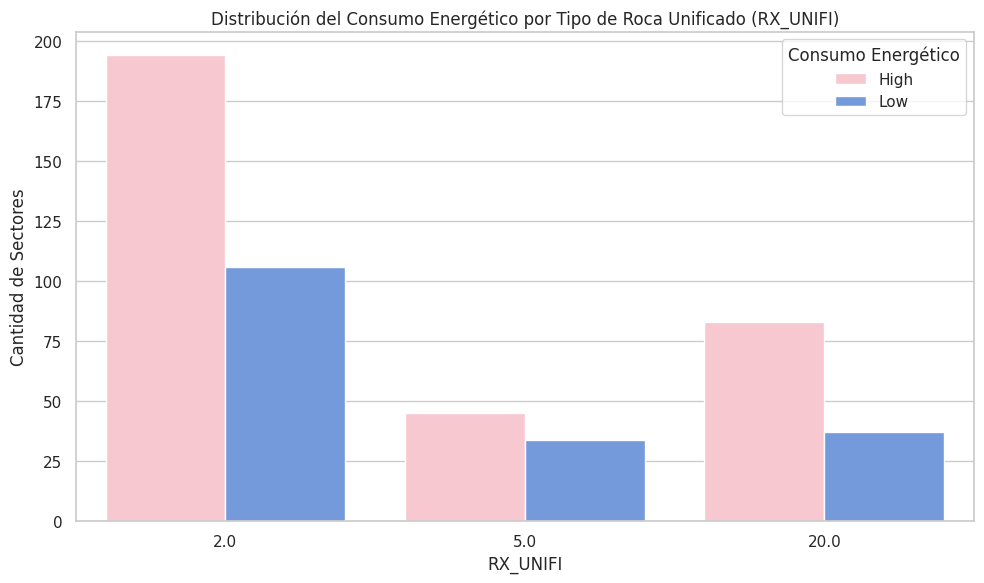

In [ ]:

# Análisis de la relación entre RX_UNIFI y ENERGY_CONSUMPTION
plt.figure(figsize=(10, 6))
sns.countplot(data=df_4, x='RX_UNIFI', hue='ENERGY_CONSUMPTION', palette={'High': 'pink', 'Low': 'cornflowerblue'}, dodge=True)
plt.title('Distribución del Consumo Energético por Tipo de Roca Unificado (RX_UNIFI)')
plt.xlabel('RX_UNIFI')
plt.ylabel('Cantidad de Sectores')
plt.legend(title='Consumo Energético')
plt.tight_layout()
plt.show()

**Conclusión:** Se observa que el mayor Consumo energetico esta asociado a los sulfuros con potencial destino a chancado, mientras que el menor se concentra en la categoría otros (20) y esteril (diques posiblemente). Esto podría asociarse que minerales sulfurados presentan alteraciaciones silicias lo que les entrega mayor dureza, mientras que el resto, se asocia a alteraciones pervasivas dejando una roca obliterada, es decir, menos compacta (baja resistencia).

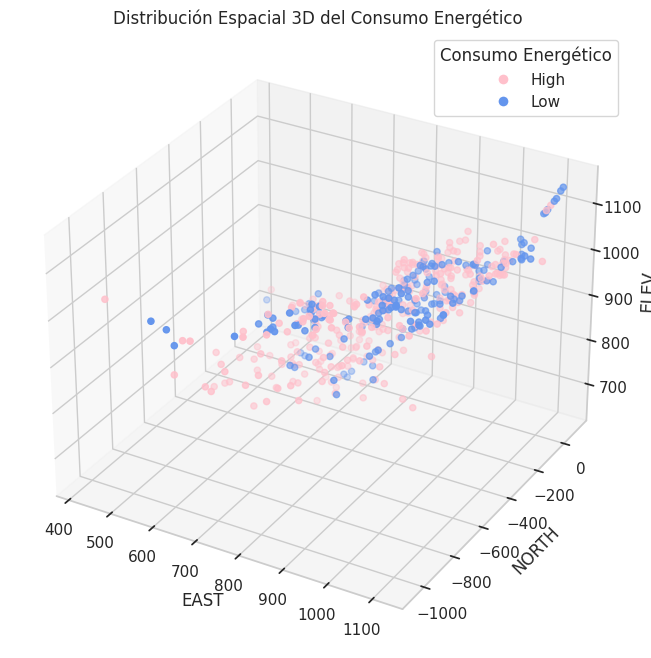

In [ ]:


# Asegurarse de que df_4 existe y contiene las columnas necesarias
if 'df_4' not in globals():
    raise NameError("DataFrame 'df_4' no encontrado. Por favor, ejecute las celdas anteriores.")

# Definir las columnas de coordenadas y la columna de clasificación de energía
coords = ["EAST", "NORTH", "ELEV."]
energy_col = "ENERGY_CONSUMPTION"

# Asegurarse de que las columnas necesarias existen en df_4
if not all(c in df_4.columns for c in coords + [energy_col]):
    missing = [c for c in coords + [energy_col] if c not in df_4.columns]
    raise ValueError(f"Columnas faltantes en df_4: {missing}")

# Eliminar filas con valores NaN en las columnas relevantes para la visualización 3D
df_plot = df_4.dropna(subset=coords + [energy_col]).copy()

if df_plot.empty:
    print("No hay datos suficientes (o con valores no nulos) para generar el gráfico 3D.")
else:
    # Crear la figura y el eje 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Definir la paleta de colores
    palette = {'High': 'pink', 'Low': 'cornflowerblue'}

    # Obtener los valores de color para cada punto basado en la clasificación de energía
    colors = df_plot[energy_col].map(palette)

    # Generar el gráfico de dispersión 3D
    scatter = ax.scatter(df_plot['EAST'], df_plot['NORTH'], df_plot['ELEV.'], c=colors, s=20)

    # Configurar etiquetas y título
    ax.set_xlabel('EAST')
    ax.set_ylabel('NORTH')
    ax.set_zlabel('ELEV.')
    ax.set_title('Distribución Espacial 3D del Consumo Energético')

    # Crear una leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', label='High',
                          markerfacecolor=palette['High'], markersize=8),
               plt.Line2D([0], [0], marker='o', color='w', label='Low',
                          markerfacecolor=palette['Low'], markersize=8)]
    ax.legend(handles=handles, title='Consumo Energético')

    plt.show()

In [ ]:
# Define elevation bins (intervals of 100 meters)
# Use the minimum and maximum elevation from the DataFrame
elevation_bins = range(int(df_4['ELEV.'].min()), int(df_4['ELEV.'].max()) + 100, 100)

# Categorize elevation data into bins
df_4['ELEV_BIN'] = pd.cut(df_4['ELEV.'], bins=elevation_bins, right=False, include_lowest=True)

# Group by elevation bin and energy consumption level, then count
elevation_energy_counts = df_4.groupby(['ELEV_BIN', 'ENERGY_CONSUMPTION']).size().unstack(fill_value=0)

# Print the resulting table
print("Cantidad de sectores por nivel de consumo energético y elevación:")
display(elevation_energy_counts)

Cantidad de sectores por nivel de consumo energético y elevación:


/tmp/ipython-input-1499665026.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elevation_energy_counts = df_4.groupby(['ELEV_BIN', 'ENERGY_CONSUMPTION']).size().unstack(fill_value=0)


ENERGY_CONSUMPTION  High  Low
ELEV_BIN                     
[455, 555)             0    0
[555, 655)             0    1
[655, 755)            36    8
[755, 855)            83   21
[855, 955)            89   53
[955, 1055)          113   87
[1055, 1155)           2    7
[1155, 1255)           0    0

**Conclusiones:**
1. ⁠Respecto a la distribución de consumo energético se tiene que hay presencia de mas datos los cuales tienen un consumo energético alto (> 18 KWh/t). Este al ser analizado en las variables LITO y RX, podemos mencionar que para las litologías Riodacita (10), Andesita (20) y Otros (60) existe mayor consumo energético y cuando analizamos la variable RX, podemos notar como para rocas con valor económico (sulfuro insitu) tambien se presenta mayor consumo energético. Esto esta directamente relacionado con el tener una roca de calidad mas alta se necesitara mas energía para su procesamiento.
2. ⁠Al analizar la distribución espacial del consumo energético podemos visualizar tanto en la figura del levantamiento tridimensional como en la tabla que a medida que nos acercamos mas a la superficie (elevación aumenta) el consumo energético es menor y a mayor profundidad ocurre lo contrario, el consumo energético es mayor. Esto puede estar relacionado directamente con la calidad de roca esperada tanto en superficie como en profundidad, a mayor profundidad la roca tiende a estar mas meteorizada e intacta, por lo que es más dura y resistente, lo que necesitara un mayor consumo energético, y en superficie la roca tiende a ser mas blanda o estar mas fracturada por lo que aqui se necesita menor consumo energético.

# 5 Imputación de datos


A continuación se describe el proceso de imputación los datos faltantes de las variables continuas (missing values: NaN) correspondientes a las variables SGI, AXB, BWI
mediante técnicas espaciales. Se mantienen las variables originales (sin imputar) y se creean nuevas columnas. La variable CCE se estima a partir de la relación otorgada en el proyecto con la variable SGI imputada.



## 5.1 Análisis de estadística descriptiva

In [ ]:
def resumen_estadistico(df):
    resumen = pd.DataFrame({
        "total_datos": len(df),
        "no_nulos": df.notna().sum(),
        "nulos": df.isna().sum()
    })

    # Solo para columnas numéricas, agregar estadísticos
    desc = df.describe(include=[np.number]).T
    resumen = resumen.merge(desc, left_index=True, right_index=True, how="left")

    return resumen

# uso con df_4
resumen_df = resumen_estadistico(df_4)
print(resumen_df)

                    total_datos  no_nulos  nulos   count         mean  \
REF                        2738      2738      0  2738.0  1370.384222   
EAST                       2738      2738      0  2738.0   683.036633   
NORTH                      2738      2738      0  2738.0   547.340029   
ELEV.                      2738      2738      0  2738.0   990.740029   
LITO_COD                   2738      2239    499  2239.0    24.928093   
LITO_DESC                  2738      2239    499     NaN          NaN   
RX_DESC                    2738      2394    344     NaN          NaN   
RX_UNIFI                   2738      2394    344  2394.0     5.269424   
SGI_CAP                    2738       500   2238   500.0   128.196000   
AXB_CAP                    2738       176   2562   176.0    35.251946   
BWI_CAP                    2738       227   2511   227.0    20.626511   
CCE_CAP                    2738       500   2238   500.0    18.955663   
ENERGY_CONSUMPTION         2738       500   2238   

In [ ]:
# Valores faltantes por columna (conteo y porcentaje)
print("\n--- Valores faltantes por columna ---")
for col in df_4.columns:
    n_missing = df_4[col].isnull().sum()           # cantidad de NaN
    pct_missing = df_4[col].isnull().mean() * 100  # porcentaje de NaN
    print(f"La columna \'{col:<5}' tiene {n_missing} datos faltantes ({pct_missing:.2f}%)")


--- Valores faltantes por columna ---
La columna 'REF  ' tiene 0 datos faltantes (0.00%)
La columna 'EAST ' tiene 0 datos faltantes (0.00%)
La columna 'NORTH' tiene 0 datos faltantes (0.00%)
La columna 'ELEV.' tiene 0 datos faltantes (0.00%)
La columna 'LITO_COD' tiene 499 datos faltantes (18.22%)
La columna 'LITO_DESC' tiene 499 datos faltantes (18.22%)
La columna 'RX_DESC' tiene 344 datos faltantes (12.56%)
La columna 'RX_UNIFI' tiene 344 datos faltantes (12.56%)
La columna 'SGI_CAP' tiene 2238 datos faltantes (81.74%)
La columna 'AXB_CAP' tiene 2562 datos faltantes (93.57%)
La columna 'BWI_CAP' tiene 2511 datos faltantes (91.71%)
La columna 'CCE_CAP' tiene 2238 datos faltantes (81.74%)
La columna 'ENERGY_CONSUMPTION' tiene 2238 datos faltantes (81.74%)
La columna 'ELEV_BIN' tiene 0 datos faltantes (0.00%)


In [ ]:


# Columnas de coordenadas tal como están en tu DataFrame
coords = ["EAST", "NORTH", "ELEV."]

# Crear un diccionario para guardar resultados
dominios = {}

for col in coords:
    if col in df_4.columns:
        minimo = df_4[col].min()
        maximo = df_4[col].max()
        rango = maximo - minimo
        mitad = rango / 2

        dominios[col] = {
            "Mínimo": minimo,
            "Máximo": maximo,
            "Dominio": rango,
            "Mitad dominio": mitad
        }

# Mostrar resultados en forma de DataFrame
dominios_df = pd.DataFrame(dominios).T
print(dominios_df)

        Mínimo   Máximo  Dominio  Mitad dominio
EAST   -135.20  1267.70   1402.9         701.45
NORTH -1057.95  1500.95   2558.9        1279.45
ELEV.   455.00  1231.20    776.2         388.10


## 5.2 Decisión de Imputación - kNN

Para abordar el problema de valores faltantes en la base de datos, el equipo decidió implementar un método de imputación por k-Nearest Neighbors (kNN). Esta decisión se fundamenta en varias consideraciones técnicas y estratégicas:

1. Magnitud de los datos faltantes:
Aproximadamente un 80% de los registros presentan valores faltantes en variables críticas. Esto implica que, si se eliminaran directamente las filas incompletas, se perdería gran parte de la información disponible. Por ello, es necesario un método de imputación robusto que aproveche los datos existentes para reconstruir los valores ausentes.

2. Razonamiento detrás del kNN:
El método de kNN estima los valores faltantes considerando la similitud entre registros. Cada dato faltante se reemplaza utilizando la información de sus "vecinos" más cercanos en el espacio multidimensional de variables. Esto permite preservar la estructura de los datos y aprovechar relaciones implícitas entre las variables.

3. Propagación de errores:
Si bien la imputación por kNN ofrece ventajas, también implica riesgos. Dado que más del 80% de los valores de algunas variables serán estimados, cualquier error en la imputación puede propagarse y afectar los análisis posteriores. Esta propagación se amplifica al considerar que los datos imputados se utilizarán en modelos de machine learning en el Hito 2, lo que puede sesgar las predicciones o reducir la capacidad de generalización del modelo. Por ello, será esencial validar la consistencia estadística de los valores imputados y monitorear su impacto en los resultados.

Esta decisión es respaldada por Choudhury y Kosorok (2020), en donde demuestran que la imputación de datos mediante kNN es ampliamente utilizada en problemas de clasificación, mostrando mejoras frente a otros métodos como MICE o missForest, especialmente en escenarios con alta proporción de datos faltantes y heterogeneidad en las variables.

Fuente: Choudhury, A., & Kosorok, M. R. (2020). Missing Data Imputation for Classification Problems. arXiv preprint arXiv:2002.10709. https://arxiv.org/abs/2002.10709

Para la imputación, se aplicó un proceso de escalamiento de variables mediante el método MinMax Scaler. Esta decisión se fundamenta en la amplia diferencia de magnitudes entre las variables, que van desde coordenadas espaciales en el orden de miles hasta índices energéticos y categóricos de baja escala. Sin este ajuste, las variables con valores más grandes dominarían los análisis posteriores (particularmente en algoritmos de aprendizaje automático y en la construcción de modelos geoestadísticos). Al escalar los datos a un rango común, se asegura la comparabilidad, se mejora la estabilidad numérica de los cálculos y se evita la propagación de sesgos derivados de diferencias de órdenes de magnitud.

### Ventajas y Desventajas kNN



Ventajas kNN


* Preserva relaciones no lineales entre variables.
* No asume distribución estadística previa (es un método no paramétrico).
* Aprovecha la información multivariable disponible.
* Suele ser más realista que imputar con medias o medianas, las cuales no aportan data de calidad al momento de realizar nuevos modelos en los próximos hitos.


Desventajas de kNN:

* Requiere alto costo computacional, especialmente con bases de gran tamaño.
* Sensible a la elección del valor de k y a la métrica de distancia utilizada.
* Puede generar suavización excesiva de los datos, reduciendo la varianza.
* Existe riesgo de introducir sesgos sistemáticos si la distribución de datos vecinos no es representativa.

### 5.2.1 Imputación de Variable SGI_CAP con k-NN

Se procederá a imputar los datos faltantes (NaN) en la columna `SGI_CAP` utilizando el método de los k-Vecinos Más Cercanos (k-NN). Este algoritmo imputa los valores faltantes de un punto basándose en la media (o mediana) de los $k$ puntos más cercanos a él en el espacio multidimensional definido por las variables disponibles.

Los pasos a seguir serán:

1.  **Identificar la columna objetivo:** Confirmar que `SGI_CAP` es la columna con valores faltantes a imputar.
2.  **Seleccionar las columnas a utilizar para la imputación:** Se utilizarán las columnas de coordenadas espaciales (`EAST`, `NORTH`, `ELEV.`) como características para encontrar los vecinos más cercanos.
3.  **Dividir el dataset:** Separar el DataFrame en dos subconjuntos: uno con los datos `SGI_CAP` observados (no nulos) y otro con los datos `SGI_CAP` faltantes.
4.  **Aplicar el imputador k-NN:** Utilizar una implementación del algoritmo k-NN (por ejemplo, desde scikit-learn) sobre el subconjunto con valores faltantes, usando los datos observados como referencia.
5.  **Combinar los datos:** Integrar los valores imputados de vuelta al DataFrame original.
6.  **Verificar la imputación:** Contar los valores no nulos en la columna `SGI_CAP` después de la imputación y comparar estadísticas descriptivas si es relevante.

Este proceso se aplica a las demás variables continuas a imputar. A continuación, se realizará el conteo de los valores faltantes en `SGI_CAP` antes de la imputación.

In [ ]:


# Asegurarse de que df_4 existe y contiene las columnas necesarias
if 'df_4' not in globals():
    raise NameError("DataFrame 'df_4' no encontrado. Por favor, ejecute las celdas anteriores.")

# Columnas de coordenadas y la columna a imputar
coords = ["EAST", "NORTH", "ELEV."]
impute_col = "SGI_CAP"

# Asegurarse de que las columnas necesarias existen en df_4
if not all(c in df_4.columns for c in coords + [impute_col]):
    missing = [c for c in coords + [impute_col] if c not in df_4.columns]
    raise ValueError(f"Columnas faltantes en df_4: {missing}")

# Contar valores faltantes antes de la imputación
n_missing_before = df_4[impute_col].isna().sum()
print(f"Cantidad de valores faltantes en '{impute_col}' antes de la imputación: {n_missing_before}")

# Preparar los datos para el imputador k-NN
# Usaremos las coordenadas para encontrar vecinos
data_for_imputation = df_4[coords + [impute_col]].copy()

# Escalamos los datos para que las distancias se calculen correctamente
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_imputation)
data_scaled_df = pd.DataFrame(data_scaled, columns=coords + [impute_col], index=df_4.index)

# Aplicar KNNImputer
# n_neighbors: Número de vecinos a considerar. Se puede ajustar.
# weights: 'uniform' (media simple) o 'distance' (media ponderada por distancia)
# metric: Métrica de distancia ('nan_euclidean' maneja NaNs)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean') # puedes ajustar n_neighbors

# Ajustar y transformar (imputar) los datos escalados
data_imputed_scaled = imputer.fit_transform(data_scaled_df)
data_imputed_scaled_df = pd.DataFrame(data_imputed_scaled, columns=coords + [impute_col], index=df_4.index)

# Invertir el escalado para obtener los valores imputados en la escala original
data_imputed_original_scale = scaler.inverse_transform(data_imputed_scaled_df)
data_imputed_original_scale_df = pd.DataFrame(data_imputed_original_scale, columns=coords + [impute_col], index=df_4.index)

# Crear una nueva columna en df_4 para los datos imputados de SGI_CAP
# Mantenemos la columna original SGI_CAP y añadimos la imputada
df_4['SGI_CAP_KNN_IMPUTED'] = data_imputed_original_scale_df[impute_col]

# Contar valores faltantes después de la imputación
n_missing_after = df_4['SGI_CAP_KNN_IMPUTED'].isna().sum()
print(f"Cantidad de valores faltantes en 'SGI_CAP_KNN_IMPUTED' después de la imputación: {n_missing_after}")

# Mostrar las primeras filas para verificar la nueva columna
print("\nDataFrame con la nueva columna imputada:")
display(df_4.head())

Cantidad de valores faltantes en 'SGI_CAP' antes de la imputación: 2238
Cantidad de valores faltantes en 'SGI_CAP_KNN_IMPUTED' después de la imputación: 0

DataFrame con la nueva columna imputada:


REF    EAST   NORTH   ELEV.  LITO_COD  LITO_DESC          RX_DESC  \
0    1  1015.6  -95.15   958.2      10.0  Riodacita          Estéril   
1    2  1024.8  -95.35  1032.7       NaN        NaN          Estéril   
2    3   979.6 -274.55   906.4      10.0  Riodacita  Sulfuro in situ   
3    4   995.2 -112.05   931.0      10.0  Riodacita  Sulfuro in situ   
4    5   984.7 -125.35   924.3      10.0  Riodacita  Sulfuro in situ   

   RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP ENERGY_CONSUMPTION  \
0       5.0      NaN      NaN   22.100      NaN                NaN   
1       5.0      NaN      NaN   20.736      NaN                NaN   
2       2.0      NaN      NaN   21.161      NaN                NaN   
3       2.0      NaN      NaN   20.015      NaN                NaN   
4       2.0      NaN      NaN   20.028      NaN                NaN   

      ELEV_BIN  SGI_CAP_KNN_IMPUTED  
0  [955, 1055)                122.8  
1  [955, 1055)                147.2  
2   [855, 955)                122.0  
3   [855, 955)                119.2  
4   [855, 955)                137.6


=== Estadísticos descriptivos: original vs imputado (k-NN) ===
estadístico  SGI_CAP (original)  SGI_CAP_KNN_IMPUTED (k-NN)
    n_total         2738.000000                 2738.000000
    n_noNaN          500.000000                 2738.000000
      n_NaN         2238.000000                    0.000000
        min           49.000000                   49.000000
        p25          109.000000                  125.000000
     median          125.000000                  143.800000
       mean          128.196000                  138.476552
        p75          149.000000                  157.600000
        max          209.000000                  209.000000
        std           29.837126                   24.562520
        var          890.254092                  603.317367

=== Cambios relativos (imputado vs original) ===
Δ media    = 8.019%  (respecto a la media original)
Δ varianza = -32.231%   (respecto a la var. original)


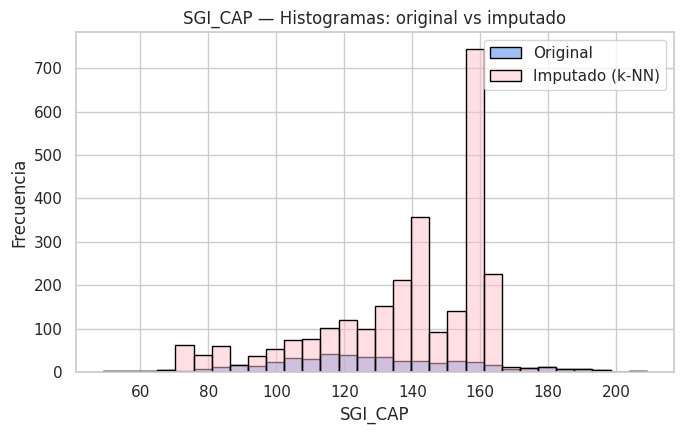

/tmp/ipython-input-1563748014.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,


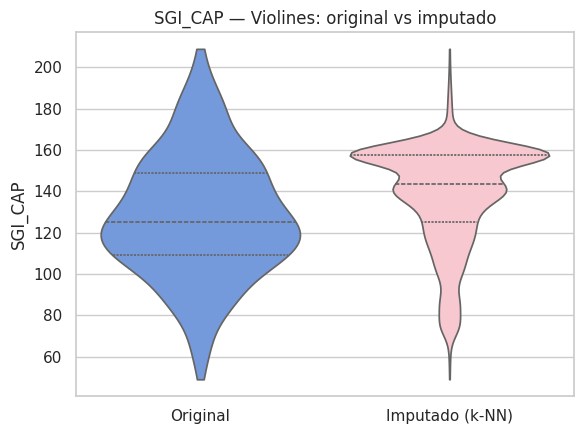


>>> Resumen:
- Observaciones originales no nulas: 500.0 / 2738.0
- Observaciones imputadas no nulas:  2738.0 / 2738.0
- Varianza original: 890.254 | Varianza imputada: 603.317
  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; si sube en exceso, revisa el modelo/semivariograma.)


In [ ]:


sns.set_theme(style="whitegrid")

# ---------------------------
# 1) Definición de columnas
# ---------------------------
orig_col   = "SGI_CAP"              # original (puede tener NaN)
imput_col  = "SGI_CAP_KNN_IMPUTED"  # con KNN (original + imputaciones)

# Verificación mínima
for c in [orig_col, imput_col]:
    if c not in df_4.columns:
        raise KeyError(f"Falta la columna '{c}' en df_4")

# ---------------------------
# 2) Estadísticos descriptivos
# ---------------------------
def resumen_basico(s):
    s = pd.to_numeric(s, errors="coerce")
    return pd.Series({
        "n_total": int(len(s)),
        "n_noNaN": int(s.notna().sum()),
        "n_NaN":   int(s.isna().sum()),
        "min":     float(np.nanmin(s)) if s.notna().any() else np.nan,
        "p25":     float(np.nanpercentile(s.dropna(), 25)) if s.notna().any() else np.nan,
        "median":  float(np.nanmedian(s)) if s.notna().any() else np.nan,
        "mean":    float(np.nanmean(s)) if s.notna().any() else np.nan,
        "p75":     float(np.nanpercentile(s.dropna(), 75)) if s.notna().any() else np.nan,
        "max":     float(np.nanmax(s)) if s.notna().any() else np.nan,
        "std":     float(np.nanstd(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
        "var":     float(np.nanvar(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
    })

stats_orig  = resumen_basico(df_4[orig_col])
stats_imput = resumen_basico(df_4[imput_col])

# Tabla comparativa
tabla_stats = pd.DataFrame({
    "estadístico": stats_orig.index,
    f"{orig_col} (original)": stats_orig.values,
    f"{imput_col} (k-NN)": stats_imput.values
})

print("\n=== Estadísticos descriptivos: original vs imputado (k-NN) ===")
print(tabla_stats.to_string(index=False))

# ---------------------------
# 3) Cambios clave
# ---------------------------
# Variación relativa de media y varianza (si aplicable)
def rel_change(a, b):
    # cambio relativo de b vs a: (b-a)/|a|
    if a is None or np.isnan(a) or a == 0:
        return np.nan
    return (b - a) / abs(a)

delta_mean = rel_change(stats_orig["mean"], stats_imput["mean"])
delta_var  = rel_change(stats_orig["var"],  stats_imput["var"])

print("\n=== Cambios relativos (imputado vs original) ===")
print(f"Δ media    = {delta_mean:.3%}  (respecto a la media original)")
print(f"Δ varianza = {delta_var:.3%}   (respecto a la var. original)")

# ---------------------------
# 4) Gráficos comparativos
# ---------------------------
# 4.1 Histogramas superpuestos
plt.figure(figsize=(7,4.5))
sns.histplot(df_4[orig_col],  bins=30, color="cornflowerblue", edgecolor="black", alpha=0.6, label="Original")
sns.histplot(df_4[imput_col], bins=30, color="pink",            edgecolor="black", alpha=0.5, label="Imputado (k-NN)")
plt.title(f"{orig_col} — Histogramas: original vs imputado")
plt.xlabel(orig_col); plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# 4.2 Violines lado a lado (morfología de la distribución)
tmp = pd.DataFrame({
    "valor": pd.concat([df_4[orig_col], df_4[imput_col]], ignore_index=True),
    "serie": (["Original"]*len(df_4)) + (["Imputado (k-NN)"]*len(df_4))
})
plt.figure(figsize=(6,4.5))
sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,
               palette={"Original":"cornflowerblue","Imputado (k-NN)":"pink"})
plt.title(f"{orig_col} — Violines: original vs imputado")
plt.xlabel(""); plt.ylabel(orig_col)
plt.tight_layout()
plt.show()



# ---------------------------
# 5) Resumen textual breve
# ---------------------------
print("\n>>> Resumen:")
print(f"- Observaciones originales no nulas: {stats_orig['n_noNaN']} / {stats_orig['n_total']}")
print(f"- Observaciones imputadas no nulas:  {stats_imput['n_noNaN']} / {stats_imput['n_total']}")
print(f"- Varianza original: {stats_orig['var']:.3f} | Varianza imputada: {stats_imput['var']:.3f}")
print("  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; "
      "si sube en exceso, revisa el modelo/semivariograma.)")

Se observa una variación de la media de los datos(Imputado kNN) debido a la mayor concentración de valores sobre 150 minutos.


### 5.2.2 Imputación para variable AXB metodo KNN


In [ ]:



# Asegurarse de que df_4 existe y contiene las columnas necesarias
if 'df_4' not in globals():
    raise NameError("DataFrame 'df_4' no encontrado. Por favor, ejecute las celdas anteriores.")

# Columnas de coordenadas y la columna a imputar
coords = ["EAST", "NORTH", "ELEV."]
impute_col = "AXB_CAP"

# Asegurarse de que las columnas necesarias existen en df_4
if not all(c in df_4.columns for c in coords + [impute_col]):
    missing = [c for c in coords + [impute_col] if c not in df_4.columns]
    raise ValueError(f"Columnas faltantes en df_4: {missing}")

# Contar valores faltantes antes de la imputación
n_missing_before = df_4[impute_col].isna().sum()
print(f"Cantidad de valores faltantes en '{impute_col}' antes de la imputación: {n_missing_before}")

# Preparar los datos para el imputador k-NN
# Usaremos las coordenadas para encontrar vecinos
data_for_imputation = df_4[coords + [impute_col]].copy()

# Escalamos los datos para que las distancias se calculen correctamente
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_imputation)
data_scaled_df = pd.DataFrame(data_scaled, columns=coords + [impute_col], index=df_4.index)

# Aplicar KNNImputer
# n_neighbors: Número de vecinos a considerar. Puedes ajustar.
# weights: 'uniform' (media simple) o 'distance' (media ponderada por distancia)
# metric: Métrica de distancia ('nan_euclidean' maneja NaNs)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean') # puedes ajustar n_neighbors

# Ajustar y transformar (imputar) los datos escalados
data_imputed_scaled = imputer.fit_transform(data_scaled_df)
data_imputed_scaled_df = pd.DataFrame(data_imputed_scaled, columns=coords + [impute_col], index=df_4.index)

# Invertir el escalado para obtener los valores imputados en la escala original
data_imputed_original_scale = scaler.inverse_transform(data_imputed_scaled_df)
data_imputed_original_scale_df = pd.DataFrame(data_imputed_original_scale, columns=coords + [impute_col], index=df_4.index)

# Crear una nueva columna en df_4 para los datos imputados de AXB_CAP
# Mantenemos la columna original AXB_CAP y añadimos la imputada
df_4['AXB_CAP_KNN_IMPUTED'] = data_imputed_original_scale_df[impute_col]

# Contar valores faltantes después de la imputación
n_missing_after = df_4['AXB_CAP_KNN_IMPUTED'].isna().sum()
print(f"Cantidad de valores faltantes en 'AXB_CAP_KNN_IMPUTED' después de la imputación: {n_missing_after}")

# Mostrar las primeras filas para verificar la nueva columna
print("\nDataFrame con la nueva columna imputada:")
display(df_4.head())

Cantidad de valores faltantes en 'AXB_CAP' antes de la imputación: 2562
Cantidad de valores faltantes en 'AXB_CAP_KNN_IMPUTED' después de la imputación: 0

DataFrame con la nueva columna imputada:


REF    EAST   NORTH   ELEV.  LITO_COD  LITO_DESC          RX_DESC  \
0    1  1015.6  -95.15   958.2      10.0  Riodacita          Estéril   
1    2  1024.8  -95.35  1032.7       NaN        NaN          Estéril   
2    3   979.6 -274.55   906.4      10.0  Riodacita  Sulfuro in situ   
3    4   995.2 -112.05   931.0      10.0  Riodacita  Sulfuro in situ   
4    5   984.7 -125.35   924.3      10.0  Riodacita  Sulfuro in situ   

   RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP ENERGY_CONSUMPTION  \
0       5.0      NaN      NaN   22.100      NaN                NaN   
1       5.0      NaN      NaN   20.736      NaN                NaN   
2       2.0      NaN      NaN   21.161      NaN                NaN   
3       2.0      NaN      NaN   20.015      NaN                NaN   
4       2.0      NaN      NaN   20.028      NaN                NaN   

      ELEV_BIN  SGI_CAP_KNN_IMPUTED  AXB_CAP_KNN_IMPUTED  
0  [955, 1055)                122.8              40.9922  
1  [955, 1055)                147.2              40.5109  
2   [855, 955)                122.0              40.0128  
3   [855, 955)                119.2              42.8904  
4   [855, 955)                137.6              41.8934


=== Estadísticos descriptivos: original vs imputado (k-NN) ===
estadístico  AXB_CAP (original)  AXB_CAP_KNN_IMPUTED (k-NN)
    n_total         2738.000000                 2738.000000
    n_noNaN          176.000000                 2738.000000
      n_NaN         2562.000000                    0.000000
        min           23.000000                   23.000000
        p25           30.582500                   34.607600
     median           35.215500                   38.550700
       mean           35.251946                   37.482444
        p75           38.812500                   40.975225
        max           51.157500                   51.157500
        std            5.967567                    4.159263
        var           35.611860                   17.299465

=== Cambios relativos (imputado vs original) ===
Δ media    = 6.327%  (respecto a la media original)
Δ varianza = -51.422%   (respecto a la var. original)


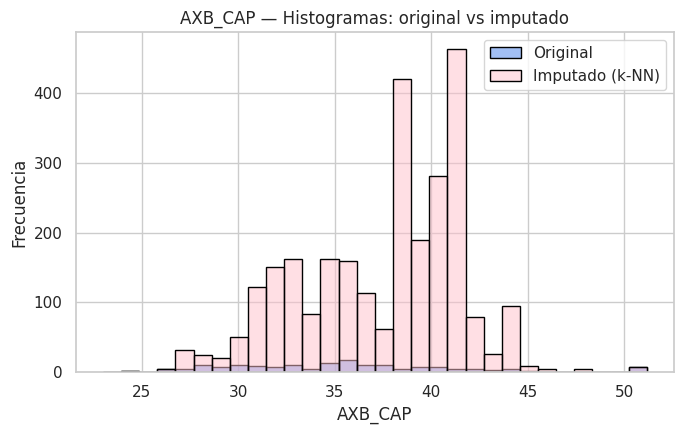

/tmp/ipython-input-4291502656.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,


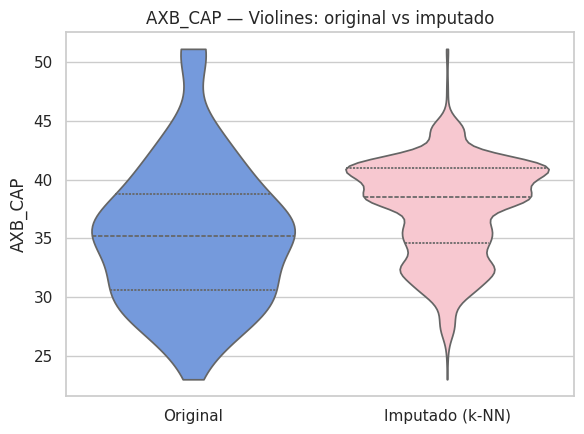


>>> Resumen:
- Observaciones originales no nulas: 176.0 / 2738.0
- Observaciones imputadas no nulas:  2738.0 / 2738.0
- Varianza original: 35.612 | Varianza imputada: 17.299
  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; si sube en exceso, revisa el modelo/semivariograma.)


In [ ]:


sns.set_theme(style="whitegrid")

# ---------------------------
# 1) Definición de columnas
# ---------------------------
orig_col   = "AXB_CAP"              # original (puede tener NaN)
imput_col  = "AXB_CAP_KNN_IMPUTED"  # con KNN (original + imputaciones)

# Verificación mínima
for c in [orig_col, imput_col]:
    if c not in df_4.columns:
        raise KeyError(f"Falta la columna '{c}' en df_4")

# ---------------------------
# 2) Estadísticos descriptivos
# ---------------------------
def resumen_basico(s):
    s = pd.to_numeric(s, errors="coerce")
    return pd.Series({
        "n_total": int(len(s)),
        "n_noNaN": int(s.notna().sum()),
        "n_NaN":   int(s.isna().sum()),
        "min":     float(np.nanmin(s)) if s.notna().any() else np.nan,
        "p25":     float(np.nanpercentile(s.dropna(), 25)) if s.notna().any() else np.nan,
        "median":  float(np.nanmedian(s)) if s.notna().any() else np.nan,
        "mean":    float(np.nanmean(s)) if s.notna().any() else np.nan,
        "p75":     float(np.nanpercentile(s.dropna(), 75)) if s.notna().any() else np.nan,
        "max":     float(np.nanmax(s)) if s.notna().any() else np.nan,
        "std":     float(np.nanstd(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
        "var":     float(np.nanvar(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
    })

stats_orig  = resumen_basico(df_4[orig_col])
stats_imput = resumen_basico(df_4[imput_col])

# Tabla comparativa
tabla_stats = pd.DataFrame({
    "estadístico": stats_orig.index,
    f"{orig_col} (original)": stats_orig.values,
    f"{imput_col} (k-NN)": stats_imput.values
})

print("\n=== Estadísticos descriptivos: original vs imputado (k-NN) ===")
print(tabla_stats.to_string(index=False))

# ---------------------------
# 3) Cambios clave
# ---------------------------
# Variación relativa de media y varianza (si aplicable)
def rel_change(a, b):
    # cambio relativo de b vs a: (b-a)/|a|
    if a is None or np.isnan(a) or a == 0:
        return np.nan
    return (b - a) / abs(a)

delta_mean = rel_change(stats_orig["mean"], stats_imput["mean"])
delta_var  = rel_change(stats_orig["var"],  stats_imput["var"])

print("\n=== Cambios relativos (imputado vs original) ===")
print(f"Δ media    = {delta_mean:.3%}  (respecto a la media original)")
print(f"Δ varianza = {delta_var:.3%}   (respecto a la var. original)")

# ---------------------------
# 4) Gráficos comparativos
# ---------------------------
# 4.1 Histogramas superpuestos
plt.figure(figsize=(7,4.5))
sns.histplot(df_4[orig_col],  bins=30, color="cornflowerblue", edgecolor="black", alpha=0.6, label="Original")
sns.histplot(df_4[imput_col], bins=30, color="pink",            edgecolors="black", alpha=0.5, label="Imputado (k-NN)")
plt.title(f"{orig_col} — Histogramas: original vs imputado")
plt.xlabel(orig_col); plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# 4.2 Violines lado a lado (morfología de la distribución)
tmp = pd.DataFrame({
    "valor": pd.concat([df_4[orig_col], df_4[imput_col]], ignore_index=True),
    "serie": (["Original"]*len(df_4)) + (["Imputado (k-NN)"]*len(df_4))
})
plt.figure(figsize=(6,4.5))
sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,
               palette={"Original":"cornflowerblue","Imputado (k-NN)":"pink"})
plt.title(f"{orig_col} — Violines: original vs imputado")
plt.xlabel(""); plt.ylabel(orig_col)
plt.tight_layout()
plt.show()



# ---------------------------
# 5) Resumen textual breve
# ---------------------------
print("\n>>> Resumen:")
print(f"- Observaciones originales no nulas: {stats_orig['n_noNaN']} / {stats_orig['n_total']}")
print(f"- Observaciones imputadas no nulas:  {stats_imput['n_noNaN']} / {stats_imput['n_total']}")
print(f"- Varianza original: {stats_orig['var']:.3f} | Varianza imputada: {stats_imput['var']:.3f}")
print("  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; "
      "si sube en exceso, revisa el modelo/semivariograma.)")

### 5.2.3 Imputación para variable BWI metodo KNN


In [ ]:

# Asegurarse de que df_4 existe y contiene las columnas necesarias
if 'df_4' not in globals():
    raise NameError("DataFrame 'df_4' no encontrado. Por favor, ejecute las celdas anteriores.")

# Columnas de coordenadas y la columna a imputar
coords = ["EAST", "NORTH", "ELEV."]
impute_col = "BWI_CAP"

# Asegurarse de que las columnas necesarias existen en df_4
if not all(c in df_4.columns for c in coords + [impute_col]):
    missing = [c for c in coords + [impute_col] if c not in df_4.columns]
    raise ValueError(f"Columnas faltantes en df_4: {missing}")

# Contar valores faltantes antes de la imputación
n_missing_before = df_4[impute_col].isna().sum()
print(f"Cantidad de valores faltantes en '{impute_col}' antes de la imputación: {n_missing_before}")

# Preparar los datos para el imputador k-NN
# Usaremos las coordenadas para encontrar vecinos
data_for_imputation = df_4[coords + [impute_col]].copy()

# Escalamos los datos para que las distancias se calculen correctamente
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_imputation)
data_scaled_df = pd.DataFrame(data_scaled, columns=coords + [impute_col], index=df_4.index)

# Aplicar KNNImputer
# n_neighbors: Número de vecinos a considerar. Puedes ajustar.
# weights: 'uniform' (media simple) o 'distance' (media ponderada por distancia)
# metric: Métrica de distancia ('nan_euclidean' maneja NaNs)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean') # puedes ajustar n_neighbors

# Ajustar y transformar (imputar) los datos escalados
data_imputed_scaled = imputer.fit_transform(data_scaled_df)
data_imputed_scaled_df = pd.DataFrame(data_imputed_scaled, columns=coords + [impute_col], index=df_4.index)

# Invertir el escalado para obtener los valores imputados en la escala original
data_imputed_original_scale = scaler.inverse_transform(data_imputed_scaled_df)
data_imputed_original_scale_df = pd.DataFrame(data_imputed_original_scale, columns=coords + [impute_col], index=df_4.index)

# Crear una nueva columna en df_4 para los datos imputados de BWI_CAP
# Mantenemos la columna original BWI_CAP y añadimos la imputada
df_4['BWI_CAP_KNN_IMPUTED'] = data_imputed_original_scale_df[impute_col]

# Contar valores faltantes después de la imputación
n_missing_after = df_4['BWI_CAP_KNN_IMPUTED'].isna().sum()
print(f"Cantidad de valores faltantes en 'BWI_CAP_KNN_IMPUTED' después de la imputación: {n_missing_after}")

# Mostrar las primeras filas para verificar la nueva columna
print("\nDataFrame con la nueva columna imputada:")
display(df_4.head())

Cantidad de valores faltantes en 'BWI_CAP' antes de la imputación: 2511
Cantidad de valores faltantes en 'BWI_CAP_KNN_IMPUTED' después de la imputación: 0

DataFrame con la nueva columna imputada:


REF    EAST   NORTH   ELEV.  LITO_COD  LITO_DESC          RX_DESC  \
0    1  1015.6  -95.15   958.2      10.0  Riodacita          Estéril   
1    2  1024.8  -95.35  1032.7       NaN        NaN          Estéril   
2    3   979.6 -274.55   906.4      10.0  Riodacita  Sulfuro in situ   
3    4   995.2 -112.05   931.0      10.0  Riodacita  Sulfuro in situ   
4    5   984.7 -125.35   924.3      10.0  Riodacita  Sulfuro in situ   

   RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP ENERGY_CONSUMPTION  \
0       5.0      NaN      NaN   22.100      NaN                NaN   
1       5.0      NaN      NaN   20.736      NaN                NaN   
2       2.0      NaN      NaN   21.161      NaN                NaN   
3       2.0      NaN      NaN   20.015      NaN                NaN   
4       2.0      NaN      NaN   20.028      NaN                NaN   

      ELEV_BIN  SGI_CAP_KNN_IMPUTED  AXB_CAP_KNN_IMPUTED  BWI_CAP_KNN_IMPUTED  
0  [955, 1055)                122.8              40.9922               22.100  
1  [955, 1055)                147.2              40.5109               20.736  
2   [855, 955)                122.0              40.0128               21.161  
3   [855, 955)                119.2              42.8904               20.015  
4   [855, 955)                137.6              41.8934               20.028


=== Estadísticos descriptivos: original vs imputado (k-NN) ===
estadístico  BWI_CAP (original)  BWI_CAP_KNN_IMPUTED (k-NN)
    n_total         2738.000000                 2738.000000
    n_noNaN          227.000000                 2738.000000
      n_NaN         2511.000000                    0.000000
        min           14.000000                   14.000000
        p25           18.666000                   16.761600
     median           20.452000                   17.590200
       mean           20.626511                   18.531343
        p75           22.586000                   20.380850
        max           28.466000                   28.466000
        std            3.007280                    2.331595
        var            9.043733                    5.436337

=== Cambios relativos (imputado vs original) ===
Δ media    = -10.158%  (respecto a la media original)
Δ varianza = -39.888%   (respecto a la var. original)


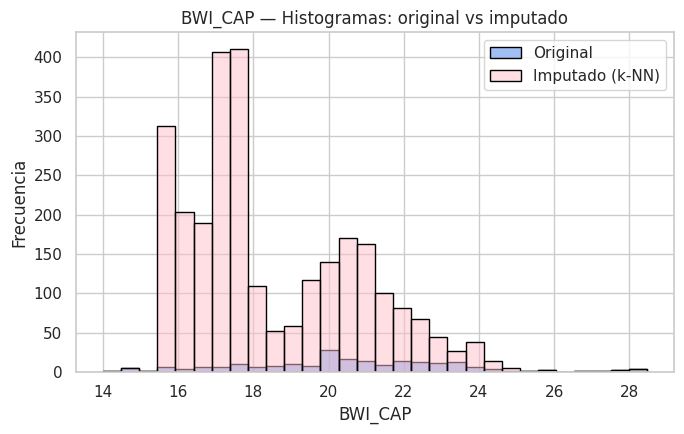

/tmp/ipython-input-1494831442.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,


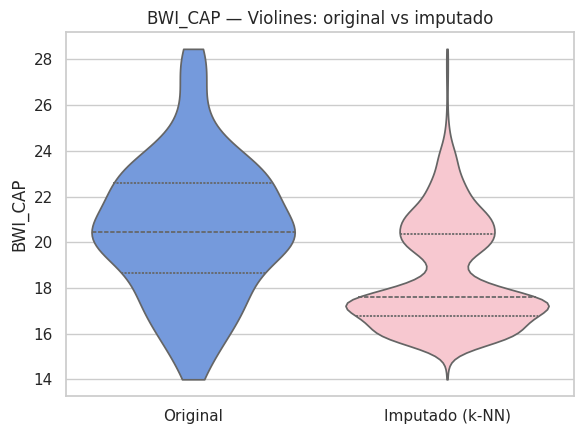


>>> Resumen:
- Observaciones originales no nulas: 227.0 / 2738.0
- Observaciones imputadas no nulas:  2738.0 / 2738.0
- Varianza original: 9.044 | Varianza imputada: 5.436
  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; si sube en exceso, revisa el modelo/semivariograma.)


In [ ]:


sns.set_theme(style="whitegrid")

# ---------------------------
# 1) Definición de columnas
# ---------------------------
orig_col   = "BWI_CAP"              # original (puede tener NaN)
imput_col  = "BWI_CAP_KNN_IMPUTED"  # con KNN (original + imputaciones)

# Verificación mínima
for c in [orig_col, imput_col]:
    if c not in df_4.columns:
        raise KeyError(f"Falta la columna '{c}' en df_4")

# ---------------------------
# 2) Estadísticos descriptivos
# ---------------------------
def resumen_basico(s):
    s = pd.to_numeric(s, errors="coerce")
    return pd.Series({
        "n_total": int(len(s)),
        "n_noNaN": int(s.notna().sum()),
        "n_NaN":   int(s.isna().sum()),
        "min":     float(np.nanmin(s)) if s.notna().any() else np.nan,
        "p25":     float(np.nanpercentile(s.dropna(), 25)) if s.notna().any() else np.nan,
        "median":  float(np.nanmedian(s)) if s.notna().any() else np.nan,
        "mean":    float(np.nanmean(s)) if s.notna().any() else np.nan,
        "p75":     float(np.nanpercentile(s.dropna(), 75)) if s.notna().any() else np.nan,
        "max":     float(np.nanmax(s)) if s.notna().any() else np.nan,
        "std":     float(np.nanstd(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
        "var":     float(np.nanvar(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
    })

stats_orig  = resumen_basico(df_4[orig_col])
stats_imput = resumen_basico(df_4[imput_col])

# Tabla comparativa
tabla_stats = pd.DataFrame({
    "estadístico": stats_orig.index,
    f"{orig_col} (original)": stats_orig.values,
    f"{imput_col} (k-NN)": stats_imput.values
})

print("\n=== Estadísticos descriptivos: original vs imputado (k-NN) ===")
print(tabla_stats.to_string(index=False))

# ---------------------------
# 3) Cambios clave
# ---------------------------
# Variación relativa de media y varianza (si aplicable)
def rel_change(a, b):
    # cambio relativo de b vs a: (b-a)/|a|
    if a is None or np.isnan(a) or a == 0:
        return np.nan
    return (b - a) / abs(a)

delta_mean = rel_change(stats_orig["mean"], stats_imput["mean"])
delta_var  = rel_change(stats_orig["var"],  stats_imput["var"])

print("\n=== Cambios relativos (imputado vs original) ===")
print(f"Δ media    = {delta_mean:.3%}  (respecto a la media original)")
print(f"Δ varianza = {delta_var:.3%}   (respecto a la var. original)")

# ---------------------------
# 4) Gráficos comparativos
# ---------------------------
# 4.1 Histogramas superpuestos
plt.figure(figsize=(7,4.5))
sns.histplot(df_4[orig_col],  bins=30, color="cornflowerblue", edgecolor="black", alpha=0.6, label="Original")
sns.histplot(df_4[imput_col], bins=30, color="pink",            edgecolor="black", alpha=0.5, label="Imputado (k-NN)")
plt.title(f"{orig_col} — Histogramas: original vs imputado")
plt.xlabel(orig_col); plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# 4.2 Violines lado a lado (morfología de la distribución)
tmp = pd.DataFrame({
    "valor": pd.concat([df_4[orig_col], df_4[imput_col]], ignore_index=True),
    "serie": (["Original"]*len(df_4)) + (["Imputado (k-NN)"]*len(df_4))
})
plt.figure(figsize=(6,4.5))
sns.violinplot(data=tmp, x="serie", y="valor", inner="quartile", cut=0,
               palette={"Original":"cornflowerblue","Imputado (k-NN)":"pink"})
plt.title(f"{orig_col} — Violines: original vs imputado")
plt.xlabel(""); plt.ylabel(orig_col)
plt.tight_layout()
plt.show()



# ---------------------------
# 5) Resumen textual breve
# ---------------------------
print("\n>>> Resumen:")
print(f"- Observaciones originales no nulas: {stats_orig['n_noNaN']} / {stats_orig['n_total']}")
print(f"- Observaciones imputadas no nulas:  {stats_imput['n_noNaN']} / {stats_imput['n_total']}")
print(f"- Varianza original: {stats_orig['var']:.3f} | Varianza imputada: {stats_imput['var']:.3f}")
print("  (Si la varianza imputada cae demasiado, puede indicar suavizamiento excesiva de los datos; "
      "si sube en exceso, revisa el modelo/semivariograma.)")

In [ ]:
# Valores faltantes por columna (conteo y porcentaje)
print("\n--- Valores faltantes por columna ---")
for col in df_4.columns:
    n_missing = df_4[col].isnull().sum()           # cantidad de NaN
    pct_missing = df_4[col].isnull().mean() * 100  # porcentaje de NaN
    print(f"La columna \'{col:<5}' tiene {n_missing} datos faltantes ({pct_missing:.2f}%)")


--- Valores faltantes por columna ---
La columna 'REF  ' tiene 0 datos faltantes (0.00%)
La columna 'EAST ' tiene 0 datos faltantes (0.00%)
La columna 'NORTH' tiene 0 datos faltantes (0.00%)
La columna 'ELEV.' tiene 0 datos faltantes (0.00%)
La columna 'LITO_COD' tiene 499 datos faltantes (18.22%)
La columna 'LITO_DESC' tiene 499 datos faltantes (18.22%)
La columna 'RX_DESC' tiene 344 datos faltantes (12.56%)
La columna 'RX_UNIFI' tiene 344 datos faltantes (12.56%)
La columna 'SGI_CAP' tiene 2238 datos faltantes (81.74%)
La columna 'AXB_CAP' tiene 2562 datos faltantes (93.57%)
La columna 'BWI_CAP' tiene 2511 datos faltantes (91.71%)
La columna 'CCE_CAP' tiene 2238 datos faltantes (81.74%)
La columna 'ENERGY_CONSUMPTION' tiene 2238 datos faltantes (81.74%)
La columna 'ELEV_BIN' tiene 0 datos faltantes (0.00%)
La columna 'SGI_CAP_KNN_IMPUTED' tiene 0 datos faltantes (0.00%)
La columna 'AXB_CAP_KNN_IMPUTED' tiene 0 datos faltantes (0.00%)
La columna 'BWI_CAP_KNN_IMPUTED' tiene 0 datos fa

### 5.2.4 Imputación para la variable CCE a partir de SGI_IMP

*Relación CCE–SPI (única fórmula aplicable con los datos actuales)* $\text{SPI} \equiv \text{SGI}$ $$ \mathrm{CCE}\;[\mathrm{kWh/t}] \;=\; 5.49 \cdot \left(\frac{\mathrm{SPI}}{\sqrt{195}}\right)^{0.56} $$

In [ ]:
# Define the constants from the formula
K = 5.49
DEN = np.sqrt(195)
EXP = 0.56

# Create a new column for the imputed CCE values
# Initialize it with the existing non-NaN values from CCE_CAP
df_4['CCE_CAP_IMPUTED'] = df_4['CCE_CAP']

# Identify rows where CCE_CAP is NaN and SGI_CAP_KNN_IMPUTED is not NaN
mask_for_calculation = df_4['CCE_CAP'].isna() & df_4['SGI_CAP_KNN_IMPUTED'].notna()

# Calculate CCE for these rows using the formula and the imputed SGI values
df_4.loc[mask_for_calculation, 'CCE_CAP_IMPUTED'] = K * np.power(df_4.loc[mask_for_calculation, 'SGI_CAP_KNN_IMPUTED'] / DEN, EXP)

# Verify the number of missing values in the new column
n_missing_after_calculation = df_4['CCE_CAP_IMPUTED'].isna().sum()
print(f"Number of missing values in 'CCE_CAP_IMPUTED' after calculation: {n_missing_after_calculation}")

# Display the first few rows to show the new column
print("\nDataFrame with the new calculated CCE_CAP_IMPUTED column:")
display(df_4.head())

Number of missing values in 'CCE_CAP_IMPUTED' after calculation: 0

DataFrame with the new calculated CCE_CAP_IMPUTED column:


REF    EAST   NORTH   ELEV.  LITO_COD  LITO_DESC          RX_DESC  \
0    1  1015.6  -95.15   958.2      10.0  Riodacita          Estéril   
1    2  1024.8  -95.35  1032.7       NaN        NaN          Estéril   
2    3   979.6 -274.55   906.4      10.0  Riodacita  Sulfuro in situ   
3    4   995.2 -112.05   931.0      10.0  Riodacita  Sulfuro in situ   
4    5   984.7 -125.35   924.3      10.0  Riodacita  Sulfuro in situ   

   RX_UNIFI  SGI_CAP  AXB_CAP  BWI_CAP  CCE_CAP ENERGY_CONSUMPTION  \
0       5.0      NaN      NaN   22.100      NaN                NaN   
1       5.0      NaN      NaN   20.736      NaN                NaN   
2       2.0      NaN      NaN   21.161      NaN                NaN   
3       2.0      NaN      NaN   20.015      NaN                NaN   
4       2.0      NaN      NaN   20.028      NaN                NaN   

      ELEV_BIN  SGI_CAP_KNN_IMPUTED  AXB_CAP_KNN_IMPUTED  BWI_CAP_KNN_IMPUTED  \
0  [955, 1055)                122.8              40.9922               22.100   
1  [955, 1055)                147.2              40.5109               20.736   
2   [855, 955)                122.0              40.0128               21.161   
3   [855, 955)                119.2              42.8904               20.015   
4   [855, 955)                137.6              41.8934               20.028   

   CCE_CAP_IMPUTED  
0        18.548711  
1        20.530098  
2        18.480944  
3        18.242206  
4        19.769195

Found 500 original non-NaN values in CCE_CAP.

=== Estadísticos descriptivos: original non-NaN vs calculated (from SGI) ===
estadístico  CCE_CAP (Original non-NaN)  CCE_CAP_IMPUTED (Calculated)
    n_total                  500.000000                   2738.000000
    n_noNaN                  500.000000                   2738.000000
      n_NaN                    0.000000                      0.000000
        min                   12.477784                     12.477784
        p25                   17.439842                     18.777345
     median                   18.860000                     20.263181
       mean                   18.955663                     19.768362
        p75                   20.747881                     21.330161
        max                   25.709940                     25.709940
        std                    2.489521                      2.071167
        var                    6.197714                      4.289733

=== Cambios relativos (calculated v

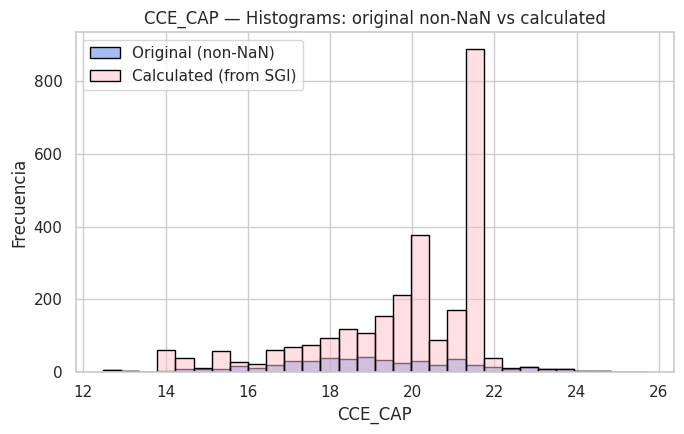

/tmp/ipython-input-974414088.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tmp_plot, x="serie", y="valor", inner="quartile", cut=0,


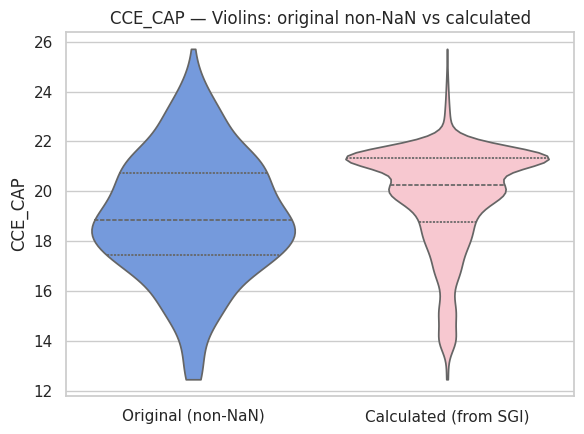


>>> Resumen:
- Observaciones originales no nulas: 500.0 / 500.0
- Observaciones después de cálculo:  2738.0 / 2738.0
- Varianza original: 6.198 | Varianza después de cálculo: 4.290


In [ ]:


sns.set_theme(style="whitegrid")

# ---------------------------
# 1) Definición de columnas
# ---------------------------
# The original non-NaN values of CCE_CAP
orig_cce_non_nan = df_4['CCE_CAP'].dropna()
# The newly calculated CCE_CAP_IMPUTED column
imput_cce_col = df_4['CCE_CAP_IMPUTED']

# Check if there are any original non-NaN values to compare
if orig_cce_non_nan.empty:
    print("No original non-NaN values found in CCE_CAP to compare with CCE_CAP_IMPUTED.")
else:
    print(f"Found {len(orig_cce_non_nan)} original non-NaN values in CCE_CAP.")

    # ---------------------------
    # 2) Estadísticos descriptivos
    # ---------------------------
    def resumen_basico(s):
        s = pd.to_numeric(s, errors="coerce")
        return pd.Series({
            "n_total": int(len(s)),
            "n_noNaN": int(s.notna().sum()),
            "n_NaN":   int(s.isna().sum()),
            "min":     float(np.nanmin(s)) if s.notna().any() else np.nan,
            "p25":     float(np.nanpercentile(s.dropna(), 25)) if s.notna().any() else np.nan,
            "median":  float(np.nanmedian(s)) if s.notna().any() else np.nan,
            "mean":    float(np.nanmean(s)) if s.notna().any() else np.nan,
            "p75":     float(np.nanpercentile(s.dropna(), 75)) if s.notna().any() else np.nan,
            "max":     float(np.nanmax(s)) if s.notna().any() else np.nan,
            "std":     float(np.nanstd(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
            "var":     float(np.nanvar(s, ddof=1)) if s.notna().sum() > 1 else np.nan,
        })

    stats_orig  = resumen_basico(orig_cce_non_nan)
    stats_imput = resumen_basico(imput_cce_col)

    # Tabla comparativa
    tabla_stats = pd.DataFrame({
        "estadístico": stats_orig.index,
        "CCE_CAP (Original non-NaN)": stats_orig.values,
        "CCE_CAP_IMPUTED (Calculated)": stats_imput.values
    })

    print("\n=== Estadísticos descriptivos: original non-NaN vs calculated (from SGI) ===")
    print(tabla_stats.to_string(index=False))

    # ---------------------------
    # 3) Cambios clave
    # ---------------------------
    # Variación relativa de media y varianza (if applicable)
    def rel_change(a, b):
        # relative change of b vs a: (b-a)/|a|
        if a is None or np.isnan(a) or a == 0:
            return np.nan
        return (b - a) / abs(a)

    delta_mean = rel_change(stats_orig["mean"], stats_imput["mean"])
    delta_var  = rel_change(stats_orig["var"],  stats_imput["var"])

    print("\n=== Cambios relativos (calculated vs original non-NaN) ===")
    print(f"Δ media    = {delta_mean:.3%}  (respecto a la media original non-NaN)")
    print(f"Δ varianza = {delta_var:.3%}   (respecto a la var. original non-NaN)")

    # ---------------------------
    # 4) Gráficos comparativos
    # ---------------------------
    # 4.1 Histograms superpuestos
    plt.figure(figsize=(7,4.5))
    sns.histplot(orig_cce_non_nan,  bins=30, color="cornflowerblue", edgecolor="black", alpha=0.6, label="Original (non-NaN)")
    sns.histplot(imput_cce_col, bins=30, color="pink",            edgecolor="black", alpha=0.5, label="Calculated (from SGI)")
    plt.title("CCE_CAP — Histograms: original non-NaN vs calculated")
    plt.xlabel("CCE_CAP"); plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4.2 Violins side by side (morphology of the distribution)
    # Need to create a temporary DataFrame for plotting
    tmp_plot = pd.DataFrame({
        "valor": pd.concat([orig_cce_non_nan, imput_cce_col], ignore_index=True),
        "serie": (["Original (non-NaN)"]*len(orig_cce_non_nan)) + (["Calculated (from SGI)"]*len(imput_cce_col))
    })
    plt.figure(figsize=(6,4.5))
    sns.violinplot(data=tmp_plot, x="serie", y="valor", inner="quartile", cut=0,
                   palette={"Original (non-NaN)":"cornflowerblue", "Calculated (from SGI)":"pink"})
    plt.title("CCE_CAP — Violins: original non-NaN vs calculated")
    plt.xlabel(""); plt.ylabel("CCE_CAP")
    plt.tight_layout()
    plt.show()


    # ---------------------------
    # 5) Resumen textual brief
    # ---------------------------
    print("\n>>> Resumen:")
    print(f"- Observaciones originales no nulas: {stats_orig['n_noNaN']} / {stats_orig['n_total']}")
    print(f"- Observaciones después de cálculo:  {stats_imput['n_noNaN']} / {stats_imput['n_total']}")
    print(f"- Varianza original: {stats_orig['var']:.3f} | Varianza después de cálculo: {stats_imput['var']:.3f}")

# 6 EDA data final: post datos nulos, duplicados, errores en litología e imputados

## 6.1 Estadística descriptiva

In [ ]:
df_4.describe()

REF         EAST        NORTH        ELEV.     LITO_COD  \
count  2738.000000  2738.000000  2738.000000  2738.000000  2239.000000   
mean   1370.384222   683.036633   547.340029   990.740029    24.928093   
std     787.451255   242.900122   652.499798   117.491926    16.414692   
min       1.000000  -135.200000 -1057.950000   455.000000    10.000000   
25%     686.250000   520.600000   -82.325000   925.550000    10.000000   
50%    1377.500000   679.350000   700.050000   996.200000    20.000000   
75%    2063.750000   872.000000  1077.225000  1078.775000    30.000000   
max    2723.000000  1267.700000  1500.950000  1231.200000    60.000000   

          RX_UNIFI     SGI_CAP     AXB_CAP     BWI_CAP     CCE_CAP  \
count  2394.000000  500.000000  176.000000  227.000000  500.000000   
mean      5.269424  128.196000   35.251946   20.626511   18.955663   
std       5.248971   29.837126    5.967567    3.007280    2.489521   
min       2.000000   49.000000   23.000000   14.000000   12.477784   
25%       2.000000  109.000000   30.582500   18.666000   17.439842   
50%       5.000000  125.000000   35.215500   20.452000   18.860000   
75%       5.000000  149.000000   38.812500   22.586000   20.747881   
max      20.000000  209.000000   51.157500   28.466000   25.709940   

       SGI_CAP_KNN_IMPUTED  AXB_CAP_KNN_IMPUTED  BWI_CAP_KNN_IMPUTED  \
count          2738.000000          2738.000000          2738.000000   
mean            138.476552            37.482444            18.531343   
std              24.562520             4.159263             2.331595   
min              49.000000            23.000000            14.000000   
25%             125.000000            34.607600            16.761600   
50%             143.800000            38.550700            17.590200   
75%             157.600000            40.975225            20.380850   
max             209.000000            51.157500            28.466000   

       CCE_CAP_IMPUTED  
count      2738.000000  
mean         19.768362  
std           2.071167  
min          12.477784  
25%          18.777345  
50%          20.263181  
75%          21.330161  
max          25.709940

## Comparativa de Estadísticas Descriptivas: Variables Originales vs. Imputadas por k-NN

Según los resultados de la estadística descriptiva:

- **SGI_CAP**: Los datos originales presentaban 500 observaciones no nulas con una media de 128.20 y una varianza de 890.25. Tras la imputación por k-NN (`SGI_CAP_KNN_IMPUTED`), todos los 2738 registros tienen valores. La media aumentó a 138.48 (+8.02% de cambio relativo), mientras que la varianza disminuyó a 603.32 (-32.23% de cambio relativo). Esto sugiere que la imputación ha tendido a "suavizar" la distribución, acercando los valores imputados a la media de sus vecinos.

- **AXB_CAP**: Originalmente, solo 176 de 2738 registros tenían datos no nulos para AXB_CAP, con una media de 35.25 y una varianza de 35.61. Después de la imputación (`AXB_CAP_KNN_IMPUTED`), se completaron todos los 2738 registros. La media imputada es 37.48 (+6.33% de cambio relativo), y la varianza se redujo significativamente a 17.30 (-51.42% de cambio relativo). La gran reducción en la varianza post-imputación es esperable dada la alta proporción de datos imputados y el efecto de suavizado de k-NN.

- **BWI_CAP**: Similar a AXB_CAP, BWI_CAP tenía una alta proporción de valores faltantes (227 no nulos de 2738), con una media de 20.63 y varianza de 9.04. La imputación por k-NN (`BWI_CAP_KNN_IMPUTED`) completó todos los registros, resultando en una media de 18.53 (-10.16% de cambio relativo) y una varianza de 5.44 (-39.89% de cambio relativo). La disminución en la varianza y el cambio en la media reflejan el impacto de imputar una gran cantidad de datos.

- **CCE_CAP**: Los valores originales no nulos de CCE_CAP (500 registros) tenían una media de 18.96 y varianza de 6.20. La columna calculada a partir de SGI imputado (`CCE_CAP_IMPUTED`) completó todos los registros. La media de esta columna es 19.77 (+4.29% de cambio relativo respecto a la media original no nula), y la varianza es 4.29 (-30.79% de cambio relativo respecto a la varianza original no nula). Dado que CCE_CAP_IMPUTED se deriva directamente de SGI_CAP_KNN_IMPUTED mediante una fórmula, sus estadísticas reflejan la distribución de SGI imputado, mostrando un aumento en la media y una reducción en la varianza en comparación con los valores originales observados de CCE_CAP.

En resumen, la imputación por k-NN y el cálculo derivado han logrado completar los datos faltantes para estas variables, aunque con el efecto esperado de ajustar las medias y, notablemente, reducir la varianza, lo cual es característico de los métodos de imputación basados en promedios de vecinos. Esto provee un conjunto de datos completo para análisis posteriores, pero se debe considerar el impacto de la imputación en la variabilidad observada.

## 6.2 Vistas Principales de Variables Imputadas por metodo KNN

En esta sección, visualizaremos la distribución espacial de las variables después de la imputación utilizando el método k-NN (para SGI, AXB, BWI) y la transformación a partir de SGI imputado (para CCE). Se generarán vistas en 2D (proyecciones XY, YZ, XZ) y en 3D (XYZ) para cada una de estas variables.

Esto nos permitirá evaluar visualmente el resultado de la imputación y observar si los valores imputados se integran de manera coherente con la continuidad espacial de los datos observados.

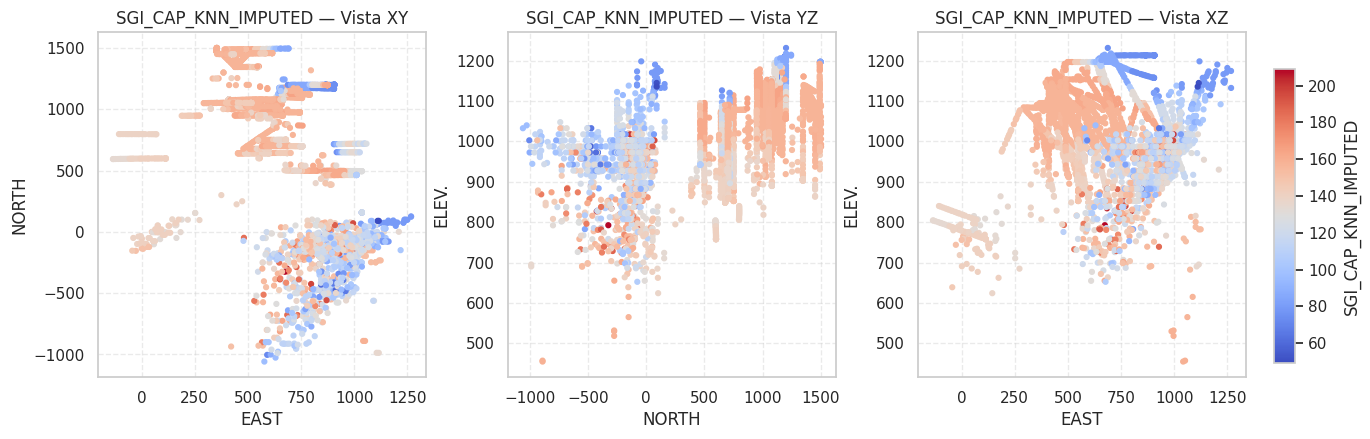

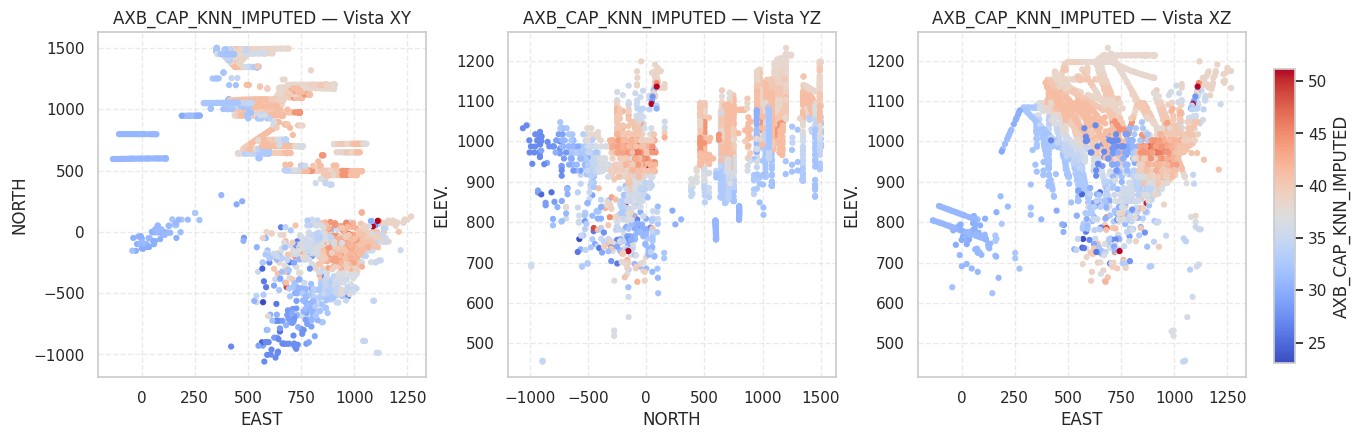

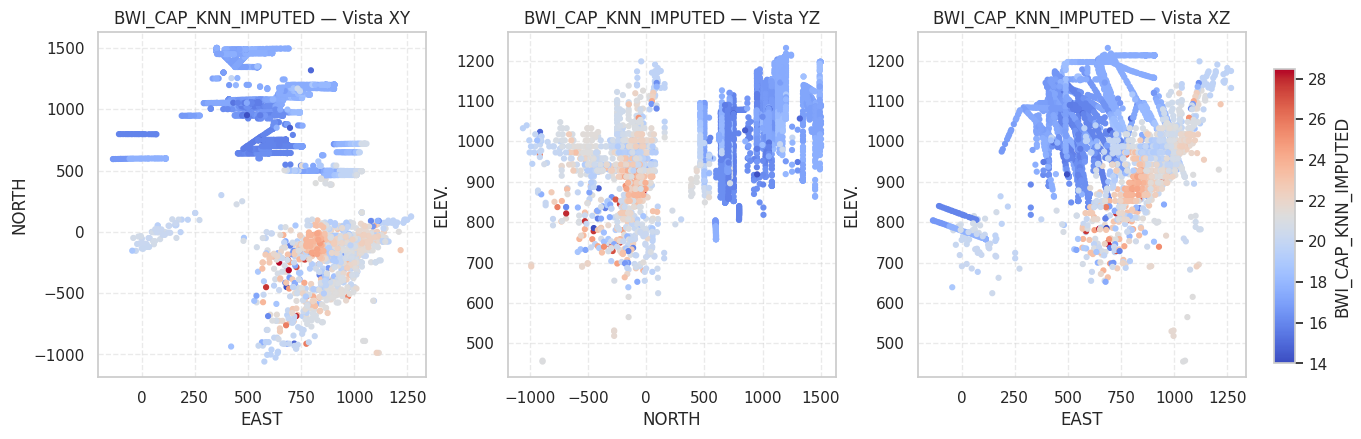

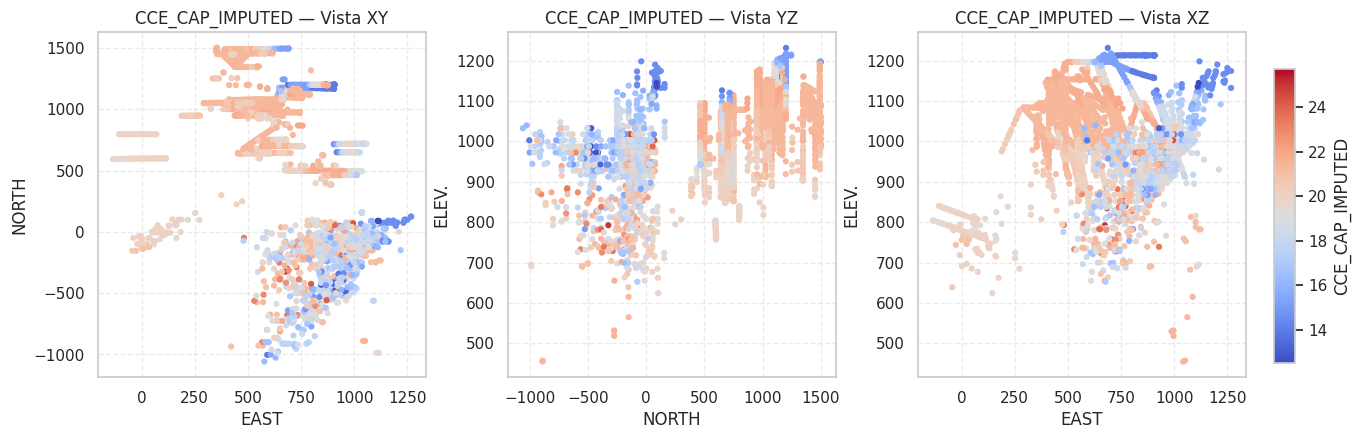

In [ ]:

coords = ["EAST", "NORTH", "ELEV."]      # como en df_4
vars_num = [
    "SGI_CAP_KNN_IMPUTED",
    "AXB_CAP_KNN_IMPUTED",
    "BWI_CAP_KNN_IMPUTED",
    "CCE_CAP_IMPUTED"
]
cmap = "coolwarm"

# Ejemplo: correr para todas las variables numéricas (excepto coords y REF)
for v in vars_num:
    plot_2d_proyecciones_color(df_4, v)

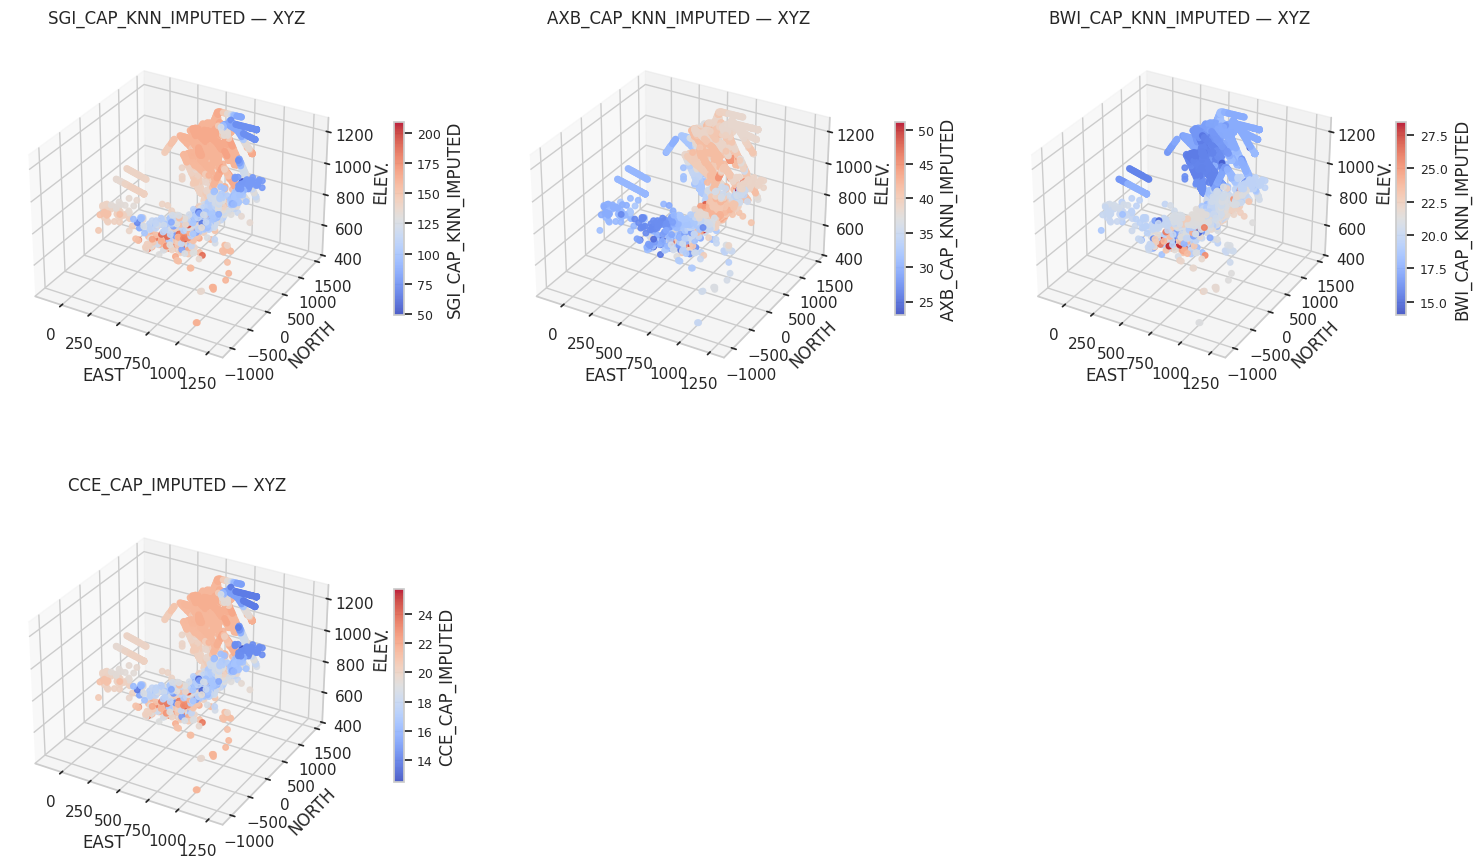

In [ ]:
# --- VISTAS 3D (una sola llamada, SIN loop externo) ---
coords = ["EAST", "NORTH", "ELEV."]
vars_num = [
    "SGI_CAP_KNN_IMPUTED",
    "AXB_CAP_KNN_IMPUTED",
    "BWI_CAP_KNN_IMPUTED",
    "CCE_CAP_IMPUTED"
]

plot_vars_3d(df_4, vars_list=vars_num, cmap="coolwarm", ncols=3)

La aplicación del método de imputación KNN permitió completar los vacíos de la base de datos, generando una distribución espacial continua de las variables SGI_CAP, AXB_CAP y BWI_CAP. En comparación con la data original, los gradientes se observan de forma más definida, principalmente en función de la elevación, lo que facilita la identificación de patrones y tendencias. Sin embargo, es importante considerar que parte de la continuidad reflejada corresponde a estimaciones y no a datos muestreados directamente.

Según los gráficos de CCE, se pueden identificar zonas críticas de alto y bajo consumo energético, con respecto a su comportamiento geomecánico.



# 7 Posibles Aplicaciones

En esta sección se definen diferentes potenciales de
uso por cada integrante del grupo
sobre las herramientas aprendidas
en cada hito.


Desde la experiencia de los integrantes del equipo, se identifican distintas aplicaciones de las herramientas analizadas en este hito dentro de sus áreas profesionales:
Scarlett, Matías y Sebastián (Geología y Planificación):
Las herramientas exploradas en este hito se han utilizado de manera directa en el ámbito laboral. Entre sus principales aplicaciones se destacan:

- Análisis exploratorio de datos (EDA): aplicado en la evaluación de distribuciones de leyes de mineral, buzamientos de discontinuidades y variabilidad de índices geomecánicos (RMR) en diferentes sectores del yacimiento.

- Métodos de imputación de datos faltantes: utilizados para completar información ausente en ensayos de laboratorio (UCS, tracción brasileña) o en registros de sondajes geológicos, asegurando bases de datos más consistentes.

- Análisis de correlación y regresión: empleados para relacionar parámetros de resistencia con índices rápidos, como el Point Load Test o el RQD.

- Geoestadística (variogramas y kriging): fundamental en la estimación de continuidad de leyes de mineral y propiedades geotécnicas en bloques no muestreados, contribuyendo a la planificación y modelamiento de corto plazo.

En cuanto a los potenciales usos por cada integrante de las herramientas aprendidas en el hito, se tienen

- Paz (Desarrollo de Software y Modelamiento Geológico):
Desde el área de desarrollo de software, las herramientas de imputación resultan esenciales cuando existe un desbalance en la data. Un ejemplo concreto corresponde a la construcción de un modelo de regresión lineal para predecir la pirrotina, un contaminante con escasos registros y altos volúmenes de datos faltantes. En este caso, la correcta imputación, limpieza y análisis estadístico constituyen pasos clave para generar modelos robustos y con mínima propagación de errores.

- Sebastián (Geología de Terreno):
En su experiencia como geólogo de terreno, ha aplicado diversas herramientas revisadas en este hito. La geoestadística se ha utilizado para estimar propiedades geotécnicas en bloques no muestreados, mientras que los métodos de imputación, especialmente los espaciales como kriging, han sido fundamentales para completar bases de datos de muestreos. Asimismo, las estadísticas básicas representan un soporte constante para el análisis y validación de la información recolectada en terreno.

Aplicación en Planificación a Corto Plazo:
Una aplicación relevante corresponde a la integración de modelos de bloques tradicionales con técnicas de aprendizaje supervisado (machine learning). Esto permitiría mejorar la precisión de las estimaciones, reducir la incertidumbre y apoyar la toma de decisiones en etapas tempranas de planificación minera.

- Scarlett (Geomecánica y Geotecnia):
En el ámbito de la geomecánica, las herramientas revisadas son parte habitual del trabajo. El manejo de estadísticas básicas, la identificación de duplicados y datos aberrantes se aplican en bases de datos de sondajes, mientras que las herramientas de correlación resultan útiles en estudios de esfuerzos (σ1 vs σ3) para modelos numéricos que evalúan plasticidad y deformación de la roca, contribuyendo a entender su comportamiento mecánico.

- Andreina (Área Química y Medioambiental):
Aunque no ha aplicado previamente los métodos revisados, reconoce que las herramientas de manejo, limpieza e imputación de bases de datos serán de gran utilidad en su desarrollo profesional. Especialmente en el procesamiento de grandes volúmenes de información relacionados con impactos ambientales y datos provenientes de planta, donde estas técnicas permitirán apoyar la interpretación y validación de resultados experimentales.

- Matías (Geología Aplicada a Procesos):
En su área de desempeño, una posible aplicación corresponde a la identificación de correlaciones entre litología, alteraciones químicas y el índice BWI. Este análisis permitiría optimizar la operación del molino y reducir la incertidumbre asociada a los datos faltantes de BWI, aportando valor en la etapa de conminución.



# 8 Conclusiones


El desarrollo del trabajo permitió cumplir de manera integral con los objetivos planteados. Se manejaron diversas fuentes de datos, integrandolos en una base coherente para su análisis, ademas aplicando procesos de limpieza y pre procesamiento, desarrollando asi un análisis exploratorio con técnicas estadísticas y visuales como graficos, tablas, etc.
Finalmente, los resultados obtenidos fueron analizados e interpretados, explicando tanto sus alcances como limitaciones, estos se expusieron mediante archivos de código.

Dentro de las conclusiones principales de esta etapa se destacan los siguientes puntos:

1. Revisión y depuración de la base de datos
Se realizó un análisis inicial exhaustivo de la base de datos, que incluyó la corrección de errores de digitación, la eliminación de registros duplicados y el tratamiento de valores fuera de rango en variables categóricas como LITO y RX. Asimismo, se efectuó la imputación de valores faltantes en variables clave (p. ej., CCE) mediante reglas de relación física entre variables y, posteriormente, a través de técnicas de imputación. Este proceso permitió obtener una base de datos más limpia y confiable para el análisis posterior.

2. Distribución estadística de las variables
A partir de histogramas y análisis exploratorios, se identificaron distintos patrones de distribución:

  - SGI y CCE presentan una tendencia cercana a la normalidad.

  - AXB muestra un comportamiento compatible con una distribución log-normal.

  - BWI evidencia una distribución multimodal y heterogénea, lo que sugiere la existencia de diferentes poblaciones de datos.
Además, las variables espaciales (EAST, NORTH y ELEV.) mostraron consistencia y simetría, mientras que las variables de índices e intensidades revelaron alta dispersión, sesgo positivo y presencia significativa de outliers.

3. Detección de outliers y duplicados
El uso de gráficos tipo violín, pair plots y boxplots permitió detectar valores atípicos, así como identificar registros duplicados en la base original. Estos elementos afectan la confiabilidad de los análisis, por lo que su tratamiento mediante técnicas de capping (basadas en IQR) y limpieza fue indispensable para robustecer la calidad de la información y garantizar que los análisis posteriores reflejen de manera representativa la realidad del depósito.

4. Relaciones entre variables
La matriz de correlación evidenció asociaciones significativas, como la fuerte relación entre LITO y RX (0,76) y la correlación casi perfecta entre SGI y CCE (≈1), lo que valida el uso de estas variables como predictores cruzados. También se observaron relaciones inversas con AXB, mientras que muchas otras variables se comportan de manera independiente, lo que es positivo ya que indica que la base captura información complementaria y no redundante.

5. Análisis espacial de los datos
El análisis en tres dimensiones (EAST, NORTH, ELEV.) permitió visualizar tendencias espaciales de las variables. Se observó, por ejemplo, que el CCE aumenta con la profundidad, lo que implica un mayor consumo energético asociado a la roca conforme se avanza en el yacimiento. Esta relación espacial es clave para futuras estimaciones geoestadísticas y planificación de mina.

6. Imputación de la data:
  La imputación de valores faltantes, en especial de CCE, se realizó mediante el método de kNN, decisión fundamentada en la robustez de este algoritmo para datasets heterogéneos y con alta proporción de faltantes.

  La imputación por K-Nearest Neighbors (KNN) es útil y operacionalmente sólida para completar brechas de CEE cuando existen variables explicativas con relación física u operacional (p. ej., SGI, AXB, BWI, RX, LITO y estado de planta). En la práctica restaura series y KPIs para monitoreo, balance energético y benchmarking entre turnos/frentes. Su efecto colateral es la “regresión a la media” (disminuye varianza y aplana colas), por lo que mejora la estabilidad de indicadores pero subestima picos y extremos. En términos de negocio: sirve para control y reporting continuo, pero no debe ser la base de decisiones de capacidad de peak, alarmas, penalidades o diseño donde los extremos son críticos.

# 9 Referencias

1. Choudhury, A., & Kosorok, M. R. (2020). Missing Data Imputation for Classification Problems. arXiv preprint arXiv:2002.10709. https://arxiv.org/abs/2002.10709

2. Chilès, J.-P., & Delfiner, P. (2012). Geostatistics: Modeling Spatial Uncertainty (2nd ed.). Wiley. (Marco teórico y práctica; EDA para decidir transformaciones/modelos).

3. Khorram, F. (2024). Assessing joint simulation and estimation approaches in geometallurgical modeling [Preprint]. Research Square. https://doi.org/10.21203/rs.3.rs-5555141/v1

4. Soporte de Minitab. (2025). Interpretar todos los estadísticos y gráficas para correlación. Minitab. https://support.minitab.com/es-mx/minitab/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/

